# Preamble
## Setup of environment

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Cardiac Project/Registration_phase/based on doc2/voxelMorph/source_code/

Mounted at /content/gdrive
/content/gdrive/My Drive/Cardiac Project/Registration_phase/based on doc2/voxelMorph/source_code


In [2]:
!pip install tqdm -q
!pip install pydicom -q
!pip install pypng -q

     |████████████████████████████████| 2.0 MB 5.2 MB/s 
     |████████████████████████████████| 48 kB 2.6 MB/s 


In [3]:
# imports
import os, sys
import os, sys
import glob
from tqdm import tqdm
import pydicom
import png
import numpy as np
import os
import shutil
import cv2
# third party imports
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2.'), 'This tutorial assumes Tensorflow 2.0+'
tf.executing_eagerly()

True

In [4]:
!pip install .

Processing /content/gdrive/My Drive/Cardiac Project/Registration_phase/based on doc2/voxelMorph/source_code
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 86 kB 3.1 MB/s 
  Created wheel for voxelmorph: filename=voxelmorph-0.1-py3-none-any.whl size=63861 sha256=47302b9c6bf78cbef3850f889a76c4bee28613062a501d5f642bca81d87c0005
  Stored in directory: /tmp/pip-ephem-wheel-cache-vub2a7pv/wheels/62/7f/77/79b960a8965a041c880439174a25ae0c263bf34dd8567730fc
Successfully built voxelmorph


In [5]:
# local imports
import voxelmorph as vxm
import neurite as ne

---

# Data

In [6]:
%cd ../

/content/gdrive/My Drive/Cardiac Project/Registration_phase/based on doc2/voxelMorph


## Store and Organize

In [7]:
def get_file_count(main_path):
  i = 0
  print()
  for path in tqdm(glob.iglob(main_path + '**/*.png' , recursive=True) , desc = "Reading"):
      i+=1  
  print('total images:', i)

def remove_files(main_path):
  if main_path == './dataset/':
    print("idiot!")
    return
  print()
  for path in tqdm(glob.iglob(main_path + '**/*.png' , recursive=True) , desc = "Reading"):
    os.remove(path)
    print(path + " removed.")

In [ ]:
# remove_files("./dataset_vxm/")

Reading: 0it [00:00, ?it/s]


In [ ]:
def categorize_into_folders(main_path, cine_path, lge_path, rigid_lge_path, scar_eliminated_path, scar_eliminated_v2_path, rigid_mask_path):
  for path in tqdm(glob.iglob('./dataset_vxm/' + '**/*/*.png' , recursive=True) , desc = "Reading"):
    os.remove(path)
  bad_dim_folders = ['1512388', '1544127', '1562533', '1574347', '1190801', '1606622', '1607269', '1608050', '1608412', '1612583', '1421246', '1421322', '1482797', '1398155', '1429840', '1498178', '1535532']
  i = 0
  cine_counter = 0
  lge_counter = 0
  rigid_lge_counter = 0;
  scar_eliminated_counter = 0;
  scar_eliminated_v2_counter = 0;
  rigid_mask_counter = 0  
  print()
  for path in tqdm(glob.iglob(main_path + '**/results/*.png' , recursive=True) , desc = "Reading"):
    bad_dim_detected = False
    for bad_dim in bad_dim_folders:
      if bad_dim in path:
        bad_dim_detected = True
        break
    if bad_dim_detected:
      continue
    file_name = path.split('/')[-1]
    if 'unknown' in file_name:
      continue
    image_type = file_name.split('_')[-1]
    if file_name == 'rigid_lge.png':
      rigid_lge_counter += 1;
      index_path = path.split('/')[3] + '_' + path.split('/')[4] + '_'      
      des_path = rigid_lge_path + str(rigid_lge_counter) + '_' + index_path + file_name
      i+=1
    elif file_name == 'scar_eliminated_rigid_lge.png':
      scar_eliminated_counter += 1;
      index_path = path.split('/')[3] + '_' + path.split('/')[4] + '_'
      des_path = scar_eliminated_path + str(scar_eliminated_counter) + '_' + index_path + file_name
      i+=1
    elif file_name == 'scar_eliminated_rigid_lge_v2.png':
      scar_eliminated_v2_counter += 1;
      index_path = path.split('/')[3] + '_' + path.split('/')[4] + '_'
      des_path = scar_eliminated_v2_path + str(scar_eliminated_v2_counter) + '_' + index_path + file_name
      i+=1
    elif 'rigid_mask_' in file_name:
        rigid_mask_counter +=1
        index_path = path.split('/')[3] + '_' + path.split('/')[4] + '_'
        des_path = rigid_mask_path + str(rigid_mask_counter) + '_' + index_path + file_name
        i+=1
    elif image_type == 'cine.png':
      if cine_counter > lge_counter or cine_counter > rigid_lge_counter:
        print("Error!")
        break
      cine_counter += 1
      index_path = path.split('/')[3] + '_' + path.split('/')[4] + '_'
      des_path = cine_path + str(cine_counter) + '_' + index_path + file_name
      i+=1  
    elif image_type == 'lge.png':
      if lge_counter > cine_counter:
        print("Error!")
        break
      lge_counter += 1
      index_path = path.split('/')[3] + '_' + path.split('/')[4] + '_'
      des_path = lge_path + str(lge_counter) + '_' + index_path + file_name
      i+=1  
    else: 
      continue
    shutil.copyfile(path, des_path)
    print('number:' , i , "| name:" , path, "copied.")

In [ ]:
main_path = '../dataset/'
cine_path = './dataset_vxm/cine/'
lge_path = './dataset_vxm/lge/'
rigid_lge_path = './dataset_vxm/rigid_lge/'
scar_eliminated_path = './dataset_vxm/scar_eliminated/'
scar_eliminated_v2_path = './dataset_vxm/scar_eliminated_v2/'
rigid_mask_path = './dataset_vxm/rigid_mask/'
categorize_into_folders(main_path, cine_path, lge_path, rigid_lge_path, scar_eliminated_path, scar_eliminated_v2_path, rigid_mask_path)

Reading: 0it [00:00, ?it/s]


Reading: 1it [00:00,  2.51it/s]

number: 1 | name: ../dataset/ok5/1548638/3/results/img0001-46.5588_lge.png copied.


Reading: 2it [00:00,  2.40it/s]

number: 2 | name: ../dataset/ok5/1548638/3/results/img0024-45.8285_cine.png copied.


Reading: 4it [00:01,  3.78it/s]

number: 3 | name: ../dataset/ok5/1548638/3/results/rigid_lge.png copied.


Reading: 5it [00:01,  3.03it/s]

number: 4 | name: ../dataset/ok5/1548638/3/results/rigid_mask_48.png copied.


Reading: 7it [00:02,  3.81it/s]

number: 5 | name: ../dataset/ok5/1548638/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 8it [00:02,  3.18it/s]

number: 6 | name: ../dataset/ok5/1548638/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 9it [00:02,  3.06it/s]

number: 7 | name: ../dataset/ok5/1548638/2/results/img0001-36.9588_lge.png copied.


Reading: 10it [00:03,  3.06it/s]

number: 8 | name: ../dataset/ok5/1548638/2/results/img0024-37.7785_cine.png copied.


Reading: 12it [00:03,  3.92it/s]

number: 9 | name: ../dataset/ok5/1548638/2/results/rigid_lge.png copied.


Reading: 13it [00:03,  3.63it/s]

number: 10 | name: ../dataset/ok5/1548638/2/results/rigid_mask_27.png copied.


Reading: 15it [00:04,  4.35it/s]

number: 11 | name: ../dataset/ok5/1548638/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 16it [00:04,  3.65it/s]

number: 12 | name: ../dataset/ok5/1548638/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 17it [00:04,  3.33it/s]

number: 13 | name: ../dataset/ok5/903703/3/results/img0019-100.036_cine.png copied.


Reading: 18it [00:05,  3.11it/s]

number: 14 | name: ../dataset/ok5/903703/3/results/img0007-102.111_lge.png copied.


Reading: 21it [00:05,  4.63it/s]

number: 15 | name: ../dataset/ok5/903703/3/results/rigid_mask_14.png copied.


Reading: 22it [00:06,  4.22it/s]

number: 16 | name: ../dataset/ok5/903703/3/results/rigid_lge.png copied.


Reading: 23it [00:06,  3.82it/s]

number: 17 | name: ../dataset/ok5/903703/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 24it [00:06,  3.28it/s]

number: 18 | name: ../dataset/ok5/903703/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 25it [00:07,  3.15it/s]

number: 19 | name: ../dataset/ok5/903703/1/results/img0005-82.1109_lge.png copied.


Reading: 26it [00:07,  3.06it/s]

number: 20 | name: ../dataset/ok5/903703/1/results/img0019-83.9359_cine.png copied.


Reading: 29it [00:07,  4.96it/s]

number: 21 | name: ../dataset/ok5/903703/1/results/rigid_lge.png copied.


Reading: 30it [00:08,  4.19it/s]

number: 22 | name: ../dataset/ok5/903703/1/results/rigid_mask_19.png copied.


Reading: 31it [00:08,  3.92it/s]

number: 23 | name: ../dataset/ok5/903703/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 32it [00:08,  3.42it/s]

number: 24 | name: ../dataset/ok5/903703/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 33it [00:09,  3.15it/s]

number: 25 | name: ../dataset/ok5/903703/4/results/img0008-112.111_lge.png copied.


Reading: 35it [00:09,  3.92it/s]

number: 26 | name: ../dataset/ok5/903703/4/results/img0019-108.086_cine.png copied.


Reading: 37it [00:09,  4.50it/s]

number: 27 | name: ../dataset/ok5/903703/4/results/rigid_mask_24.png copied.


Reading: 38it [00:10,  3.93it/s]

number: 28 | name: ../dataset/ok5/903703/4/results/rigid_lge.png copied.


Reading: 39it [00:10,  3.65it/s]

number: 29 | name: ../dataset/ok5/903703/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 40it [00:11,  3.22it/s]

number: 30 | name: ../dataset/ok5/903703/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 41it [00:11,  3.09it/s]

number: 31 | name: ../dataset/ok5/903703/2/results/img0006-92.1109_lge.png copied.


Reading: 43it [00:11,  3.89it/s]

number: 32 | name: ../dataset/ok5/903703/2/results/img0019-91.9859_cine.png copied.


Reading: 45it [00:12,  4.40it/s]

number: 33 | name: ../dataset/ok5/903703/2/results/rigid_lge.png copied.


Reading: 46it [00:12,  3.78it/s]

number: 34 | name: ../dataset/ok5/903703/2/results/rigid_mask_16.png copied.


Reading: 47it [00:12,  3.63it/s]

number: 35 | name: ../dataset/ok5/903703/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 48it [00:13,  3.27it/s]

number: 36 | name: ../dataset/ok5/903703/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 50it [00:13,  3.91it/s]

number: 37 | name: ../dataset/ok5/1516218/3/results/img0022-96.1313_cine.png copied.


Reading: 51it [00:14,  3.42it/s]

number: 38 | name: ../dataset/ok5/1516218/3/results/img0007-94.2511_lge.png copied.


Reading: 53it [00:14,  4.09it/s]

number: 39 | name: ../dataset/ok5/1516218/3/results/rigid_mask_47.png copied.


Reading: 54it [00:14,  3.82it/s]

number: 40 | name: ../dataset/ok5/1516218/3/results/rigid_lge.png copied.


Reading: 55it [00:15,  3.56it/s]

number: 41 | name: ../dataset/ok5/1516218/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 56it [00:15,  3.21it/s]

number: 42 | name: ../dataset/ok5/1516218/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 57it [00:15,  3.12it/s]

number: 43 | name: ../dataset/ok5/1516218/2/results/img0006-84.2511_lge.png copied.


Reading: 59it [00:16,  3.99it/s]

number: 44 | name: ../dataset/ok5/1516218/2/results/img0022-86.9313_cine.png copied.


Reading: 61it [00:16,  4.57it/s]

number: 45 | name: ../dataset/ok5/1516218/2/results/rigid_lge.png copied.


Reading: 62it [00:16,  3.78it/s]

number: 46 | name: ../dataset/ok5/1516218/2/results/rigid_mask_38.png copied.


Reading: 63it [00:17,  2.93it/s]

number: 47 | name: ../dataset/ok5/1516218/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 64it [00:17,  2.76it/s]

number: 48 | name: ../dataset/ok5/1516218/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 65it [00:18,  2.71it/s]

number: 49 | name: ../dataset/ok5/1516218/4/results/img0022-105.331_cine.png copied.


Reading: 66it [00:18,  2.65it/s]

number: 50 | name: ../dataset/ok5/1516218/4/results/img0008-104.251_lge.png copied.


Reading: 69it [00:19,  4.18it/s]

number: 51 | name: ../dataset/ok5/1516218/4/results/rigid_lge.png copied.


Reading: 70it [00:19,  3.75it/s]

number: 52 | name: ../dataset/ok5/1516218/4/results/rigid_mask_50.png copied.


Reading: 71it [00:19,  3.37it/s]

number: 53 | name: ../dataset/ok5/1516218/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 72it [00:20,  2.99it/s]

number: 54 | name: ../dataset/ok5/1516218/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 74it [00:20,  3.41it/s]

number: 55 | name: ../dataset/ok5/1516218/6/results/img0022-123.731_cine.png copied.


Reading: 75it [00:21,  3.32it/s]

number: 56 | name: ../dataset/ok5/1516218/6/results/img0010-124.251_lge.png copied.


Reading: 77it [00:21,  3.78it/s]

number: 57 | name: ../dataset/ok5/1516218/6/results/rigid_lge.png copied.


Reading: 78it [00:21,  3.53it/s]

number: 58 | name: ../dataset/ok5/1516218/6/results/rigid_mask_43.png copied.


Reading: 79it [00:22,  3.16it/s]

number: 59 | name: ../dataset/ok5/1516218/6/results/scar_eliminated_rigid_lge.png copied.


Reading: 80it [00:22,  2.87it/s]

number: 60 | name: ../dataset/ok5/1516218/6/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 81it [00:23,  2.82it/s]

number: 61 | name: ../dataset/ok5/1516218/5/results/img0009-114.251_lge.png copied.


Reading: 82it [00:23,  2.47it/s]

number: 62 | name: ../dataset/ok5/1516218/5/results/img0022-114.531_cine.png copied.


Reading: 85it [00:23,  4.09it/s]

number: 63 | name: ../dataset/ok5/1516218/5/results/rigid_mask_44.png copied.


Reading: 86it [00:24,  3.47it/s]

number: 64 | name: ../dataset/ok5/1516218/5/results/rigid_lge.png copied.


Reading: 87it [00:24,  3.40it/s]

number: 65 | name: ../dataset/ok5/1516218/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 88it [00:25,  2.85it/s]

number: 66 | name: ../dataset/ok5/1516218/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 90it [00:25,  3.66it/s]

number: 67 | name: ../dataset/ok5/1523435/1/results/img0022--68.7219_cine.png copied.


Reading: 91it [00:26,  3.20it/s]

number: 68 | name: ../dataset/ok5/1523435/1/results/img0001-66.3878_lge.png copied.


Reading: 93it [00:26,  4.08it/s]

number: 69 | name: ../dataset/ok5/1523435/1/results/rigid_lge.png copied.


Reading: 94it [00:26,  3.36it/s]

number: 70 | name: ../dataset/ok5/1523435/1/results/rigid_mask_6.png copied.


Reading: 95it [00:27,  3.28it/s]

number: 71 | name: ../dataset/ok5/1523435/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 96it [00:27,  2.46it/s]

number: 72 | name: ../dataset/ok5/1523435/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 97it [00:28,  2.60it/s]

number: 73 | name: ../dataset/ok5/1523435/2/results/img0022--76.7719_cine.png copied.


Reading: 99it [00:28,  3.20it/s]

number: 74 | name: ../dataset/ok5/1523435/2/results/img0001-76.4744_lge.png copied.


Reading: 101it [00:28,  3.95it/s]

number: 75 | name: ../dataset/ok5/1523435/2/results/rigid_lge.png copied.


Reading: 102it [00:29,  3.72it/s]

number: 76 | name: ../dataset/ok5/1523435/2/results/rigid_mask_5.png copied.


Reading: 103it [00:29,  3.56it/s]

number: 77 | name: ../dataset/ok5/1523435/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 104it [00:29,  3.22it/s]

number: 78 | name: ../dataset/ok5/1523435/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 105it [00:30,  3.10it/s]

number: 79 | name: ../dataset/ok5/777161/4/results/img0017--85.4197_cine.png copied.


Reading: 106it [00:30,  3.02it/s]

number: 80 | name: ../dataset/ok5/777161/4/results/img0009--85.4198_lge.png copied.


Reading: 109it [00:30,  4.82it/s]

number: 81 | name: ../dataset/ok5/777161/4/results/rigid_lge.png copied.


Reading: 110it [00:31,  3.93it/s]

number: 82 | name: ../dataset/ok5/777161/4/results/rigid_mask_14.png copied.


Reading: 111it [00:31,  3.57it/s]

number: 83 | name: ../dataset/ok5/777161/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 112it [00:32,  3.21it/s]

number: 84 | name: ../dataset/ok5/777161/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 113it [00:32,  3.14it/s]

number: 85 | name: ../dataset/ok5/777161/3/results/img0008--95.4198_lge.png copied.


Reading: 114it [00:32,  2.83it/s]

number: 86 | name: ../dataset/ok5/777161/3/results/img0017--95.4197_cine.png copied.


Reading: 117it [00:33,  4.47it/s]

number: 87 | name: ../dataset/ok5/777161/3/results/rigid_lge.png copied.


Reading: 118it [00:33,  4.04it/s]

number: 88 | name: ../dataset/ok5/777161/3/results/rigid_mask_14.png copied.


Reading: 119it [00:33,  3.79it/s]

number: 89 | name: ../dataset/ok5/777161/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 120it [00:34,  3.32it/s]

number: 90 | name: ../dataset/ok5/777161/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 122it [00:34,  3.98it/s]

number: 91 | name: ../dataset/ok5/777161/5/results/img0010--75.4197_lge.png copied.


Reading: 123it [00:35,  3.57it/s]

number: 92 | name: ../dataset/ok5/777161/5/results/img0017--75.4197_cine.png copied.


Reading: 125it [00:35,  4.15it/s]

number: 93 | name: ../dataset/ok5/777161/5/results/rigid_lge.png copied.


Reading: 126it [00:35,  3.85it/s]

number: 94 | name: ../dataset/ok5/777161/5/results/rigid_mask_14.png copied.


Reading: 127it [00:36,  3.56it/s]

number: 95 | name: ../dataset/ok5/777161/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 128it [00:36,  3.14it/s]

number: 96 | name: ../dataset/ok5/777161/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 129it [00:36,  3.00it/s]

number: 97 | name: ../dataset/ok5/670643/4/results/img0018--64.032_cine.png copied.


Reading: 130it [00:37,  3.02it/s]

number: 98 | name: ../dataset/ok5/670643/4/results/img0008--62.6327_lge.png copied.


Reading: 133it [00:37,  4.52it/s]

number: 99 | name: ../dataset/ok5/670643/4/results/rigid_mask_7.png copied.


Reading: 134it [00:38,  4.07it/s]

number: 100 | name: ../dataset/ok5/670643/4/results/rigid_lge.png copied.


Reading: 135it [00:38,  3.74it/s]

number: 101 | name: ../dataset/ok5/670643/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 136it [00:38,  3.34it/s]

number: 102 | name: ../dataset/ok5/670643/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 137it [00:39,  3.27it/s]

number: 103 | name: ../dataset/ok5/670643/3/results/img0018--73.132_cine.png copied.


Reading: 139it [00:39,  4.06it/s]

number: 104 | name: ../dataset/ok5/670643/3/results/img0007--72.6327_lge.png copied.


Reading: 141it [00:39,  4.67it/s]

number: 105 | name: ../dataset/ok5/670643/3/results/rigid_lge.png copied.


Reading: 142it [00:40,  4.25it/s]

number: 106 | name: ../dataset/ok5/670643/3/results/rigid_mask_9.png copied.


Reading: 143it [00:40,  3.93it/s]

number: 107 | name: ../dataset/ok5/670643/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 144it [00:40,  3.04it/s]

number: 108 | name: ../dataset/ok5/670643/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 145it [00:41,  2.86it/s]

number: 109 | name: ../dataset/ok3/1616960/1/results/img0007--101.568_lge.png copied.


Reading: 147it [00:41,  3.60it/s]

number: 110 | name: ../dataset/ok3/1616960/1/results/img0025--101.028_cine.png copied.


Reading: 149it [00:42,  4.03it/s]

number: 111 | name: ../dataset/ok3/1616960/1/results/rigid_mask_8.png copied.


Reading: 150it [00:42,  3.66it/s]

number: 112 | name: ../dataset/ok3/1616960/1/results/rigid_lge.png copied.


Reading: 151it [00:42,  3.03it/s]

number: 113 | name: ../dataset/ok3/1616960/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 152it [00:43,  2.83it/s]

number: 114 | name: ../dataset/ok3/1616960/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 153it [00:43,  2.72it/s]

number: 115 | name: ../dataset/ok3/1616960/4/results/img0011--69.5681_lge.png copied.


Reading: 154it [00:44,  2.76it/s]

number: 116 | name: ../dataset/ok3/1616960/4/results/img0025--72.2279_cine.png copied.


Reading: 157it [00:44,  4.27it/s]

number: 117 | name: ../dataset/ok3/1616960/4/results/rigid_lge.png copied.


Reading: 158it [00:44,  3.61it/s]

number: 118 | name: ../dataset/ok3/1616960/4/results/rigid_mask_4.png copied.


Reading: 159it [00:45,  3.51it/s]

number: 119 | name: ../dataset/ok3/1616960/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 160it [00:45,  3.06it/s]

number: 120 | name: ../dataset/ok3/1616960/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 162it [00:46,  3.81it/s]

number: 121 | name: ../dataset/ok3/1616960/2/results/img0025--91.4279_cine.png copied.


Reading: 163it [00:46,  3.67it/s]

number: 122 | name: ../dataset/ok3/1616960/2/results/img0008--93.5681_lge.png copied.


Reading: 165it [00:46,  4.33it/s]

number: 123 | name: ../dataset/ok3/1616960/2/results/rigid_lge.png copied.


Reading: 166it [00:47,  4.01it/s]

number: 124 | name: ../dataset/ok3/1616960/2/results/rigid_mask_5.png copied.


Reading: 167it [00:47,  3.59it/s]

number: 125 | name: ../dataset/ok3/1616960/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 168it [00:47,  3.10it/s]

number: 126 | name: ../dataset/ok3/1616960/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 169it [00:48,  3.10it/s]

number: 127 | name: ../dataset/ok3/1616960/3/results/img0025--81.8279_cine.png copied.


Reading: 170it [00:48,  3.11it/s]

number: 128 | name: ../dataset/ok3/1616960/3/results/img0009--85.5681_lge.png copied.


Reading: 173it [00:48,  5.06it/s]

number: 129 | name: ../dataset/ok3/1616960/3/results/rigid_lge.png copied.


Reading: 174it [00:49,  4.51it/s]

number: 130 | name: ../dataset/ok3/1616960/3/results/rigid_mask_3.png copied.


Reading: 175it [00:49,  4.14it/s]

number: 131 | name: ../dataset/ok3/1616960/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 176it [00:49,  3.49it/s]

number: 132 | name: ../dataset/ok3/1616960/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 177it [00:50,  3.29it/s]

number: 133 | name: ../dataset/ok3/1617584/1/results/img0023-48.3081_cine.png copied.


Reading: 178it [00:50,  3.24it/s]

number: 134 | name: ../dataset/ok3/1617584/1/results/img0001-48.4799_lge.png copied.


Reading: 181it [00:50,  4.93it/s]

number: 135 | name: ../dataset/ok3/1617584/1/results/rigid_mask_14.png copied.


Reading: 182it [00:51,  4.36it/s]

number: 136 | name: ../dataset/ok3/1617584/1/results/rigid_lge.png copied.


Reading: 183it [00:51,  4.09it/s]

number: 137 | name: ../dataset/ok3/1617584/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 184it [00:51,  3.41it/s]

number: 138 | name: ../dataset/ok3/1617584/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 185it [00:52,  3.26it/s]

number: 139 | name: ../dataset/ok3/1617584/2/results/img0023-56.3581_cine.png copied.


Reading: 186it [00:52,  3.24it/s]

number: 140 | name: ../dataset/ok3/1617584/2/results/img0001-58.0799_lge.png copied.


Reading: 189it [00:52,  4.93it/s]

number: 141 | name: ../dataset/ok3/1617584/2/results/rigid_mask_11.png copied.


Reading: 190it [00:53,  4.41it/s]

number: 142 | name: ../dataset/ok3/1617584/2/results/rigid_lge.png copied.


Reading: 191it [00:53,  4.07it/s]

number: 143 | name: ../dataset/ok3/1617584/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 192it [00:53,  3.58it/s]

number: 144 | name: ../dataset/ok3/1617584/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 193it [00:54,  3.40it/s]

number: 145 | name: ../dataset/ok3/1617584/3/results/img0023-64.4081_cine.png copied.


Reading: 194it [00:54,  3.23it/s]

number: 146 | name: ../dataset/ok3/1617584/3/results/img0001-67.6799_lge.png copied.


Reading: 197it [00:54,  4.96it/s]

number: 147 | name: ../dataset/ok3/1617584/3/results/rigid_mask_19.png copied.


Reading: 198it [00:55,  4.38it/s]

number: 148 | name: ../dataset/ok3/1617584/3/results/rigid_lge.png copied.


Reading: 199it [00:55,  3.99it/s]

number: 149 | name: ../dataset/ok3/1617584/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 200it [00:55,  3.52it/s]

number: 150 | name: ../dataset/ok3/1617584/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 202it [00:56,  4.30it/s]

number: 151 | name: ../dataset/ok3/1617584/4/results/img0023-72.4581_cine.png copied.


Reading: 203it [00:56,  3.95it/s]

number: 152 | name: ../dataset/ok3/1617584/4/results/img0001-77.2799_lge.png copied.


Reading: 205it [00:56,  4.51it/s]

number: 153 | name: ../dataset/ok3/1617584/4/results/rigid_lge.png copied.


Reading: 206it [00:57,  4.10it/s]

number: 154 | name: ../dataset/ok3/1617584/4/results/rigid_mask_20.png copied.


Reading: 207it [00:57,  3.63it/s]

number: 155 | name: ../dataset/ok3/1617584/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 208it [00:58,  3.24it/s]

number: 156 | name: ../dataset/ok3/1617584/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 209it [00:58,  3.03it/s]

number: 157 | name: ../dataset/ok3/1602959/1/results/img0022--74.5417_cine.png copied.


Reading: 211it [00:58,  3.89it/s]

number: 158 | name: ../dataset/ok3/1602959/1/results/img0005--71.2576_lge.png copied.


Reading: 213it [00:59,  4.55it/s]

number: 159 | name: ../dataset/ok3/1602959/1/results/rigid_mask_25.png copied.


Reading: 214it [00:59,  4.28it/s]

number: 160 | name: ../dataset/ok3/1602959/1/results/rigid_lge.png copied.


Reading: 215it [00:59,  3.55it/s]

number: 161 | name: ../dataset/ok3/1602959/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 216it [01:00,  3.23it/s]

number: 162 | name: ../dataset/ok3/1602959/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 218it [01:00,  3.75it/s]

number: 163 | name: ../dataset/ok3/1602959/4/results/img0022--48.2917_cine.png copied.


Reading: 219it [01:00,  3.53it/s]

number: 164 | name: ../dataset/ok3/1602959/4/results/img0008--47.2576_lge.png copied.


Reading: 221it [01:01,  4.28it/s]

number: 165 | name: ../dataset/ok3/1602959/4/results/rigid_lge.png copied.


Reading: 222it [01:01,  3.86it/s]

number: 166 | name: ../dataset/ok3/1602959/4/results/rigid_mask_35.png copied.


Reading: 223it [01:02,  3.43it/s]

number: 167 | name: ../dataset/ok3/1602959/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 224it [01:02,  3.10it/s]

number: 168 | name: ../dataset/ok3/1602959/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 226it [01:02,  3.91it/s]

number: 169 | name: ../dataset/ok3/1602959/3/results/img0022--57.0417_cine.png copied.


Reading: 227it [01:03,  3.65it/s]

number: 170 | name: ../dataset/ok3/1602959/3/results/img0007--55.2576_lge.png copied.


Reading: 229it [01:03,  4.39it/s]

number: 171 | name: ../dataset/ok3/1602959/3/results/rigid_lge.png copied.


Reading: 230it [01:03,  4.05it/s]

number: 172 | name: ../dataset/ok3/1602959/3/results/rigid_mask_19.png copied.


Reading: 231it [01:04,  3.50it/s]

number: 173 | name: ../dataset/ok3/1602959/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 232it [01:04,  3.18it/s]

number: 174 | name: ../dataset/ok3/1602959/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 234it [01:04,  3.94it/s]

number: 175 | name: ../dataset/ok3/1602959/5/results/img0022--39.5417_cine.png copied.


Reading: 235it [01:05,  3.76it/s]

number: 176 | name: ../dataset/ok3/1602959/5/results/img0009--39.2576_lge.png copied.


Reading: 237it [01:05,  4.40it/s]

number: 177 | name: ../dataset/ok3/1602959/5/results/rigid_mask_12.png copied.


Reading: 238it [01:06,  3.52it/s]

number: 178 | name: ../dataset/ok3/1602959/5/results/rigid_lge.png copied.


Reading: 239it [01:06,  3.18it/s]

number: 179 | name: ../dataset/ok3/1602959/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 240it [01:06,  2.65it/s]

number: 180 | name: ../dataset/ok3/1602959/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 274it [01:07, 26.28it/s]

number: 181 | name: ../dataset/ok3/1601149/2/results/img0021-132.302_cine.png copied.


Reading: 277it [01:07, 21.77it/s]

number: 182 | name: ../dataset/ok3/1601149/2/results/img0007--128.647_lge.png copied.
number: 183 | name: ../dataset/ok3/1601149/2/results/rigid_mask_53.png copied.
number: 184 | name: ../dataset/ok3/1601149/2/results/rigid_lge.png copied.


Reading: 280it [01:08, 11.54it/s]

number: 185 | name: ../dataset/ok3/1601149/2/results/scar_eliminated_rigid_lge.png copied.
number: 186 | name: ../dataset/ok3/1601149/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 282it [01:09,  8.01it/s]

number: 187 | name: ../dataset/ok3/1601149/1/results/img0021-140.352_cine.png copied.


Reading: 285it [01:09,  8.21it/s]

number: 188 | name: ../dataset/ok3/1601149/1/results/img0008--136.647_lge.png copied.
number: 189 | name: ../dataset/ok3/1601149/1/results/rigid_mask_48.png copied.


Reading: 287it [01:10,  6.33it/s]

number: 190 | name: ../dataset/ok3/1601149/1/results/rigid_lge.png copied.


Reading: 288it [01:11,  5.74it/s]

number: 191 | name: ../dataset/ok3/1601149/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 289it [01:11,  4.70it/s]

number: 192 | name: ../dataset/ok3/1601149/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 290it [01:11,  4.26it/s]

number: 193 | name: ../dataset/ok3/1601149/3/results/img0021-124.252_cine.png copied.


Reading: 293it [01:12,  5.15it/s]

number: 194 | name: ../dataset/ok3/1601149/3/results/img0006--120.647_lge.png copied.


Reading: 294it [01:12,  4.38it/s]

number: 195 | name: ../dataset/ok3/1601149/3/results/rigid_lge.png copied.


Reading: 295it [01:13,  3.98it/s]

number: 196 | name: ../dataset/ok3/1601149/3/results/rigid_mask_43.png copied.


Reading: 296it [01:13,  3.74it/s]

number: 197 | name: ../dataset/ok3/1601149/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 297it [01:14,  2.70it/s]

number: 198 | name: ../dataset/ok3/1601149/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 298it [01:14,  2.67it/s]

number: 199 | name: ../dataset/ok3/1601149/4/results/img0021-116.202_cine.png copied.


Reading: 300it [01:14,  3.28it/s]

number: 200 | name: ../dataset/ok3/1601149/4/results/img0005--112.647_lge.png copied.


Reading: 302it [01:15,  3.91it/s]

number: 201 | name: ../dataset/ok3/1601149/4/results/rigid_mask_44.png copied.


Reading: 303it [01:15,  3.48it/s]

number: 202 | name: ../dataset/ok3/1601149/4/results/rigid_lge.png copied.


Reading: 304it [01:15,  3.27it/s]

number: 203 | name: ../dataset/ok3/1601149/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 305it [01:16,  3.00it/s]

number: 204 | name: ../dataset/ok3/1601149/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 306it [01:16,  2.93it/s]

number: 205 | name: ../dataset/ok4/1473669/3/results/img0025--95.7939_cine.png copied.


Reading: 308it [01:17,  3.83it/s]

number: 206 | name: ../dataset/ok4/1473669/3/results/img0007--99.2255_lge.png copied.


Reading: 310it [01:17,  4.34it/s]

number: 207 | name: ../dataset/ok4/1473669/3/results/rigid_mask_39.png copied.


Reading: 311it [01:17,  4.01it/s]

number: 208 | name: ../dataset/ok4/1473669/3/results/rigid_lge.png copied.


Reading: 312it [01:18,  3.37it/s]

number: 209 | name: ../dataset/ok4/1473669/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 313it [01:18,  2.97it/s]

number: 210 | name: ../dataset/ok4/1473669/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 314it [01:19,  2.92it/s]

number: 211 | name: ../dataset/ok4/1473669/1/results/img0005--119.225_lge.png copied.


Reading: 316it [01:19,  3.48it/s]

number: 212 | name: ../dataset/ok4/1473669/1/results/img0025--114.194_cine.png copied.


Reading: 318it [01:19,  4.06it/s]

number: 213 | name: ../dataset/ok4/1473669/1/results/rigid_lge.png copied.


Reading: 319it [01:20,  3.54it/s]

number: 214 | name: ../dataset/ok4/1473669/1/results/rigid_mask_52.png copied.


Reading: 320it [01:20,  3.41it/s]

number: 215 | name: ../dataset/ok4/1473669/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 321it [01:21,  2.81it/s]

number: 216 | name: ../dataset/ok4/1473669/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 322it [01:21,  2.85it/s]

number: 217 | name: ../dataset/ok4/1473669/4/results/img0008--89.2255_lge.png copied.


Reading: 323it [01:21,  2.71it/s]

number: 218 | name: ../dataset/ok4/1473669/4/results/img0025--86.5939_cine.png copied.


Reading: 326it [01:22,  4.21it/s]

number: 219 | name: ../dataset/ok4/1473669/4/results/rigid_mask_40.png copied.


Reading: 327it [01:22,  3.71it/s]

number: 220 | name: ../dataset/ok4/1473669/4/results/rigid_lge.png copied.


Reading: 328it [01:22,  3.46it/s]

number: 221 | name: ../dataset/ok4/1473669/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 329it [01:23,  2.99it/s]

number: 222 | name: ../dataset/ok4/1473669/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 330it [01:23,  2.96it/s]

number: 223 | name: ../dataset/ok4/1473669/2/results/img0006--109.225_lge.png copied.


Reading: 331it [01:24,  2.77it/s]

number: 224 | name: ../dataset/ok4/1473669/2/results/img0025--104.994_cine.png copied.


Reading: 334it [01:24,  4.47it/s]

number: 225 | name: ../dataset/ok4/1473669/2/results/rigid_mask_43.png copied.


Reading: 335it [01:24,  4.06it/s]

number: 226 | name: ../dataset/ok4/1473669/2/results/rigid_lge.png copied.


Reading: 336it [01:25,  3.87it/s]

number: 227 | name: ../dataset/ok4/1473669/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 337it [01:25,  3.34it/s]

number: 228 | name: ../dataset/ok4/1473669/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 338it [01:25,  3.18it/s]

number: 229 | name: ../dataset/ok4/1473669/5/results/img0009--79.2255_lge.png copied.


Reading: 339it [01:26,  3.07it/s]

number: 230 | name: ../dataset/ok4/1473669/5/results/img0025--77.3939_cine.png copied.


Reading: 342it [01:26,  4.70it/s]

number: 231 | name: ../dataset/ok4/1473669/5/results/rigid_mask_38.png copied.


Reading: 343it [01:26,  4.32it/s]

number: 232 | name: ../dataset/ok4/1473669/5/results/rigid_lge.png copied.


Reading: 344it [01:27,  4.07it/s]

number: 233 | name: ../dataset/ok4/1473669/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 345it [01:27,  3.44it/s]

number: 234 | name: ../dataset/ok4/1473669/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 346it [01:28,  3.31it/s]

number: 235 | name: ../dataset/ok4/1283504/5/results/img0010-108.659_lge.png copied.


Reading: 348it [01:28,  4.13it/s]

number: 236 | name: ../dataset/ok4/1283504/5/results/img0022--107.809_cine.png copied.


Reading: 350it [01:28,  4.69it/s]

number: 237 | name: ../dataset/ok4/1283504/5/results/rigid_mask_22.png copied.


Reading: 351it [01:28,  4.40it/s]

number: 238 | name: ../dataset/ok4/1283504/5/results/rigid_lge.png copied.


Reading: 352it [01:29,  3.98it/s]

number: 239 | name: ../dataset/ok4/1283504/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 353it [01:29,  3.35it/s]

number: 240 | name: ../dataset/ok4/1283504/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 354it [01:30,  3.09it/s]

number: 241 | name: ../dataset/ok4/1283504/2/results/img0007-78.6588_lge.png copied.


Reading: 355it [01:30,  2.86it/s]

number: 242 | name: ../dataset/ok4/1283504/2/results/img0022--75.6094_cine.png copied.


Reading: 358it [01:30,  4.43it/s]

number: 243 | name: ../dataset/ok4/1283504/2/results/rigid_lge.png copied.


Reading: 359it [01:31,  3.82it/s]

number: 244 | name: ../dataset/ok4/1283504/2/results/rigid_mask_27.png copied.


Reading: 360it [01:31,  3.40it/s]

number: 245 | name: ../dataset/ok4/1283504/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 361it [01:32,  3.00it/s]

number: 246 | name: ../dataset/ok4/1283504/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 363it [01:32,  3.83it/s]

number: 247 | name: ../dataset/ok4/1283504/4/results/img0009-98.6588_lge.png copied.


Reading: 364it [01:32,  3.46it/s]

number: 248 | name: ../dataset/ok4/1283504/4/results/img0022--99.7594_cine.png copied.


Reading: 366it [01:33,  3.87it/s]

number: 249 | name: ../dataset/ok4/1283504/4/results/rigid_mask_21.png copied.


Reading: 367it [01:33,  3.66it/s]

number: 250 | name: ../dataset/ok4/1283504/4/results/rigid_lge.png copied.


Reading: 368it [01:33,  3.41it/s]

number: 251 | name: ../dataset/ok4/1283504/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 369it [01:34,  3.10it/s]

number: 252 | name: ../dataset/ok4/1283504/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 370it [01:34,  2.89it/s]

number: 253 | name: ../dataset/ok4/1283504/3/results/img0022--91.7094_cine.png copied.


Reading: 372it [01:35,  3.65it/s]

number: 254 | name: ../dataset/ok4/1283504/3/results/img0008-88.6588_lge.png copied.


Reading: 374it [01:35,  4.34it/s]

number: 255 | name: ../dataset/ok4/1283504/3/results/rigid_mask_18.png copied.


Reading: 375it [01:35,  4.11it/s]

number: 256 | name: ../dataset/ok4/1283504/3/results/rigid_lge.png copied.


Reading: 376it [01:36,  3.83it/s]

number: 257 | name: ../dataset/ok4/1283504/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 377it [01:36,  3.42it/s]

number: 258 | name: ../dataset/ok4/1283504/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 378it [01:36,  3.16it/s]

number: 259 | name: ../dataset/ok4/1283504/1/results/img0006-68.6588_lge.png copied.


Reading: 380it [01:37,  3.91it/s]

number: 260 | name: ../dataset/ok4/1283504/1/results/img0022--67.5594_cine.png copied.


Reading: 382it [01:37,  4.57it/s]

number: 261 | name: ../dataset/ok4/1283504/1/results/rigid_lge.png copied.


Reading: 383it [01:37,  4.14it/s]

number: 262 | name: ../dataset/ok4/1283504/1/results/rigid_mask_26.png copied.


Reading: 384it [01:38,  3.90it/s]

number: 263 | name: ../dataset/ok4/1283504/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 385it [01:38,  3.36it/s]

number: 264 | name: ../dataset/ok4/1283504/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 386it [01:38,  3.19it/s]

number: 265 | name: ../dataset/ok4/1506521/1/results/img0016-100.896_cine.png copied.


Reading: 389it [01:39,  4.87it/s]

number: 266 | name: ../dataset/ok4/1506521/1/results/img0007--104.643_lge.png copied.


Reading: 390it [01:39,  4.33it/s]

number: 267 | name: ../dataset/ok4/1506521/1/results/rigid_mask_30.png copied.


Reading: 391it [01:39,  3.89it/s]

number: 268 | name: ../dataset/ok4/1506521/1/results/rigid_lge.png copied.


Reading: 392it [01:40,  3.59it/s]

number: 269 | name: ../dataset/ok4/1506521/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 393it [01:40,  3.21it/s]

number: 270 | name: ../dataset/ok4/1506521/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 394it [01:40,  3.16it/s]

number: 271 | name: ../dataset/ok4/1506521/5/results/img0016-68.6964_cine.png copied.


Reading: 395it [01:41,  3.11it/s]

number: 272 | name: ../dataset/ok4/1506521/5/results/img0011--64.6431_lge.png copied.


Reading: 398it [01:41,  4.79it/s]

number: 273 | name: ../dataset/ok4/1506521/5/results/rigid_mask_18.png copied.


Reading: 399it [01:42,  4.06it/s]

number: 274 | name: ../dataset/ok4/1506521/5/results/rigid_lge.png copied.


Reading: 400it [01:42,  3.79it/s]

number: 275 | name: ../dataset/ok4/1506521/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 401it [01:42,  3.42it/s]

number: 276 | name: ../dataset/ok4/1506521/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 402it [01:43,  3.30it/s]

number: 277 | name: ../dataset/ok4/1506521/2/results/img0016-92.8464_cine.png copied.


Reading: 405it [01:43,  4.92it/s]

number: 278 | name: ../dataset/ok4/1506521/2/results/img0008--94.6431_lge.png copied.


Reading: 406it [01:43,  4.34it/s]

number: 279 | name: ../dataset/ok4/1506521/2/results/rigid_mask_28.png copied.


Reading: 407it [01:44,  3.95it/s]

number: 280 | name: ../dataset/ok4/1506521/2/results/rigid_lge.png copied.


Reading: 408it [01:44,  3.67it/s]

number: 281 | name: ../dataset/ok4/1506521/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 409it [01:44,  3.34it/s]

number: 282 | name: ../dataset/ok4/1506521/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 410it [01:45,  3.24it/s]

number: 283 | name: ../dataset/ok4/1506521/3/results/img0016-84.7964_cine.png copied.


Reading: 412it [01:45,  3.63it/s]

number: 284 | name: ../dataset/ok4/1506521/3/results/img0009--84.6431_lge.png copied.


Reading: 414it [01:45,  4.27it/s]

number: 285 | name: ../dataset/ok4/1506521/3/results/rigid_mask_28.png copied.


Reading: 415it [01:46,  3.58it/s]

number: 286 | name: ../dataset/ok4/1506521/3/results/rigid_lge.png copied.


Reading: 416it [01:46,  3.46it/s]

number: 287 | name: ../dataset/ok4/1506521/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 417it [01:47,  2.83it/s]

number: 288 | name: ../dataset/ok4/1506521/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 418it [01:47,  2.89it/s]

number: 289 | name: ../dataset/ok4/1506521/4/results/img0016-76.7464_cine.png copied.


Reading: 419it [01:48,  2.71it/s]

number: 290 | name: ../dataset/ok4/1506521/4/results/img0010--74.6431_lge.png copied.


Reading: 422it [01:48,  4.46it/s]

number: 291 | name: ../dataset/ok4/1506521/4/results/rigid_mask_21.png copied.


Reading: 423it [01:48,  3.67it/s]

number: 292 | name: ../dataset/ok4/1506521/4/results/rigid_lge.png copied.


Reading: 424it [01:49,  3.58it/s]

number: 293 | name: ../dataset/ok4/1506521/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 425it [01:49,  2.94it/s]

number: 294 | name: ../dataset/ok4/1506521/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 427it [01:49,  3.66it/s]

number: 295 | name: ../dataset/ok4/1509723/1/results/img0006-73.3608_lge.png copied.


Reading: 428it [01:50,  3.28it/s]

number: 296 | name: ../dataset/ok4/1509723/1/results/img0017-72.5286_cine.png copied.


Reading: 430it [01:50,  3.93it/s]

number: 297 | name: ../dataset/ok4/1509723/1/results/rigid_lge.png copied.


Reading: 431it [01:51,  3.52it/s]

number: 298 | name: ../dataset/ok4/1509723/1/results/rigid_mask_12.png copied.


Reading: 432it [01:51,  3.28it/s]

number: 299 | name: ../dataset/ok4/1509723/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 433it [01:51,  2.93it/s]

number: 300 | name: ../dataset/ok4/1509723/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 435it [01:52,  3.68it/s]

number: 301 | name: ../dataset/ok4/1509723/4/results/img0010-105.361_lge.png copied.


Reading: 436it [01:52,  3.24it/s]

number: 302 | name: ../dataset/ok4/1509723/4/results/img0017-108.369_cine.png copied.


Reading: 438it [01:53,  3.95it/s]

number: 303 | name: ../dataset/ok4/1509723/4/results/rigid_lge.png copied.


Reading: 439it [01:53,  3.44it/s]

number: 304 | name: ../dataset/ok4/1509723/4/results/rigid_mask_12.png copied.


Reading: 440it [01:53,  3.34it/s]

number: 305 | name: ../dataset/ok4/1509723/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 441it [01:54,  2.80it/s]

number: 306 | name: ../dataset/ok4/1509723/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 443it [01:54,  3.34it/s]

number: 307 | name: ../dataset/ok4/1509723/3/results/img0017-99.4086_cine.png copied.


Reading: 444it [01:55,  3.24it/s]

number: 308 | name: ../dataset/ok4/1509723/3/results/img0009-97.3608_lge.png copied.


Reading: 446it [01:55,  3.64it/s]

number: 309 | name: ../dataset/ok4/1509723/3/results/rigid_lge.png copied.


Reading: 447it [01:56,  3.19it/s]

number: 310 | name: ../dataset/ok4/1509723/3/results/rigid_mask_7.png copied.


Reading: 448it [01:56,  2.92it/s]

number: 311 | name: ../dataset/ok4/1509723/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 449it [01:56,  2.79it/s]

number: 312 | name: ../dataset/ok4/1509723/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 450it [01:57,  2.81it/s]

number: 313 | name: ../dataset/ok4/1506547/4/results/img0009--62.5778_lge.png copied.


Reading: 452it [01:57,  3.38it/s]

number: 314 | name: ../dataset/ok4/1506547/4/results/img0020--60.845_cine.png copied.


Reading: 454it [01:58,  3.94it/s]

number: 315 | name: ../dataset/ok4/1506547/4/results/rigid_mask_7.png copied.


Reading: 455it [01:58,  3.45it/s]

number: 316 | name: ../dataset/ok4/1506547/4/results/rigid_lge.png copied.


Reading: 456it [01:58,  3.34it/s]

number: 317 | name: ../dataset/ok4/1506547/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 457it [01:59,  2.80it/s]

number: 318 | name: ../dataset/ok4/1506547/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 458it [01:59,  2.81it/s]

number: 319 | name: ../dataset/ok4/1506547/2/results/img0020--76.945_cine.png copied.


Reading: 460it [02:00,  3.41it/s]

number: 320 | name: ../dataset/ok4/1506547/2/results/img0007--78.5778_lge.png copied.


Reading: 462it [02:00,  3.68it/s]

number: 321 | name: ../dataset/ok4/1506547/2/results/rigid_lge.png copied.


Reading: 463it [02:00,  3.52it/s]

number: 322 | name: ../dataset/ok4/1506547/2/results/rigid_mask_7.png copied.


Reading: 464it [02:01,  3.10it/s]

number: 323 | name: ../dataset/ok4/1506547/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 465it [02:01,  2.93it/s]

number: 324 | name: ../dataset/ok4/1506547/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 466it [02:02,  2.97it/s]

number: 325 | name: ../dataset/ok4/1506547/3/results/img0008--70.5778_lge.png copied.


Reading: 467it [02:02,  2.75it/s]

number: 326 | name: ../dataset/ok4/1506547/3/results/img0020--68.895_cine.png copied.


Reading: 470it [02:02,  4.39it/s]

number: 327 | name: ../dataset/ok4/1506547/3/results/rigid_lge.png copied.


Reading: 471it [02:03,  3.89it/s]

number: 328 | name: ../dataset/ok4/1506547/3/results/rigid_mask_7.png copied.


Reading: 472it [02:03,  3.65it/s]

number: 329 | name: ../dataset/ok4/1506547/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 473it [02:03,  3.18it/s]

number: 330 | name: ../dataset/ok4/1506547/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 475it [02:04,  3.85it/s]

number: 331 | name: ../dataset/ok4/1431283/5/results/img0008-68.9305_lge.png copied.


Reading: 476it [02:04,  3.55it/s]

number: 332 | name: ../dataset/ok4/1431283/5/results/img0022-64.9305_cine.png copied.


Reading: 478it [02:05,  4.21it/s]

number: 333 | name: ../dataset/ok4/1431283/5/results/rigid_lge.png copied.


Reading: 479it [02:05,  3.88it/s]

number: 334 | name: ../dataset/ok4/1431283/5/results/rigid_mask_42.png copied.


Reading: 480it [02:05,  3.67it/s]

number: 335 | name: ../dataset/ok4/1431283/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 481it [02:06,  3.28it/s]

number: 336 | name: ../dataset/ok4/1431283/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 482it [02:06,  3.28it/s]

number: 337 | name: ../dataset/ok4/1431283/1/results/img0004-36.9305_lge.png copied.


Reading: 483it [02:06,  2.97it/s]

number: 338 | name: ../dataset/ok4/1431283/1/results/img0022-32.7305_cine.png copied.


Reading: 486it [02:07,  4.16it/s]

number: 339 | name: ../dataset/ok4/1431283/1/results/rigid_lge.png copied.


Reading: 487it [02:07,  3.63it/s]

number: 340 | name: ../dataset/ok4/1431283/1/results/rigid_mask_33.png copied.


Reading: 488it [02:08,  3.26it/s]

number: 341 | name: ../dataset/ok4/1431283/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 489it [02:08,  3.05it/s]

number: 342 | name: ../dataset/ok4/1431283/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 491it [02:08,  3.72it/s]

number: 343 | name: ../dataset/ok4/1431283/2/results/img0005-44.9305_lge.png copied.


Reading: 492it [02:09,  3.49it/s]

number: 344 | name: ../dataset/ok4/1431283/2/results/img0022-40.7805_cine.png copied.


Reading: 494it [02:09,  4.17it/s]

number: 345 | name: ../dataset/ok4/1431283/2/results/rigid_mask_37.png copied.


Reading: 495it [02:09,  4.01it/s]

number: 346 | name: ../dataset/ok4/1431283/2/results/rigid_lge.png copied.


Reading: 496it [02:10,  3.62it/s]

number: 347 | name: ../dataset/ok4/1431283/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 497it [02:10,  3.14it/s]

number: 348 | name: ../dataset/ok4/1431283/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 499it [02:10,  3.88it/s]

number: 349 | name: ../dataset/ok4/1431283/4/results/img0022-56.8805_cine.png copied.


Reading: 500it [02:11,  3.26it/s]

number: 350 | name: ../dataset/ok4/1431283/4/results/img0007-60.9305_lge.png copied.


Reading: 502it [02:11,  4.08it/s]

number: 351 | name: ../dataset/ok4/1431283/4/results/rigid_lge.png copied.


Reading: 503it [02:12,  3.80it/s]

number: 352 | name: ../dataset/ok4/1431283/4/results/rigid_mask_33.png copied.


Reading: 504it [02:12,  3.63it/s]

number: 353 | name: ../dataset/ok4/1431283/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 505it [02:12,  3.23it/s]

number: 354 | name: ../dataset/ok4/1431283/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 506it [02:13,  3.08it/s]

number: 355 | name: ../dataset/ok4/1512085/2/results/img0008-70.7325_lge.png copied.


Reading: 507it [02:13,  3.06it/s]

number: 356 | name: ../dataset/ok4/1512085/2/results/img0012-73.5347_cine.png copied.


Reading: 510it [02:13,  4.86it/s]

number: 357 | name: ../dataset/ok4/1512085/2/results/rigid_mask_49.png copied.


Reading: 511it [02:14,  4.35it/s]

number: 358 | name: ../dataset/ok4/1512085/2/results/rigid_lge.png copied.


Reading: 512it [02:14,  3.87it/s]

number: 359 | name: ../dataset/ok4/1512085/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 513it [02:14,  3.38it/s]

number: 360 | name: ../dataset/ok4/1512085/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 514it [02:15,  3.28it/s]

number: 361 | name: ../dataset/ok4/1512085/3/results/img0012-81.5847_cine.png copied.


Reading: 516it [02:15,  3.40it/s]

number: 362 | name: ../dataset/ok4/1512085/3/results/img0009-79.5325_lge.png copied.


Reading: 518it [02:16,  4.04it/s]

number: 363 | name: ../dataset/ok4/1512085/3/results/rigid_lge.png copied.


Reading: 519it [02:16,  3.45it/s]

number: 364 | name: ../dataset/ok4/1512085/3/results/rigid_mask_110.png copied.


Reading: 520it [02:16,  3.41it/s]

number: 365 | name: ../dataset/ok4/1512085/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 521it [02:17,  2.83it/s]

number: 366 | name: ../dataset/ok4/1512085/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 522it [02:17,  2.87it/s]

number: 367 | name: ../dataset/ok4/1512085/1/results/img0012-65.4847_cine.png copied.


Reading: 524it [02:18,  3.40it/s]

number: 368 | name: ../dataset/ok4/1512085/1/results/img0007-61.9325_lge.png copied.


Reading: 526it [02:18,  4.10it/s]

number: 369 | name: ../dataset/ok4/1512085/1/results/rigid_mask_65.png copied.


Reading: 527it [02:18,  3.62it/s]

number: 370 | name: ../dataset/ok4/1512085/1/results/rigid_lge.png copied.


Reading: 528it [02:19,  3.37it/s]

number: 371 | name: ../dataset/ok4/1512085/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 529it [02:19,  2.88it/s]

number: 372 | name: ../dataset/ok4/1512085/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 531it [02:20,  3.67it/s]

number: 373 | name: ../dataset/ok4/1512085/4/results/img0012-89.6347_cine.png copied.


Reading: 532it [02:20,  3.23it/s]

number: 374 | name: ../dataset/ok4/1512085/4/results/img0010-88.3325_lge.png copied.


Reading: 534it [02:20,  3.95it/s]

number: 375 | name: ../dataset/ok4/1512085/4/results/rigid_lge.png copied.


Reading: 535it [02:21,  3.43it/s]

number: 376 | name: ../dataset/ok4/1512085/4/results/rigid_mask_124.png copied.


Reading: 536it [02:21,  3.26it/s]

number: 377 | name: ../dataset/ok4/1512085/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 537it [02:22,  2.73it/s]

number: 378 | name: ../dataset/ok4/1512085/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 538it [02:22,  2.73it/s]

number: 379 | name: ../dataset/ok4/1417818/2/results/img0018-65.8283_cine.png copied.


Reading: 540it [02:22,  3.56it/s]

number: 380 | name: ../dataset/ok4/1417818/2/results/img0008-69.1779_lge.png copied.


Reading: 542it [02:23,  3.89it/s]

number: 381 | name: ../dataset/ok4/1417818/2/results/rigid_mask_39.png copied.


Reading: 543it [02:23,  3.75it/s]

number: 382 | name: ../dataset/ok4/1417818/2/results/rigid_lge.png copied.


Reading: 544it [02:23,  3.63it/s]

number: 383 | name: ../dataset/ok4/1417818/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 545it [02:24,  3.21it/s]

number: 384 | name: ../dataset/ok4/1417818/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 546it [02:24,  2.94it/s]

number: 385 | name: ../dataset/ok4/1417818/1/results/img0007-61.4179_lge.png copied.


Reading: 548it [02:25,  3.75it/s]

number: 386 | name: ../dataset/ok4/1417818/1/results/img0018-57.4283_cine.png copied.


Reading: 550it [02:25,  3.02it/s]

number: 387 | name: ../dataset/ok4/1417818/1/results/rigid_lge.png copied.


Reading: 551it [02:26,  2.99it/s]

number: 388 | name: ../dataset/ok4/1417818/1/results/rigid_mask_39.png copied.


Reading: 552it [02:26,  3.02it/s]

number: 389 | name: ../dataset/ok4/1417818/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 553it [02:27,  2.82it/s]

number: 390 | name: ../dataset/ok4/1417818/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 554it [02:27,  2.77it/s]

number: 391 | name: ../dataset/ok4/1417818/3/results/img0018-74.2283_cine.png copied.


Reading: 555it [02:27,  2.75it/s]

number: 392 | name: ../dataset/ok4/1417818/3/results/img0009-76.9379_lge.png copied.


Reading: 558it [02:28,  4.46it/s]

number: 393 | name: ../dataset/ok4/1417818/3/results/rigid_lge.png copied.


Reading: 559it [02:28,  4.11it/s]

number: 394 | name: ../dataset/ok4/1417818/3/results/rigid_mask_35.png copied.


Reading: 560it [02:28,  3.81it/s]

number: 395 | name: ../dataset/ok4/1417818/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 561it [02:29,  3.37it/s]

number: 396 | name: ../dataset/ok4/1417818/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 562it [02:29,  3.02it/s]

number: 397 | name: ../dataset/ok4/1493313/2/results/img0021-94.0096_cine.png copied.


Reading: 564it [02:29,  3.84it/s]

number: 398 | name: ../dataset/ok4/1493313/2/results/img0009-89.9846_lge.png copied.


Reading: 566it [02:30,  4.52it/s]

number: 399 | name: ../dataset/ok4/1493313/2/results/rigid_mask_8.png copied.


Reading: 567it [02:30,  4.17it/s]

number: 400 | name: ../dataset/ok4/1493313/2/results/rigid_lge.png copied.


Reading: 568it [02:30,  3.78it/s]

number: 401 | name: ../dataset/ok4/1493313/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 569it [02:31,  3.30it/s]

number: 402 | name: ../dataset/ok4/1493313/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 571it [02:31,  4.03it/s]

number: 403 | name: ../dataset/ok4/1493313/1/results/img0008-81.9846_lge.png copied.


Reading: 572it [02:32,  3.74it/s]

number: 404 | name: ../dataset/ok4/1493313/1/results/img0021-85.9596_cine.png copied.


Reading: 574it [02:32,  4.50it/s]

number: 405 | name: ../dataset/ok4/1493313/1/results/rigid_mask_5.png copied.


Reading: 575it [02:32,  4.06it/s]

number: 406 | name: ../dataset/ok4/1493313/1/results/rigid_lge.png copied.


Reading: 576it [02:32,  3.71it/s]

number: 407 | name: ../dataset/ok4/1493313/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 577it [02:33,  3.27it/s]

number: 408 | name: ../dataset/ok4/1493313/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 579it [02:33,  4.00it/s]

number: 409 | name: ../dataset/ok4/1493313/4/results/img0021-102.06_cine.png copied.


Reading: 580it [02:34,  3.49it/s]

number: 410 | name: ../dataset/ok4/1493313/4/results/img0011-105.985_lge.png copied.


Reading: 582it [02:34,  4.25it/s]

number: 411 | name: ../dataset/ok4/1493313/4/results/rigid_mask_21.png copied.


Reading: 583it [02:34,  3.93it/s]

number: 412 | name: ../dataset/ok4/1493313/4/results/rigid_lge.png copied.


Reading: 584it [02:35,  3.65it/s]

number: 413 | name: ../dataset/ok4/1493313/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 585it [02:35,  3.30it/s]

number: 414 | name: ../dataset/ok4/1493313/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 587it [02:35,  3.83it/s]

number: 415 | name: ../dataset/ok4/1493313/3/results/img0021-77.9096_cine.png copied.


Reading: 588it [02:36,  3.57it/s]

number: 416 | name: ../dataset/ok4/1493313/3/results/img0007-73.9846_lge.png copied.


Reading: 590it [02:36,  3.94it/s]

number: 417 | name: ../dataset/ok4/1493313/3/results/rigid_lge.png copied.


Reading: 591it [02:37,  3.72it/s]

number: 418 | name: ../dataset/ok4/1493313/3/results/rigid_mask_6.png copied.


Reading: 592it [02:37,  3.20it/s]

number: 419 | name: ../dataset/ok4/1493313/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 593it [02:37,  2.97it/s]

number: 420 | name: ../dataset/ok4/1493313/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 594it [02:38,  2.79it/s]

number: 421 | name: ../dataset/ok4/1449130/4/results/img0009--32.8952_lge.png copied.


Reading: 595it [02:38,  2.76it/s]

number: 422 | name: ../dataset/ok4/1449130/4/results/img0017--29.2505_cine.png copied.


Reading: 598it [02:39,  4.29it/s]

number: 423 | name: ../dataset/ok4/1449130/4/results/rigid_lge.png copied.


Reading: 599it [02:39,  3.70it/s]

number: 424 | name: ../dataset/ok4/1449130/4/results/rigid_mask_19.png copied.


Reading: 600it [02:39,  3.57it/s]

number: 425 | name: ../dataset/ok4/1449130/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 601it [02:40,  3.23it/s]

number: 426 | name: ../dataset/ok4/1449130/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 602it [02:40,  3.19it/s]

number: 427 | name: ../dataset/ok4/1449130/2/results/img0017--56.8505_cine.png copied.


Reading: 604it [02:40,  4.04it/s]

number: 428 | name: ../dataset/ok4/1449130/2/results/img0007--52.8952_lge.png copied.


Reading: 606it [02:41,  4.64it/s]

number: 429 | name: ../dataset/ok4/1449130/2/results/rigid_mask_22.png copied.


Reading: 607it [02:41,  4.13it/s]

number: 430 | name: ../dataset/ok4/1449130/2/results/rigid_lge.png copied.


Reading: 608it [02:41,  3.81it/s]

number: 431 | name: ../dataset/ok4/1449130/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 609it [02:42,  3.30it/s]

number: 432 | name: ../dataset/ok4/1449130/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 610it [02:42,  3.11it/s]

number: 433 | name: ../dataset/ok4/1449130/3/results/img0008--42.8952_lge.png copied.


Reading: 612it [02:42,  3.75it/s]

number: 434 | name: ../dataset/ok4/1449130/3/results/img0017--38.4505_cine.png copied.


Reading: 614it [02:43,  4.47it/s]

number: 435 | name: ../dataset/ok4/1449130/3/results/rigid_lge.png copied.


Reading: 615it [02:43,  4.08it/s]

number: 436 | name: ../dataset/ok4/1449130/3/results/rigid_mask_8.png copied.


Reading: 616it [02:43,  3.78it/s]

number: 437 | name: ../dataset/ok4/1449130/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 617it [02:44,  3.33it/s]

number: 438 | name: ../dataset/ok4/1449130/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 619it [02:44,  4.04it/s]

number: 439 | name: ../dataset/ok4/1449130/1/results/img0006--62.8952_lge.png copied.


Reading: 620it [02:45,  3.44it/s]

number: 440 | name: ../dataset/ok4/1449130/1/results/img0017--66.0505_cine.png copied.


Reading: 622it [02:45,  3.99it/s]

number: 441 | name: ../dataset/ok4/1449130/1/results/rigid_mask_9.png copied.


Reading: 623it [02:45,  3.63it/s]

number: 442 | name: ../dataset/ok4/1449130/1/results/rigid_lge.png copied.


Reading: 624it [02:46,  3.31it/s]

number: 443 | name: ../dataset/ok4/1449130/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 625it [02:46,  2.93it/s]

number: 444 | name: ../dataset/ok4/1449130/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 626it [02:47,  2.96it/s]

number: 445 | name: ../dataset/ok4/1478427/6/results/img0021--81.8353_cine.png copied.


Reading: 627it [02:47,  2.75it/s]

number: 446 | name: ../dataset/ok4/1478427/6/results/img0010--81.5153_lge.png copied.


Reading: 630it [02:47,  4.45it/s]

number: 447 | name: ../dataset/ok4/1478427/6/results/rigid_lge.png copied.


Reading: 631it [02:48,  4.11it/s]

number: 448 | name: ../dataset/ok4/1478427/6/results/rigid_mask_12.png copied.


Reading: 632it [02:48,  3.79it/s]

number: 449 | name: ../dataset/ok4/1478427/6/results/scar_eliminated_rigid_lge.png copied.


Reading: 633it [02:48,  3.30it/s]

number: 450 | name: ../dataset/ok4/1478427/6/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 634it [02:49,  3.24it/s]

number: 451 | name: ../dataset/ok4/1478427/2/results/img0006--113.515_lge.png copied.


Reading: 636it [02:49,  4.01it/s]

number: 452 | name: ../dataset/ok4/1478427/2/results/img0021--113.195_cine.png copied.


Reading: 638it [02:49,  4.67it/s]

number: 453 | name: ../dataset/ok4/1478427/2/results/rigid_mask_37.png copied.


Reading: 639it [02:50,  4.27it/s]

number: 454 | name: ../dataset/ok4/1478427/2/results/rigid_lge.png copied.


Reading: 640it [02:50,  3.93it/s]

number: 455 | name: ../dataset/ok4/1478427/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 641it [02:50,  3.41it/s]

number: 456 | name: ../dataset/ok4/1478427/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 642it [02:51,  3.32it/s]

number: 457 | name: ../dataset/ok4/1478427/3/results/img0021--105.355_cine.png copied.


Reading: 644it [02:51,  4.16it/s]

number: 458 | name: ../dataset/ok4/1478427/3/results/img0007--105.515_lge.png copied.


Reading: 646it [02:51,  4.76it/s]

number: 459 | name: ../dataset/ok4/1478427/3/results/rigid_lge.png copied.


Reading: 647it [02:52,  4.25it/s]

number: 460 | name: ../dataset/ok4/1478427/3/results/rigid_mask_33.png copied.


Reading: 648it [02:52,  3.93it/s]

number: 461 | name: ../dataset/ok4/1478427/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 649it [02:53,  3.15it/s]

number: 462 | name: ../dataset/ok4/1478427/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 650it [02:53,  3.10it/s]

number: 463 | name: ../dataset/ok4/1478427/1/results/img0005--121.515_lge.png copied.


Reading: 652it [02:53,  3.98it/s]

number: 464 | name: ../dataset/ok4/1478427/1/results/img0021--121.035_cine.png copied.


Reading: 654it [02:54,  4.24it/s]

number: 465 | name: ../dataset/ok4/1478427/1/results/rigid_mask_40.png copied.


Reading: 655it [02:54,  3.92it/s]

number: 466 | name: ../dataset/ok4/1478427/1/results/rigid_lge.png copied.


Reading: 656it [02:54,  3.73it/s]

number: 467 | name: ../dataset/ok4/1478427/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 657it [02:55,  3.30it/s]

number: 468 | name: ../dataset/ok4/1478427/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 659it [02:55,  4.09it/s]

number: 469 | name: ../dataset/ok4/1478427/7/results/img0011--73.5153_lge.png copied.


Reading: 660it [02:55,  3.51it/s]

number: 470 | name: ../dataset/ok4/1478427/7/results/img0021--73.9953_cine.png copied.


Reading: 662it [02:56,  4.19it/s]

number: 471 | name: ../dataset/ok4/1478427/7/results/rigid_lge.png copied.


Reading: 663it [02:56,  3.81it/s]

number: 472 | name: ../dataset/ok4/1478427/7/results/rigid_mask_13.png copied.


Reading: 664it [02:56,  3.59it/s]

number: 473 | name: ../dataset/ok4/1478427/7/results/scar_eliminated_rigid_lge.png copied.


Reading: 665it [02:57,  3.17it/s]

number: 474 | name: ../dataset/ok4/1478427/7/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 667it [02:57,  3.97it/s]

number: 475 | name: ../dataset/ok4/1478427/5/results/img0021--89.6753_cine.png copied.


Reading: 668it [02:57,  3.79it/s]

number: 476 | name: ../dataset/ok4/1478427/5/results/img0009--89.5153_lge.png copied.


Reading: 670it [02:58,  4.41it/s]

number: 477 | name: ../dataset/ok4/1478427/5/results/rigid_lge.png copied.


Reading: 671it [02:58,  3.96it/s]

number: 478 | name: ../dataset/ok4/1478427/5/results/rigid_mask_34.png copied.


Reading: 672it [02:58,  3.65it/s]

number: 479 | name: ../dataset/ok4/1478427/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 673it [02:59,  3.18it/s]

number: 480 | name: ../dataset/ok4/1478427/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 674it [02:59,  3.06it/s]

number: 481 | name: ../dataset/ok4/1478427/4/results/img0008--97.5153_lge.png copied.


Reading: 676it [03:00,  3.88it/s]

number: 482 | name: ../dataset/ok4/1478427/4/results/img0021--97.5153_cine.png copied.


Reading: 678it [03:00,  4.52it/s]

number: 483 | name: ../dataset/ok4/1478427/4/results/rigid_lge.png copied.


Reading: 679it [03:00,  4.13it/s]

number: 484 | name: ../dataset/ok4/1478427/4/results/rigid_mask_39.png copied.


Reading: 680it [03:01,  3.85it/s]

number: 485 | name: ../dataset/ok4/1478427/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 681it [03:01,  3.47it/s]

number: 486 | name: ../dataset/ok4/1478427/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 682it [03:01,  3.36it/s]

number: 487 | name: ../dataset/ok4/1458307/4/results/img0001-83.6384_lge.png copied.


Reading: 684it [03:02,  4.18it/s]

number: 488 | name: ../dataset/ok4/1458307/4/results/img0018-82.4516_cine.png copied.


Reading: 686it [03:02,  4.68it/s]

number: 489 | name: ../dataset/ok4/1458307/4/results/rigid_lge.png copied.


Reading: 687it [03:02,  4.15it/s]

number: 490 | name: ../dataset/ok4/1458307/4/results/rigid_mask_37.png copied.


Reading: 688it [03:03,  3.83it/s]

number: 491 | name: ../dataset/ok4/1458307/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 689it [03:03,  3.36it/s]

number: 492 | name: ../dataset/ok4/1458307/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 690it [03:03,  3.27it/s]

number: 493 | name: ../dataset/ok4/1458307/1/results/img0001-54.8384_lge.png copied.


Reading: 691it [03:04,  3.19it/s]

number: 494 | name: ../dataset/ok4/1458307/1/results/img0018-58.3016_cine.png copied.


Reading: 694it [03:04,  4.05it/s]

number: 495 | name: ../dataset/ok4/1458307/1/results/rigid_lge.png copied.


Reading: 695it [03:05,  3.51it/s]

number: 496 | name: ../dataset/ok4/1458307/1/results/rigid_mask_28.png copied.


Reading: 696it [03:05,  3.21it/s]

number: 497 | name: ../dataset/ok4/1458307/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 697it [03:06,  2.92it/s]

number: 498 | name: ../dataset/ok4/1458307/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 698it [03:06,  2.91it/s]

number: 499 | name: ../dataset/ok4/1458307/2/results/img0018-66.3516_cine.png copied.


Reading: 700it [03:06,  3.70it/s]

number: 500 | name: ../dataset/ok4/1458307/2/results/img0001-64.4384_lge.png copied.


Reading: 702it [03:07,  3.63it/s]

number: 501 | name: ../dataset/ok4/1458307/2/results/rigid_lge.png copied.


Reading: 703it [03:07,  3.12it/s]

number: 502 | name: ../dataset/ok4/1458307/2/results/rigid_mask_25.png copied.


Reading: 704it [03:08,  2.90it/s]

number: 503 | name: ../dataset/ok4/1458307/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 705it [03:08,  2.76it/s]

number: 504 | name: ../dataset/ok4/1458307/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 706it [03:08,  2.75it/s]

number: 505 | name: ../dataset/ok4/1458307/3/results/img0018-74.4016_cine.png copied.


Reading: 707it [03:09,  2.75it/s]

number: 506 | name: ../dataset/ok4/1458307/3/results/img0001-74.0384_lge.png copied.


Reading: 710it [03:09,  4.50it/s]

number: 507 | name: ../dataset/ok4/1458307/3/results/rigid_mask_26.png copied.


Reading: 711it [03:09,  4.22it/s]

number: 508 | name: ../dataset/ok4/1458307/3/results/rigid_lge.png copied.


Reading: 712it [03:10,  3.92it/s]

number: 509 | name: ../dataset/ok4/1458307/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 713it [03:10,  3.39it/s]

number: 510 | name: ../dataset/ok4/1458307/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 714it [03:11,  3.20it/s]

number: 511 | name: ../dataset/ok4/1500375/1/results/img0019--64.5255_cine.png copied.


Reading: 716it [03:11,  4.02it/s]

number: 512 | name: ../dataset/ok4/1500375/1/results/img0004--69.3624_lge.png copied.


Reading: 718it [03:11,  4.59it/s]

number: 513 | name: ../dataset/ok4/1500375/1/results/rigid_mask_56.png copied.


Reading: 719it [03:12,  4.14it/s]

number: 514 | name: ../dataset/ok4/1500375/1/results/rigid_lge.png copied.


Reading: 720it [03:12,  3.87it/s]

number: 515 | name: ../dataset/ok4/1500375/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 721it [03:12,  3.28it/s]

number: 516 | name: ../dataset/ok4/1500375/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 722it [03:13,  3.27it/s]

number: 517 | name: ../dataset/ok4/1500375/2/results/img0019--56.4755_cine.png copied.


Reading: 723it [03:13,  3.25it/s]

number: 518 | name: ../dataset/ok4/1500375/2/results/img0005--59.3624_lge.png copied.


Reading: 726it [03:13,  4.79it/s]

number: 519 | name: ../dataset/ok4/1500375/2/results/rigid_mask_32.png copied.


Reading: 727it [03:14,  4.35it/s]

number: 520 | name: ../dataset/ok4/1500375/2/results/rigid_lge.png copied.


Reading: 728it [03:14,  4.08it/s]

number: 521 | name: ../dataset/ok4/1500375/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 729it [03:14,  3.58it/s]

number: 522 | name: ../dataset/ok4/1500375/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 730it [03:15,  3.40it/s]

number: 523 | name: ../dataset/ok4/1500375/4/results/img0007--39.3624_lge.png copied.


Reading: 731it [03:15,  3.29it/s]

number: 524 | name: ../dataset/ok4/1500375/4/results/img0019--40.3755_cine.png copied.


Reading: 734it [03:15,  4.99it/s]

number: 525 | name: ../dataset/ok4/1500375/4/results/rigid_lge.png copied.


Reading: 735it [03:16,  4.45it/s]

number: 526 | name: ../dataset/ok4/1500375/4/results/rigid_mask_31.png copied.


Reading: 736it [03:16,  3.92it/s]

number: 527 | name: ../dataset/ok4/1500375/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 737it [03:16,  3.39it/s]

number: 528 | name: ../dataset/ok4/1500375/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 738it [03:17,  3.32it/s]

number: 529 | name: ../dataset/ok4/1500375/3/results/img0006--49.3624_lge.png copied.


Reading: 740it [03:17,  4.16it/s]

number: 530 | name: ../dataset/ok4/1500375/3/results/img0019--48.4255_cine.png copied.


Reading: 742it [03:17,  4.61it/s]

number: 531 | name: ../dataset/ok4/1500375/3/results/rigid_lge.png copied.


Reading: 743it [03:18,  4.10it/s]

number: 532 | name: ../dataset/ok4/1500375/3/results/rigid_mask_43.png copied.


Reading: 744it [03:18,  3.74it/s]

number: 533 | name: ../dataset/ok4/1500375/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 745it [03:18,  3.33it/s]

number: 534 | name: ../dataset/ok4/1500375/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 747it [03:19,  3.71it/s]

number: 535 | name: ../dataset/ok4/1467583/4/results/img0016-104.936_cine.png copied.


Reading: 748it [03:19,  3.06it/s]

number: 536 | name: ../dataset/ok4/1467583/4/results/img0008-109.486_lge.png copied.


Reading: 750it [03:20,  3.75it/s]

number: 537 | name: ../dataset/ok4/1467583/4/results/rigid_lge.png copied.


Reading: 751it [03:20,  3.13it/s]

number: 538 | name: ../dataset/ok4/1467583/4/results/rigid_mask_36.png copied.


Reading: 752it [03:21,  3.14it/s]

number: 539 | name: ../dataset/ok4/1467583/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 753it [03:21,  2.93it/s]

number: 540 | name: ../dataset/ok4/1467583/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 754it [03:21,  2.95it/s]

number: 541 | name: ../dataset/ok4/1467583/2/results/img0016-86.7363_cine.png copied.


Reading: 755it [03:22,  2.96it/s]

number: 542 | name: ../dataset/ok4/1467583/2/results/img0006-89.4863_lge.png copied.


Reading: 758it [03:22,  4.45it/s]

number: 543 | name: ../dataset/ok4/1467583/2/results/rigid_mask_28.png copied.


Reading: 759it [03:22,  3.99it/s]

number: 544 | name: ../dataset/ok4/1467583/2/results/rigid_lge.png copied.


Reading: 760it [03:23,  3.74it/s]

number: 545 | name: ../dataset/ok4/1467583/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 761it [03:23,  3.41it/s]

number: 546 | name: ../dataset/ok4/1467583/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 763it [03:23,  3.99it/s]

number: 547 | name: ../dataset/ok4/1467583/3/results/img0007-99.4863_lge.png copied.


Reading: 764it [03:24,  3.74it/s]

number: 548 | name: ../dataset/ok4/1467583/3/results/img0016-95.8363_cine.png copied.


Reading: 766it [03:24,  4.09it/s]

number: 549 | name: ../dataset/ok4/1467583/3/results/rigid_mask_25.png copied.


Reading: 767it [03:25,  3.86it/s]

number: 550 | name: ../dataset/ok4/1467583/3/results/rigid_lge.png copied.


Reading: 768it [03:25,  3.65it/s]

number: 551 | name: ../dataset/ok4/1467583/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 769it [03:25,  3.26it/s]

number: 552 | name: ../dataset/ok4/1467583/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 770it [03:26,  3.12it/s]

number: 553 | name: ../dataset/ok4/1461340/2/results/img0007--69.6163_lge.png copied.


Reading: 771it [03:26,  3.02it/s]

number: 554 | name: ../dataset/ok4/1461340/2/results/img0025--67.8081_cine.png copied.


Reading: 774it [03:26,  4.79it/s]

number: 555 | name: ../dataset/ok4/1461340/2/results/rigid_lge.png copied.


Reading: 775it [03:27,  4.36it/s]

number: 556 | name: ../dataset/ok4/1461340/2/results/rigid_mask_21.png copied.


Reading: 776it [03:27,  4.00it/s]

number: 557 | name: ../dataset/ok4/1461340/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 777it [03:27,  3.47it/s]

number: 558 | name: ../dataset/ok4/1461340/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 778it [03:28,  3.33it/s]

number: 559 | name: ../dataset/ok4/1461340/3/results/img0008--61.6163_lge.png copied.


Reading: 780it [03:28,  4.12it/s]

number: 560 | name: ../dataset/ok4/1461340/3/results/img0025--60.8081_cine.png copied.


Reading: 782it [03:28,  4.69it/s]

number: 561 | name: ../dataset/ok4/1461340/3/results/rigid_lge.png copied.


Reading: 783it [03:29,  4.26it/s]

number: 562 | name: ../dataset/ok4/1461340/3/results/rigid_mask_11.png copied.


Reading: 784it [03:29,  3.93it/s]

number: 563 | name: ../dataset/ok4/1461340/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 785it [03:29,  3.43it/s]

number: 564 | name: ../dataset/ok4/1461340/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 786it [03:30,  3.05it/s]

number: 565 | name: ../dataset/ok4/1461340/1/results/img0025--74.8081_cine.png copied.


Reading: 787it [03:30,  3.11it/s]

number: 566 | name: ../dataset/ok4/1461340/1/results/img0006--77.6163_lge.png copied.


Reading: 790it [03:31,  4.42it/s]

number: 567 | name: ../dataset/ok4/1461340/1/results/rigid_lge.png copied.


Reading: 791it [03:31,  3.65it/s]

number: 568 | name: ../dataset/ok4/1461340/1/results/rigid_mask_42.png copied.


Reading: 792it [03:31,  3.25it/s]

number: 569 | name: ../dataset/ok4/1461340/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 793it [03:32,  2.99it/s]

number: 570 | name: ../dataset/ok4/1461340/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 795it [03:32,  3.71it/s]

number: 571 | name: ../dataset/ok4/1412200/2/results/img0011--89.1288_cine.png copied.


Reading: 796it [03:32,  3.58it/s]

number: 572 | name: ../dataset/ok4/1412200/2/results/img0006--88.887_lge.png copied.


Reading: 798it [03:33,  4.34it/s]

number: 573 | name: ../dataset/ok4/1412200/2/results/rigid_lge.png copied.


Reading: 799it [03:33,  4.07it/s]

number: 574 | name: ../dataset/ok4/1412200/2/results/rigid_mask_30.png copied.


Reading: 800it [03:33,  3.70it/s]

number: 575 | name: ../dataset/ok4/1412200/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 801it [03:34,  3.24it/s]

number: 576 | name: ../dataset/ok4/1412200/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 802it [03:34,  3.16it/s]

number: 577 | name: ../dataset/ok4/1412200/1/results/img0011--96.3288_cine.png copied.


Reading: 804it [03:35,  3.99it/s]

number: 578 | name: ../dataset/ok4/1412200/1/results/img0005--96.887_lge.png copied.


Reading: 806it [03:35,  4.51it/s]

number: 579 | name: ../dataset/ok4/1412200/1/results/rigid_mask_16.png copied.


Reading: 807it [03:35,  3.88it/s]

number: 580 | name: ../dataset/ok4/1412200/1/results/rigid_lge.png copied.


Reading: 808it [03:36,  3.60it/s]

number: 581 | name: ../dataset/ok4/1412200/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 809it [03:36,  3.22it/s]

number: 582 | name: ../dataset/ok4/1412200/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 810it [03:36,  2.88it/s]

number: 583 | name: ../dataset/ok4/1412200/5/results/img0011--67.5288_cine.png copied.


Reading: 812it [03:37,  3.72it/s]

number: 584 | name: ../dataset/ok4/1412200/5/results/img0009--64.887_lge.png copied.


Reading: 814it [03:37,  4.29it/s]

number: 585 | name: ../dataset/ok4/1412200/5/results/rigid_lge.png copied.


Reading: 815it [03:37,  3.95it/s]

number: 586 | name: ../dataset/ok4/1412200/5/results/rigid_mask_7.png copied.


Reading: 816it [03:38,  3.62it/s]

number: 587 | name: ../dataset/ok4/1412200/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 817it [03:38,  3.17it/s]

number: 588 | name: ../dataset/ok4/1412200/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 818it [03:39,  3.13it/s]

number: 589 | name: ../dataset/ok4/1412200/3/results/img0007--80.887_lge.png copied.


Reading: 819it [03:39,  2.93it/s]

number: 590 | name: ../dataset/ok4/1412200/3/results/img0011--81.9288_cine.png copied.


Reading: 822it [03:39,  4.61it/s]

number: 591 | name: ../dataset/ok4/1412200/3/results/rigid_lge.png copied.


Reading: 823it [03:40,  4.29it/s]

number: 592 | name: ../dataset/ok4/1412200/3/results/rigid_mask_8.png copied.


Reading: 824it [03:40,  3.97it/s]

number: 593 | name: ../dataset/ok4/1412200/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 825it [03:40,  3.45it/s]

number: 594 | name: ../dataset/ok4/1412200/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 827it [03:41,  4.03it/s]

number: 595 | name: ../dataset/ok4/1412200/4/results/img0008--72.887_lge.png copied.


Reading: 828it [03:41,  3.81it/s]

number: 596 | name: ../dataset/ok4/1412200/4/results/img0011--74.7288_cine.png copied.


Reading: 830it [03:41,  4.49it/s]

number: 597 | name: ../dataset/ok4/1412200/4/results/rigid_lge.png copied.


Reading: 831it [03:42,  4.11it/s]

number: 598 | name: ../dataset/ok4/1412200/4/results/rigid_mask_3.png copied.


Reading: 832it [03:42,  3.84it/s]

number: 599 | name: ../dataset/ok4/1412200/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 833it [03:42,  3.33it/s]

number: 600 | name: ../dataset/ok4/1412200/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 834it [03:43,  3.08it/s]

number: 601 | name: ../dataset/ok4/1412200/6/results/img0010--56.887_lge.png copied.


Reading: 836it [03:43,  3.86it/s]

number: 602 | name: ../dataset/ok4/1412200/6/results/img0011--53.1288_cine.png copied.


Reading: 838it [03:44,  4.20it/s]

number: 603 | name: ../dataset/ok4/1412200/6/results/rigid_mask_5.png copied.


Reading: 839it [03:44,  3.89it/s]

number: 604 | name: ../dataset/ok4/1412200/6/results/rigid_lge.png copied.


Reading: 840it [03:44,  3.66it/s]

number: 605 | name: ../dataset/ok4/1412200/6/results/scar_eliminated_rigid_lge.png copied.


Reading: 841it [03:45,  3.29it/s]

number: 606 | name: ../dataset/ok4/1412200/6/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 842it [03:45,  2.77it/s]

number: 607 | name: ../dataset/ok6/857800/1/results/img0019-40.3176_cine.png copied.


Reading: 843it [03:46,  2.50it/s]

number: 608 | name: ../dataset/ok6/857800/1/results/img0005-44.1808_lge.png copied.


Reading: 846it [03:46,  3.65it/s]

number: 609 | name: ../dataset/ok6/857800/1/results/rigid_lge.png copied.


Reading: 847it [03:47,  3.07it/s]

number: 610 | name: ../dataset/ok6/857800/1/results/rigid_mask_30.png copied.


Reading: 848it [03:47,  2.90it/s]

number: 611 | name: ../dataset/ok6/857800/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 849it [03:48,  2.65it/s]

number: 612 | name: ../dataset/ok6/857800/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 850it [03:48,  2.52it/s]

number: 613 | name: ../dataset/ok6/857800/2/results/img0019-49.9176_cine.png copied.


Reading: 851it [03:48,  2.33it/s]

number: 614 | name: ../dataset/ok6/857800/2/results/img0006-52.1808_lge.png copied.


Reading: 854it [03:49,  3.39it/s]

number: 615 | name: ../dataset/ok6/857800/2/results/rigid_lge.png copied.


Reading: 855it [03:50,  3.01it/s]

number: 616 | name: ../dataset/ok6/857800/2/results/rigid_mask_35.png copied.


Reading: 856it [03:50,  2.80it/s]

number: 617 | name: ../dataset/ok6/857800/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 857it [03:50,  2.65it/s]

number: 618 | name: ../dataset/ok6/857800/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 858it [03:51,  2.55it/s]

number: 619 | name: ../dataset/ok6/857800/3/results/img0019-59.5176_cine.png copied.


Reading: 859it [03:51,  2.45it/s]

number: 620 | name: ../dataset/ok6/857800/3/results/img0007-60.1808_lge.png copied.


Reading: 862it [03:52,  3.36it/s]

number: 621 | name: ../dataset/ok6/857800/3/results/rigid_lge.png copied.


Reading: 863it [03:52,  3.12it/s]

number: 622 | name: ../dataset/ok6/857800/3/results/rigid_mask_34.png copied.


Reading: 864it [03:53,  2.92it/s]

number: 623 | name: ../dataset/ok6/857800/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 865it [03:53,  2.78it/s]

number: 624 | name: ../dataset/ok6/857800/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 866it [03:54,  2.54it/s]

number: 625 | name: ../dataset/ok6/857800/4/results/img0019-69.1176_cine.png copied.


Reading: 867it [03:54,  2.47it/s]

number: 626 | name: ../dataset/ok6/857800/4/results/img0008-68.1808_lge.png copied.


Reading: 870it [03:54,  3.78it/s]

number: 627 | name: ../dataset/ok6/857800/4/results/rigid_lge.png copied.


Reading: 871it [03:55,  3.49it/s]

number: 628 | name: ../dataset/ok6/857800/4/results/rigid_mask_48.png copied.


Reading: 872it [03:55,  3.07it/s]

number: 629 | name: ../dataset/ok6/857800/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 873it [03:56,  2.88it/s]

number: 630 | name: ../dataset/ok6/857800/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 874it [03:56,  2.57it/s]

number: 631 | name: ../dataset/ok6/1390155/1/results/img0019-41.5781_cine.png copied.


Reading: 875it [03:57,  2.40it/s]

number: 632 | name: ../dataset/ok6/1390155/1/results/img0004-36.8188_lge.png copied.


Reading: 878it [03:57,  3.29it/s]

number: 633 | name: ../dataset/ok6/1390155/1/results/rigid_lge.png copied.


Reading: 879it [03:58,  2.97it/s]

number: 634 | name: ../dataset/ok6/1390155/1/results/rigid_mask_19.png copied.


Reading: 880it [03:58,  2.82it/s]

number: 635 | name: ../dataset/ok6/1390155/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 881it [03:59,  2.75it/s]

number: 636 | name: ../dataset/ok6/1390155/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 882it [03:59,  2.56it/s]

number: 637 | name: ../dataset/ok6/1390155/4/results/img0019-68.4581_cine.png copied.


Reading: 883it [04:00,  2.44it/s]

number: 638 | name: ../dataset/ok6/1390155/4/results/img0007-66.8188_lge.png copied.


Reading: 886it [04:00,  3.17it/s]

number: 639 | name: ../dataset/ok6/1390155/4/results/rigid_lge.png copied.


Reading: 887it [04:01,  2.87it/s]

number: 640 | name: ../dataset/ok6/1390155/4/results/rigid_mask_15.png copied.


Reading: 888it [04:01,  2.74it/s]

number: 641 | name: ../dataset/ok6/1390155/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 889it [04:02,  2.51it/s]

number: 642 | name: ../dataset/ok6/1390155/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 890it [04:02,  2.36it/s]

number: 643 | name: ../dataset/ok6/1390155/3/results/img0019-59.4981_cine.png copied.


Reading: 891it [04:03,  2.34it/s]

number: 644 | name: ../dataset/ok6/1390155/3/results/img0006-56.8188_lge.png copied.


Reading: 894it [04:03,  3.54it/s]

number: 645 | name: ../dataset/ok6/1390155/3/results/rigid_lge.png copied.


Reading: 895it [04:04,  3.12it/s]

number: 646 | name: ../dataset/ok6/1390155/3/results/rigid_mask_10.png copied.


Reading: 896it [04:04,  2.88it/s]

number: 647 | name: ../dataset/ok6/1390155/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 897it [04:04,  2.70it/s]

number: 648 | name: ../dataset/ok6/1390155/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 898it [04:05,  2.37it/s]

number: 649 | name: ../dataset/ok6/1390155/2/results/img0019-50.5381_cine.png copied.


Reading: 899it [04:06,  2.15it/s]

number: 650 | name: ../dataset/ok6/1390155/2/results/img0005-46.8188_lge.png copied.


Reading: 902it [04:06,  3.35it/s]

number: 651 | name: ../dataset/ok6/1390155/2/results/rigid_lge.png copied.


Reading: 903it [04:07,  2.93it/s]

number: 652 | name: ../dataset/ok6/1390155/2/results/rigid_mask_21.png copied.


Reading: 904it [04:07,  2.84it/s]

number: 653 | name: ../dataset/ok6/1390155/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 905it [04:07,  2.74it/s]

number: 654 | name: ../dataset/ok6/1390155/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 906it [04:08,  2.52it/s]

number: 655 | name: ../dataset/ok6/1522581/1/results/img0018-59.8725_cine.png copied.


Reading: 907it [04:08,  2.21it/s]

number: 656 | name: ../dataset/ok6/1522581/1/results/img0006-54.2356_lge.png copied.


Reading: 910it [04:09,  3.70it/s]

number: 657 | name: ../dataset/ok6/1522581/1/results/rigid_lge.png copied.


Reading: 911it [04:09,  3.30it/s]

number: 658 | name: ../dataset/ok6/1522581/1/results/rigid_mask_35.png copied.


Reading: 912it [04:10,  3.01it/s]

number: 659 | name: ../dataset/ok6/1522581/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 913it [04:10,  2.79it/s]

number: 660 | name: ../dataset/ok6/1522581/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 914it [04:11,  2.49it/s]

number: 661 | name: ../dataset/ok6/1522581/2/results/img0018-69.1825_cine.png copied.


Reading: 915it [04:11,  2.18it/s]

number: 662 | name: ../dataset/ok6/1522581/2/results/img0007-64.2357_lge.png copied.


Reading: 918it [04:12,  3.71it/s]

number: 663 | name: ../dataset/ok6/1522581/2/results/rigid_lge.png copied.


Reading: 919it [04:12,  3.27it/s]

number: 664 | name: ../dataset/ok6/1522581/2/results/rigid_mask_33.png copied.


Reading: 920it [04:12,  3.05it/s]

number: 665 | name: ../dataset/ok6/1522581/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 921it [04:13,  2.84it/s]

number: 666 | name: ../dataset/ok6/1522581/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 922it [04:13,  2.67it/s]

number: 667 | name: ../dataset/ok6/1522581/3/results/img0018-78.4925_cine.png copied.


Reading: 923it [04:14,  2.54it/s]

number: 668 | name: ../dataset/ok6/1522581/3/results/img0008-74.2357_lge.png copied.


Reading: 926it [04:14,  4.16it/s]

number: 669 | name: ../dataset/ok6/1522581/3/results/rigid_lge.png copied.


Reading: 927it [04:14,  3.54it/s]

number: 670 | name: ../dataset/ok6/1522581/3/results/rigid_mask_43.png copied.


Reading: 928it [04:15,  3.22it/s]

number: 671 | name: ../dataset/ok6/1522581/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 929it [04:15,  2.91it/s]

number: 672 | name: ../dataset/ok6/1522581/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 930it [04:16,  2.65it/s]

number: 673 | name: ../dataset/ok6/1522581/4/results/img0018-87.8025_cine.png copied.


Reading: 931it [04:16,  2.47it/s]

number: 674 | name: ../dataset/ok6/1522581/4/results/img0009-84.2357_lge.png copied.


Reading: 934it [04:17,  4.09it/s]

number: 675 | name: ../dataset/ok6/1522581/4/results/rigid_lge.png copied.


Reading: 935it [04:17,  3.57it/s]

number: 676 | name: ../dataset/ok6/1522581/4/results/rigid_mask_37.png copied.


Reading: 936it [04:17,  3.20it/s]

number: 677 | name: ../dataset/ok6/1522581/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 937it [04:18,  3.00it/s]

number: 678 | name: ../dataset/ok6/1522581/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 938it [04:18,  2.69it/s]

number: 679 | name: ../dataset/ok6/1557588/1/results/img0021-101.168_cine.png copied.


Reading: 939it [04:19,  2.61it/s]

number: 680 | name: ../dataset/ok6/1557588/1/results/img0004-101.368_lge.png copied.


Reading: 942it [04:19,  3.83it/s]

number: 681 | name: ../dataset/ok6/1557588/1/results/rigid_lge.png copied.


Reading: 943it [04:20,  3.38it/s]

number: 682 | name: ../dataset/ok6/1557588/1/results/rigid_mask_18.png copied.


Reading: 944it [04:20,  3.04it/s]

number: 683 | name: ../dataset/ok6/1557588/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 945it [04:20,  2.85it/s]

number: 684 | name: ../dataset/ok6/1557588/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 946it [04:21,  2.56it/s]

number: 685 | name: ../dataset/ok6/1557588/2/results/img0021-109.218_cine.png copied.


Reading: 947it [04:22,  2.27it/s]

number: 686 | name: ../dataset/ok6/1557588/2/results/img0005-109.368_lge.png copied.


Reading: 950it [04:22,  3.38it/s]

number: 687 | name: ../dataset/ok6/1557588/2/results/rigid_lge.png copied.


Reading: 951it [04:23,  2.97it/s]

number: 688 | name: ../dataset/ok6/1557588/2/results/rigid_mask_16.png copied.


Reading: 952it [04:23,  2.79it/s]

number: 689 | name: ../dataset/ok6/1557588/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 953it [04:23,  2.72it/s]

number: 690 | name: ../dataset/ok6/1557588/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 954it [04:24,  2.37it/s]

number: 691 | name: ../dataset/ok6/1557588/3/results/img0021-117.268_cine.png copied.


Reading: 955it [04:24,  2.29it/s]

number: 692 | name: ../dataset/ok6/1557588/3/results/img0006-117.368_lge.png copied.


Reading: 958it [04:25,  3.56it/s]

number: 693 | name: ../dataset/ok6/1557588/3/results/rigid_lge.png copied.


Reading: 959it [04:25,  3.20it/s]

number: 694 | name: ../dataset/ok6/1557588/3/results/rigid_mask_20.png copied.


Reading: 960it [04:26,  2.94it/s]

number: 695 | name: ../dataset/ok6/1557588/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 961it [04:26,  2.82it/s]

number: 696 | name: ../dataset/ok6/1557588/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 962it [04:27,  2.59it/s]

number: 697 | name: ../dataset/ok6/1422237/4/results/img0020--59.3815_cine.png copied.


Reading: 963it [04:27,  2.54it/s]

number: 698 | name: ../dataset/ok6/1422237/4/results/img0007-55.481_lge.png copied.


Reading: 966it [04:27,  4.13it/s]

number: 699 | name: ../dataset/ok6/1422237/4/results/rigid_lge.png copied.


Reading: 967it [04:28,  3.51it/s]

number: 700 | name: ../dataset/ok6/1422237/4/results/rigid_mask_44.png copied.


Reading: 968it [04:28,  2.92it/s]

number: 701 | name: ../dataset/ok6/1422237/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 969it [04:29,  2.74it/s]

number: 702 | name: ../dataset/ok6/1422237/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 970it [04:29,  2.57it/s]

number: 703 | name: ../dataset/ok6/1422237/1/results/img0020--34.1815_cine.png copied.


Reading: 971it [04:30,  2.43it/s]

number: 704 | name: ../dataset/ok6/1422237/1/results/img0004-31.481_lge.png copied.


Reading: 974it [04:30,  4.01it/s]

number: 705 | name: ../dataset/ok6/1422237/1/results/rigid_lge.png copied.


Reading: 975it [04:30,  3.51it/s]

number: 706 | name: ../dataset/ok6/1422237/1/results/rigid_mask_31.png copied.


Reading: 976it [04:31,  3.17it/s]

number: 707 | name: ../dataset/ok6/1422237/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 977it [04:31,  2.94it/s]

number: 708 | name: ../dataset/ok6/1422237/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 978it [04:32,  2.73it/s]

number: 709 | name: ../dataset/ok6/1422237/2/results/img0020--42.5815_cine.png copied.


Reading: 979it [04:32,  2.57it/s]

number: 710 | name: ../dataset/ok6/1422237/2/results/img0005-39.481_lge.png copied.


Reading: 982it [04:33,  4.18it/s]

number: 711 | name: ../dataset/ok6/1422237/2/results/rigid_lge.png copied.


Reading: 983it [04:33,  3.59it/s]

number: 712 | name: ../dataset/ok6/1422237/2/results/rigid_mask_33.png copied.


Reading: 984it [04:33,  3.11it/s]

number: 713 | name: ../dataset/ok6/1422237/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 985it [04:34,  2.90it/s]

number: 714 | name: ../dataset/ok6/1422237/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 986it [04:34,  2.73it/s]

number: 715 | name: ../dataset/ok6/1422237/3/results/img0020--50.9815_cine.png copied.


Reading: 987it [04:35,  2.59it/s]

number: 716 | name: ../dataset/ok6/1422237/3/results/img0006-47.481_lge.png copied.


Reading: 990it [04:35,  4.28it/s]

number: 717 | name: ../dataset/ok6/1422237/3/results/rigid_lge.png copied.


Reading: 991it [04:35,  3.68it/s]

number: 718 | name: ../dataset/ok6/1422237/3/results/rigid_mask_33.png copied.


Reading: 992it [04:36,  3.36it/s]

number: 719 | name: ../dataset/ok6/1422237/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 993it [04:36,  3.16it/s]

number: 720 | name: ../dataset/ok6/1422237/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 994it [04:37,  2.59it/s]

number: 721 | name: ../dataset/ok6/1494347/2/results/img0023--36.2044_cine.png copied.


Reading: 995it [04:37,  2.48it/s]

number: 722 | name: ../dataset/ok6/1494347/2/results/img0007--32.7006_lge.png copied.


Reading: 998it [04:38,  3.74it/s]

number: 723 | name: ../dataset/ok6/1494347/2/results/rigid_lge.png copied.


Reading: 999it [04:38,  3.26it/s]

number: 724 | name: ../dataset/ok6/1494347/2/results/rigid_mask_50.png copied.


Reading: 1000it [04:39,  2.99it/s]

number: 725 | name: ../dataset/ok6/1494347/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1001it [04:39,  2.76it/s]

number: 726 | name: ../dataset/ok6/1494347/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1002it [04:40,  2.56it/s]

number: 727 | name: ../dataset/ok6/1494347/1/results/img0023--45.8044_cine.png copied.


Reading: 1003it [04:40,  2.48it/s]

number: 728 | name: ../dataset/ok6/1494347/1/results/img0005--48.7006_lge.png copied.


Reading: 1006it [04:41,  3.40it/s]

number: 729 | name: ../dataset/ok6/1494347/1/results/rigid_lge.png copied.


Reading: 1007it [04:41,  2.97it/s]

number: 730 | name: ../dataset/ok6/1494347/1/results/rigid_mask_45.png copied.


Reading: 1008it [04:42,  2.70it/s]

number: 731 | name: ../dataset/ok6/1494347/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1009it [04:42,  2.63it/s]

number: 732 | name: ../dataset/ok6/1494347/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1010it [04:42,  2.51it/s]

number: 733 | name: ../dataset/ok6/1494347/3/results/img0023--26.6044_cine.png copied.


Reading: 1011it [04:43,  2.54it/s]

number: 734 | name: ../dataset/ok6/1494347/3/results/img0008--24.7006_lge.png copied.


Reading: 1014it [04:43,  3.67it/s]

number: 735 | name: ../dataset/ok6/1494347/3/results/rigid_lge.png copied.


Reading: 1015it [04:44,  3.24it/s]

number: 736 | name: ../dataset/ok6/1494347/3/results/rigid_mask_58.png copied.


Reading: 1016it [04:44,  3.02it/s]

number: 737 | name: ../dataset/ok6/1494347/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1017it [04:45,  2.85it/s]

number: 738 | name: ../dataset/ok6/1494347/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1018it [04:45,  2.63it/s]

number: 739 | name: ../dataset/ok6/1494347/4/results/img0023--17.0044_cine.png copied.


Reading: 1019it [04:46,  2.29it/s]

number: 740 | name: ../dataset/ok6/1494347/4/results/img0009--16.7006_lge.png copied.


Reading: 1022it [04:46,  3.37it/s]

number: 741 | name: ../dataset/ok6/1494347/4/results/rigid_lge.png copied.


Reading: 1023it [04:47,  2.96it/s]

number: 742 | name: ../dataset/ok6/1494347/4/results/rigid_mask_59.png copied.


Reading: 1024it [04:47,  2.79it/s]

number: 743 | name: ../dataset/ok6/1494347/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1025it [04:47,  2.72it/s]

number: 744 | name: ../dataset/ok6/1494347/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1026it [04:48,  2.56it/s]

number: 745 | name: ../dataset/ok6/1564489/1/results/img0019--120.109_cine.png copied.


Reading: 1027it [04:48,  2.43it/s]

number: 746 | name: ../dataset/ok6/1564489/1/results/img0004--117.363_lge.png copied.


Reading: 1030it [04:49,  3.64it/s]

number: 747 | name: ../dataset/ok6/1564489/1/results/rigid_lge.png copied.


Reading: 1031it [04:49,  3.12it/s]

number: 748 | name: ../dataset/ok6/1564489/1/results/rigid_mask_22.png copied.


Reading: 1032it [04:50,  2.86it/s]

number: 749 | name: ../dataset/ok6/1564489/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1033it [04:50,  2.79it/s]

number: 750 | name: ../dataset/ok6/1564489/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1034it [04:51,  2.58it/s]

number: 751 | name: ../dataset/ok6/1564489/2/results/img0019--105.709_cine.png copied.


Reading: 1035it [04:51,  2.50it/s]

number: 752 | name: ../dataset/ok6/1564489/2/results/img0005--109.363_lge.png copied.


Reading: 1038it [04:52,  3.38it/s]

number: 753 | name: ../dataset/ok6/1564489/2/results/rigid_lge.png copied.


Reading: 1039it [04:52,  3.06it/s]

number: 754 | name: ../dataset/ok6/1564489/2/results/rigid_mask_23.png copied.


Reading: 1040it [04:53,  2.84it/s]

number: 755 | name: ../dataset/ok6/1564489/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1041it [04:53,  2.69it/s]

number: 756 | name: ../dataset/ok6/1564489/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1042it [04:54,  2.49it/s]

number: 757 | name: ../dataset/ok6/1569974/3/results/img0022--86.8317_cine.png copied.


Reading: 1043it [04:54,  2.37it/s]

number: 758 | name: ../dataset/ok6/1569974/3/results/img0008--86.8317_lge.png copied.


Reading: 1046it [04:54,  3.51it/s]

number: 759 | name: ../dataset/ok6/1569974/3/results/rigid_lge.png copied.


Reading: 1047it [04:55,  3.23it/s]

number: 760 | name: ../dataset/ok6/1569974/3/results/rigid_mask_59.png copied.


Reading: 1048it [04:55,  2.99it/s]

number: 761 | name: ../dataset/ok6/1569974/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1049it [04:56,  2.84it/s]

number: 762 | name: ../dataset/ok6/1569974/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1050it [04:56,  2.67it/s]

number: 763 | name: ../dataset/ok6/1569974/1/results/img0022--106.832_cine.png copied.


Reading: 1051it [04:57,  2.55it/s]

number: 764 | name: ../dataset/ok6/1569974/1/results/img0006--106.832_lge.png copied.


Reading: 1054it [04:57,  3.77it/s]

number: 765 | name: ../dataset/ok6/1569974/1/results/rigid_lge.png copied.


Reading: 1055it [04:58,  3.20it/s]

number: 766 | name: ../dataset/ok6/1569974/1/results/rigid_mask_67.png copied.


Reading: 1056it [04:58,  2.96it/s]

number: 767 | name: ../dataset/ok6/1569974/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1057it [04:58,  2.77it/s]

number: 768 | name: ../dataset/ok6/1569974/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1058it [04:59,  2.65it/s]

number: 769 | name: ../dataset/ok6/1569974/2/results/img0022--96.8317_cine.png copied.


Reading: 1059it [04:59,  2.58it/s]

number: 770 | name: ../dataset/ok6/1569974/2/results/img0007--96.8317_lge.png copied.


Reading: 1062it [05:00,  3.83it/s]

number: 771 | name: ../dataset/ok6/1569974/2/results/rigid_lge.png copied.


Reading: 1063it [05:00,  3.35it/s]

number: 772 | name: ../dataset/ok6/1569974/2/results/rigid_mask_59.png copied.


Reading: 1064it [05:01,  3.05it/s]

number: 773 | name: ../dataset/ok6/1569974/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1065it [05:01,  2.87it/s]

number: 774 | name: ../dataset/ok6/1569974/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1066it [05:01,  2.64it/s]

number: 775 | name: ../dataset/ok6/1569974/4/results/img0022--76.8317_cine.png copied.


Reading: 1067it [05:02,  2.51it/s]

number: 776 | name: ../dataset/ok6/1569974/4/results/img0009--76.8317_lge.png copied.


Reading: 1070it [05:02,  3.72it/s]

number: 777 | name: ../dataset/ok6/1569974/4/results/rigid_lge.png copied.


Reading: 1071it [05:03,  3.25it/s]

number: 778 | name: ../dataset/ok6/1569974/4/results/rigid_mask_50.png copied.


Reading: 1072it [05:03,  2.98it/s]

number: 779 | name: ../dataset/ok6/1569974/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1073it [05:04,  2.80it/s]

number: 780 | name: ../dataset/ok6/1569974/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1074it [05:04,  2.55it/s]

number: 781 | name: ../dataset/ok6/1571018/4/results/img0022--70.1672_cine.png copied.


Reading: 1075it [05:05,  2.46it/s]

number: 782 | name: ../dataset/ok6/1571018/4/results/img0012--70.4078_lge.png copied.


Reading: 1078it [05:05,  3.65it/s]

number: 783 | name: ../dataset/ok6/1571018/4/results/rigid_lge.png copied.


Reading: 1079it [05:06,  3.33it/s]

number: 784 | name: ../dataset/ok6/1571018/4/results/rigid_mask_28.png copied.


Reading: 1080it [05:06,  3.04it/s]

number: 785 | name: ../dataset/ok6/1571018/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1081it [05:06,  2.74it/s]

number: 786 | name: ../dataset/ok6/1571018/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1082it [05:07,  2.56it/s]

number: 787 | name: ../dataset/ok6/1571018/1/results/img0022--98.9672_cine.png copied.


Reading: 1083it [05:07,  2.46it/s]

number: 788 | name: ../dataset/ok6/1571018/1/results/img0009--94.4078_lge.png copied.


Reading: 1086it [05:08,  3.76it/s]

number: 789 | name: ../dataset/ok6/1571018/1/results/rigid_lge.png copied.


Reading: 1087it [05:08,  3.30it/s]

number: 790 | name: ../dataset/ok6/1571018/1/results/rigid_mask_30.png copied.


Reading: 1088it [05:09,  3.04it/s]

number: 791 | name: ../dataset/ok6/1571018/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1089it [05:09,  2.83it/s]

number: 792 | name: ../dataset/ok6/1571018/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1090it [05:10,  2.64it/s]

number: 793 | name: ../dataset/ok6/1571018/3/results/img0022--79.7672_cine.png copied.


Reading: 1091it [05:10,  2.45it/s]

number: 794 | name: ../dataset/ok6/1571018/3/results/img0011--78.4078_lge.png copied.


Reading: 1094it [05:10,  3.69it/s]

number: 795 | name: ../dataset/ok6/1571018/3/results/rigid_lge.png copied.


Reading: 1095it [05:11,  3.24it/s]

number: 796 | name: ../dataset/ok6/1571018/3/results/rigid_mask_23.png copied.


Reading: 1096it [05:11,  3.03it/s]

number: 797 | name: ../dataset/ok6/1571018/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1097it [05:12,  2.77it/s]

number: 798 | name: ../dataset/ok6/1571018/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1098it [05:12,  2.58it/s]

number: 799 | name: ../dataset/ok6/1571018/2/results/img0022--89.3672_cine.png copied.


Reading: 1099it [05:13,  2.42it/s]

number: 800 | name: ../dataset/ok6/1571018/2/results/img0010--86.4078_lge.png copied.


Reading: 1102it [05:13,  3.65it/s]

number: 801 | name: ../dataset/ok6/1571018/2/results/rigid_lge.png copied.


Reading: 1103it [05:14,  3.24it/s]

number: 802 | name: ../dataset/ok6/1571018/2/results/rigid_mask_28.png copied.


Reading: 1104it [05:14,  3.02it/s]

number: 803 | name: ../dataset/ok6/1571018/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1105it [05:14,  2.81it/s]

number: 804 | name: ../dataset/ok6/1571018/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1106it [05:15,  2.59it/s]

number: 805 | name: ../dataset/ok6/1574234/1/results/img0022--81.6467_cine.png copied.


Reading: 1107it [05:15,  2.58it/s]

number: 806 | name: ../dataset/ok6/1574234/1/results/img0008--78.1467_lge.png copied.


Reading: 1110it [05:16,  3.89it/s]

number: 807 | name: ../dataset/ok6/1574234/1/results/rigid_lge.png copied.


Reading: 1111it [05:16,  3.42it/s]

number: 808 | name: ../dataset/ok6/1574234/1/results/rigid_mask_55.png copied.


Reading: 1112it [05:17,  3.12it/s]

number: 809 | name: ../dataset/ok6/1574234/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1113it [05:17,  2.85it/s]

number: 810 | name: ../dataset/ok6/1574234/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1114it [05:18,  2.67it/s]

number: 811 | name: ../dataset/ok6/1574234/3/results/img0022--67.6467_cine.png copied.


Reading: 1115it [05:18,  2.53it/s]

number: 812 | name: ../dataset/ok6/1574234/3/results/img0010--62.1467_lge.png copied.


Reading: 1118it [05:18,  3.77it/s]

number: 813 | name: ../dataset/ok6/1574234/3/results/rigid_lge.png copied.


Reading: 1119it [05:19,  3.34it/s]

number: 814 | name: ../dataset/ok6/1574234/3/results/rigid_mask_45.png copied.


Reading: 1120it [05:19,  3.09it/s]

number: 815 | name: ../dataset/ok6/1574234/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1121it [05:20,  2.84it/s]

number: 816 | name: ../dataset/ok6/1574234/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1122it [05:20,  2.77it/s]

number: 817 | name: ../dataset/ok6/1574234/4/results/img0022--60.6467_cine.png copied.


Reading: 1123it [05:21,  2.56it/s]

number: 818 | name: ../dataset/ok6/1574234/4/results/img0011--54.1467_lge.png copied.


Reading: 1126it [05:21,  3.91it/s]

number: 819 | name: ../dataset/ok6/1574234/4/results/rigid_lge.png copied.


Reading: 1127it [05:21,  3.43it/s]

number: 820 | name: ../dataset/ok6/1574234/4/results/rigid_mask_35.png copied.


Reading: 1128it [05:22,  2.99it/s]

number: 821 | name: ../dataset/ok6/1574234/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1129it [05:22,  2.85it/s]

number: 822 | name: ../dataset/ok6/1574234/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1130it [05:23,  2.68it/s]

number: 823 | name: ../dataset/ok6/1574234/2/results/img0022--74.6467_cine.png copied.


Reading: 1131it [05:23,  2.44it/s]

number: 824 | name: ../dataset/ok6/1574234/2/results/img0009--70.1467_lge.png copied.


Reading: 1134it [05:24,  3.72it/s]

number: 825 | name: ../dataset/ok6/1574234/2/results/rigid_lge.png copied.


Reading: 1135it [05:24,  3.17it/s]

number: 826 | name: ../dataset/ok6/1574234/2/results/rigid_mask_54.png copied.


Reading: 1136it [05:25,  3.00it/s]

number: 827 | name: ../dataset/ok6/1574234/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1137it [05:25,  2.89it/s]

number: 828 | name: ../dataset/ok6/1574234/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1138it [05:25,  2.67it/s]

number: 829 | name: ../dataset/ok6/1614847/3/results/img0018-63.1358_cine.png copied.


Reading: 1139it [05:26,  2.46it/s]

number: 830 | name: ../dataset/ok6/1614847/3/results/img0006-59.5279_lge.png copied.


Reading: 1142it [05:26,  3.63it/s]

number: 831 | name: ../dataset/ok6/1614847/3/results/rigid_lge.png copied.


Reading: 1143it [05:27,  3.22it/s]

number: 832 | name: ../dataset/ok6/1614847/3/results/rigid_mask_6.png copied.


Reading: 1144it [05:27,  2.96it/s]

number: 833 | name: ../dataset/ok6/1614847/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1145it [05:28,  2.78it/s]

number: 834 | name: ../dataset/ok6/1614847/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1146it [05:28,  2.66it/s]

number: 835 | name: ../dataset/ok6/1614847/2/results/img0018-54.9458_cine.png copied.


Reading: 1147it [05:29,  2.55it/s]

number: 836 | name: ../dataset/ok6/1614847/2/results/img0005-51.5279_lge.png copied.


Reading: 1150it [05:29,  3.88it/s]

number: 837 | name: ../dataset/ok6/1614847/2/results/rigid_lge.png copied.


Reading: 1151it [05:29,  3.47it/s]

number: 838 | name: ../dataset/ok6/1614847/2/results/rigid_mask_3.png copied.


Reading: 1152it [05:30,  3.13it/s]

number: 839 | name: ../dataset/ok6/1614847/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1153it [05:30,  2.90it/s]

number: 840 | name: ../dataset/ok6/1614847/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1154it [05:31,  2.71it/s]

number: 841 | name: ../dataset/ok6/1614847/1/results/img0018-46.7558_cine.png copied.


Reading: 1155it [05:31,  2.60it/s]

number: 842 | name: ../dataset/ok6/1614847/1/results/img0004-43.5279_lge.png copied.


Reading: 1158it [05:32,  3.93it/s]

number: 843 | name: ../dataset/ok6/1614847/1/results/rigid_lge.png copied.


Reading: 1159it [05:32,  3.29it/s]

number: 844 | name: ../dataset/ok6/1614847/1/results/rigid_mask_1.png copied.


Reading: 1160it [05:32,  3.05it/s]

number: 845 | name: ../dataset/ok6/1614847/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1161it [05:33,  2.81it/s]

number: 846 | name: ../dataset/ok6/1614847/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1162it [05:33,  2.70it/s]

number: 847 | name: ../dataset/ok6/1614847/4/results/img0018-71.3258_cine.png copied.


Reading: 1163it [05:34,  2.57it/s]

number: 848 | name: ../dataset/ok6/1614847/4/results/img0007-67.5279_lge.png copied.


Reading: 1166it [05:34,  3.82it/s]

number: 849 | name: ../dataset/ok6/1614847/4/results/rigid_lge.png copied.


Reading: 1167it [05:35,  3.38it/s]

number: 850 | name: ../dataset/ok6/1614847/4/results/rigid_mask_2.png copied.


Reading: 1168it [05:35,  3.09it/s]

number: 851 | name: ../dataset/ok6/1614847/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1169it [05:35,  2.86it/s]

number: 852 | name: ../dataset/ok6/1614847/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1170it [05:36,  2.60it/s]

number: 853 | name: ../dataset/ok6/1604981/4/results/img0021-90.2214_cine.png copied.


Reading: 1171it [05:36,  2.55it/s]

number: 854 | name: ../dataset/ok6/1604981/4/results/img0007-90.2214_lge.png copied.


Reading: 1174it [05:37,  3.80it/s]

number: 855 | name: ../dataset/ok6/1604981/4/results/rigid_lge.png copied.


Reading: 1175it [05:37,  3.46it/s]

number: 856 | name: ../dataset/ok6/1604981/4/results/rigid_mask_27.png copied.


Reading: 1176it [05:38,  3.11it/s]

number: 857 | name: ../dataset/ok6/1604981/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1177it [05:38,  2.91it/s]

number: 858 | name: ../dataset/ok6/1604981/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1178it [05:38,  2.74it/s]

number: 859 | name: ../dataset/ok6/1604981/1/results/img0021-61.4214_cine.png copied.


Reading: 1179it [05:39,  2.66it/s]

number: 860 | name: ../dataset/ok6/1604981/1/results/img0004-61.4214_lge.png copied.


Reading: 1182it [05:39,  3.86it/s]

number: 861 | name: ../dataset/ok6/1604981/1/results/rigid_lge.png copied.


Reading: 1183it [05:40,  3.40it/s]

number: 862 | name: ../dataset/ok6/1604981/1/results/rigid_mask_26.png copied.


Reading: 1184it [05:40,  3.13it/s]

number: 863 | name: ../dataset/ok6/1604981/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1185it [05:41,  2.91it/s]

number: 864 | name: ../dataset/ok6/1604981/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1186it [05:41,  2.71it/s]

number: 865 | name: ../dataset/ok6/1604981/3/results/img0021-80.6214_cine.png copied.


Reading: 1187it [05:41,  2.67it/s]

number: 866 | name: ../dataset/ok6/1604981/3/results/img0006-80.6214_lge.png copied.


Reading: 1190it [05:42,  3.79it/s]

number: 867 | name: ../dataset/ok6/1604981/3/results/rigid_lge.png copied.


Reading: 1191it [05:42,  3.14it/s]

number: 868 | name: ../dataset/ok6/1604981/3/results/rigid_mask_21.png copied.


Reading: 1192it [05:43,  2.91it/s]

number: 869 | name: ../dataset/ok6/1604981/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1193it [05:43,  2.80it/s]

number: 870 | name: ../dataset/ok6/1604981/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1194it [05:44,  2.72it/s]

number: 871 | name: ../dataset/ok6/1604981/2/results/img0021-71.0214_cine.png copied.


Reading: 1195it [05:44,  2.60it/s]

number: 872 | name: ../dataset/ok6/1604981/2/results/img0005-71.0214_lge.png copied.


Reading: 1198it [05:45,  3.78it/s]

number: 873 | name: ../dataset/ok6/1604981/2/results/rigid_lge.png copied.


Reading: 1199it [05:45,  3.38it/s]

number: 874 | name: ../dataset/ok6/1604981/2/results/rigid_mask_14.png copied.


Reading: 1200it [05:45,  3.12it/s]

number: 875 | name: ../dataset/ok6/1604981/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1201it [05:46,  2.84it/s]

number: 876 | name: ../dataset/ok6/1604981/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1202it [05:48,  1.40it/s]

number: 877 | name: ../dataset/ok7/1508089/2/results/img0019--119.313_cine.png copied.


Reading: 1203it [05:48,  1.56it/s]

number: 878 | name: ../dataset/ok7/1508089/2/results/img0001--119.527_lge.png copied.


Reading: 1206it [05:49,  2.67it/s]

number: 879 | name: ../dataset/ok7/1508089/2/results/rigid_lge.png copied.


Reading: 1207it [05:49,  2.59it/s]

number: 880 | name: ../dataset/ok7/1508089/2/results/rigid_mask_29.png copied.


Reading: 1208it [05:49,  2.52it/s]

number: 881 | name: ../dataset/ok7/1508089/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1209it [05:50,  2.46it/s]

number: 882 | name: ../dataset/ok7/1508089/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1210it [05:51,  2.04it/s]

number: 883 | name: ../dataset/ok7/1508089/1/results/img0019--127.363_cine.png copied.


Reading: 1211it [05:51,  2.05it/s]

number: 884 | name: ../dataset/ok7/1508089/1/results/img0001--129.127_lge.png copied.


Reading: 1214it [05:51,  3.25it/s]

number: 885 | name: ../dataset/ok7/1508089/1/results/rigid_lge.png copied.


Reading: 1215it [05:52,  2.90it/s]

number: 886 | name: ../dataset/ok7/1508089/1/results/rigid_mask_33.png copied.


Reading: 1216it [05:52,  2.72it/s]

number: 887 | name: ../dataset/ok7/1508089/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1217it [05:53,  2.61it/s]

number: 888 | name: ../dataset/ok7/1508089/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1218it [05:54,  1.86it/s]

number: 889 | name: ../dataset/ok7/1452490/4/results/img0019--119.696_cine.png copied.


Reading: 1219it [05:54,  1.97it/s]

number: 890 | name: ../dataset/ok7/1452490/4/results/img0007--122.477_lge.png copied.


Reading: 1222it [05:55,  3.23it/s]

number: 891 | name: ../dataset/ok7/1452490/4/results/rigid_lge.png copied.


Reading: 1223it [05:55,  2.94it/s]

number: 892 | name: ../dataset/ok7/1452490/4/results/rigid_mask_48.png copied.


Reading: 1224it [05:56,  2.82it/s]

number: 893 | name: ../dataset/ok7/1452490/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1225it [05:56,  2.71it/s]

number: 894 | name: ../dataset/ok7/1452490/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1226it [05:57,  2.12it/s]

number: 895 | name: ../dataset/ok7/1452490/3/results/img0019--135.796_cine.png copied.


Reading: 1227it [05:57,  2.11it/s]

number: 896 | name: ../dataset/ok7/1452490/3/results/img0006--132.477_lge.png copied.


Reading: 1230it [05:58,  3.19it/s]

number: 897 | name: ../dataset/ok7/1452490/3/results/rigid_lge.png copied.


Reading: 1231it [05:58,  2.97it/s]

number: 898 | name: ../dataset/ok7/1452490/3/results/rigid_mask_44.png copied.


Reading: 1232it [05:59,  2.85it/s]

number: 899 | name: ../dataset/ok7/1452490/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1233it [05:59,  2.71it/s]

number: 900 | name: ../dataset/ok7/1452490/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1234it [06:00,  2.15it/s]

number: 901 | name: ../dataset/ok7/1452490/1/results/img0019--151.896_cine.png copied.


Reading: 1235it [06:00,  2.16it/s]

number: 902 | name: ../dataset/ok7/1452490/1/results/img0004--152.477_lge.png copied.


Reading: 1238it [06:01,  3.35it/s]

number: 903 | name: ../dataset/ok7/1452490/1/results/rigid_lge.png copied.


Reading: 1239it [06:01,  3.04it/s]

number: 904 | name: ../dataset/ok7/1452490/1/results/rigid_mask_65.png copied.


Reading: 1240it [06:02,  2.84it/s]

number: 905 | name: ../dataset/ok7/1452490/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1241it [06:02,  2.68it/s]

number: 906 | name: ../dataset/ok7/1452490/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1242it [06:03,  2.10it/s]

number: 907 | name: ../dataset/ok7/1452490/2/results/img0019--143.846_cine.png copied.


Reading: 1243it [06:03,  2.14it/s]

number: 908 | name: ../dataset/ok7/1452490/2/results/img0005--142.477_lge.png copied.


Reading: 1246it [06:04,  3.42it/s]

number: 909 | name: ../dataset/ok7/1452490/2/results/rigid_lge.png copied.


Reading: 1247it [06:04,  3.14it/s]

number: 910 | name: ../dataset/ok7/1452490/2/results/rigid_mask_51.png copied.


Reading: 1248it [06:04,  2.96it/s]

number: 911 | name: ../dataset/ok7/1452490/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1249it [06:05,  2.78it/s]

number: 912 | name: ../dataset/ok7/1452490/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1250it [06:06,  1.89it/s]

number: 913 | name: ../dataset/ok7/1527940/3/results/img0020-39.7215_cine.png copied.


Reading: 1251it [06:06,  1.97it/s]

number: 914 | name: ../dataset/ok7/1527940/3/results/img0007-41.4632_lge.png copied.


Reading: 1254it [06:07,  3.26it/s]

number: 915 | name: ../dataset/ok7/1527940/3/results/rigid_lge.png copied.


Reading: 1255it [06:07,  3.07it/s]

number: 916 | name: ../dataset/ok7/1527940/3/results/rigid_mask_36.png copied.


Reading: 1256it [06:08,  2.88it/s]

number: 917 | name: ../dataset/ok7/1527940/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1257it [06:08,  2.74it/s]

number: 918 | name: ../dataset/ok7/1527940/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1258it [06:09,  2.19it/s]

number: 919 | name: ../dataset/ok7/1527940/2/results/img0020-31.7215_cine.png copied.


Reading: 1259it [06:09,  2.18it/s]

number: 920 | name: ../dataset/ok7/1527940/2/results/img0006-31.8632_lge.png copied.


Reading: 1262it [06:10,  3.37it/s]

number: 921 | name: ../dataset/ok7/1527940/2/results/rigid_lge.png copied.


Reading: 1263it [06:10,  3.11it/s]

number: 922 | name: ../dataset/ok7/1527940/2/results/rigid_mask_38.png copied.


Reading: 1264it [06:10,  2.94it/s]

number: 923 | name: ../dataset/ok7/1527940/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1265it [06:11,  2.79it/s]

number: 924 | name: ../dataset/ok7/1527940/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1266it [06:12,  2.14it/s]

number: 925 | name: ../dataset/ok7/1527940/1/results/img0020-23.7215_cine.png copied.


Reading: 1267it [06:12,  2.16it/s]

number: 926 | name: ../dataset/ok7/1527940/1/results/img0005-22.2632_lge.png copied.


Reading: 1270it [06:13,  3.44it/s]

number: 927 | name: ../dataset/ok7/1527940/1/results/rigid_lge.png copied.


Reading: 1271it [06:13,  3.14it/s]

number: 928 | name: ../dataset/ok7/1527940/1/results/rigid_mask_26.png copied.


Reading: 1272it [06:13,  2.87it/s]

number: 929 | name: ../dataset/ok7/1527940/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1273it [06:14,  2.72it/s]

number: 930 | name: ../dataset/ok7/1527940/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1274it [06:15,  1.91it/s]

number: 931 | name: ../dataset/ok7/1432617/2/results/img0001-59.6021_cine.png copied.


Reading: 1275it [06:15,  1.93it/s]

number: 932 | name: ../dataset/ok7/1432617/2/results/img0005-56.6363_lge.png copied.


Reading: 1278it [06:16,  3.11it/s]

number: 933 | name: ../dataset/ok7/1432617/2/results/rigid_lge.png copied.


Reading: 1279it [06:16,  2.84it/s]

number: 934 | name: ../dataset/ok7/1432617/2/results/rigid_mask_30.png copied.


Reading: 1280it [06:17,  2.69it/s]

number: 935 | name: ../dataset/ok7/1432617/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1281it [06:17,  2.62it/s]

number: 936 | name: ../dataset/ok7/1432617/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1282it [06:18,  2.18it/s]

number: 937 | name: ../dataset/ok7/1432617/3/results/img0001-67.0921_cine.png copied.


Reading: 1283it [06:18,  2.19it/s]

number: 938 | name: ../dataset/ok7/1432617/3/results/img0006-64.6363_lge.png copied.


Reading: 1286it [06:19,  2.99it/s]

number: 939 | name: ../dataset/ok7/1432617/3/results/rigid_lge.png copied.


Reading: 1287it [06:19,  2.80it/s]

number: 940 | name: ../dataset/ok7/1432617/3/results/rigid_mask_35.png copied.


Reading: 1288it [06:20,  2.67it/s]

number: 941 | name: ../dataset/ok7/1432617/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1289it [06:20,  2.59it/s]

number: 942 | name: ../dataset/ok7/1432617/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1290it [06:21,  2.09it/s]

number: 943 | name: ../dataset/ok7/1432617/5/results/img0001-82.0721_cine.png copied.


Reading: 1291it [06:21,  2.13it/s]

number: 944 | name: ../dataset/ok7/1432617/5/results/img0008-80.6363_lge.png copied.


Reading: 1294it [06:22,  3.29it/s]

number: 945 | name: ../dataset/ok7/1432617/5/results/rigid_lge.png copied.


Reading: 1295it [06:22,  2.98it/s]

number: 946 | name: ../dataset/ok7/1432617/5/results/rigid_mask_48.png copied.


Reading: 1296it [06:23,  2.81it/s]

number: 947 | name: ../dataset/ok7/1432617/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 1297it [06:23,  2.72it/s]

number: 948 | name: ../dataset/ok7/1432617/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1298it [06:24,  2.18it/s]

number: 949 | name: ../dataset/ok7/1432617/4/results/img0001-74.5821_cine.png copied.


Reading: 1299it [06:24,  2.19it/s]

number: 950 | name: ../dataset/ok7/1432617/4/results/img0007-72.6363_lge.png copied.


Reading: 1302it [06:25,  3.35it/s]

number: 951 | name: ../dataset/ok7/1432617/4/results/rigid_lge.png copied.


Reading: 1303it [06:25,  3.03it/s]

number: 952 | name: ../dataset/ok7/1432617/4/results/rigid_mask_55.png copied.


Reading: 1304it [06:26,  2.81it/s]

number: 953 | name: ../dataset/ok7/1432617/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1305it [06:26,  2.70it/s]

number: 954 | name: ../dataset/ok7/1432617/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1306it [06:27,  2.13it/s]

number: 955 | name: ../dataset/ok7/1432617/1/results/img0001-52.1121_cine.png copied.


Reading: 1307it [06:27,  2.14it/s]

number: 956 | name: ../dataset/ok7/1432617/1/results/img0004-48.6363_lge.png copied.


Reading: 1310it [06:28,  3.35it/s]

number: 957 | name: ../dataset/ok7/1432617/1/results/rigid_lge.png copied.


Reading: 1311it [06:28,  2.93it/s]

number: 958 | name: ../dataset/ok7/1432617/1/results/rigid_mask_28.png copied.


Reading: 1312it [06:29,  2.79it/s]

number: 959 | name: ../dataset/ok7/1432617/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1313it [06:29,  2.66it/s]

number: 960 | name: ../dataset/ok7/1432617/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1314it [06:30,  2.15it/s]

number: 961 | name: ../dataset/ok7/1432617/6/results/img0001-89.5621_cine.png copied.


Reading: 1315it [06:30,  2.16it/s]

number: 962 | name: ../dataset/ok7/1432617/6/results/img0009-88.6363_lge.png copied.


Reading: 1318it [06:31,  3.30it/s]

number: 963 | name: ../dataset/ok7/1432617/6/results/rigid_lge.png copied.


Reading: 1319it [06:31,  2.97it/s]

number: 964 | name: ../dataset/ok7/1432617/6/results/rigid_mask_47.png copied.


Reading: 1320it [06:32,  2.79it/s]

number: 965 | name: ../dataset/ok7/1432617/6/results/scar_eliminated_rigid_lge.png copied.


Reading: 1321it [06:32,  2.73it/s]

number: 966 | name: ../dataset/ok7/1432617/6/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1322it [06:33,  2.22it/s]

number: 967 | name: ../dataset/ok7/1432617/7/results/img0001-97.0521_cine.png copied.


Reading: 1323it [06:33,  2.23it/s]

number: 968 | name: ../dataset/ok7/1432617/7/results/img0010-96.6363_lge.png copied.


Reading: 1326it [06:34,  3.75it/s]

number: 969 | name: ../dataset/ok7/1432617/7/results/rigid_lge.png copied.


Reading: 1327it [06:34,  3.18it/s]

number: 970 | name: ../dataset/ok7/1432617/7/results/rigid_mask_43.png copied.


Reading: 1328it [06:35,  2.97it/s]

number: 971 | name: ../dataset/ok7/1432617/7/results/scar_eliminated_rigid_lge.png copied.


Reading: 1329it [06:35,  2.77it/s]

number: 972 | name: ../dataset/ok7/1432617/7/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1330it [06:36,  1.93it/s]

number: 973 | name: ../dataset/ok7/1445291/3/results/img0025--91.2155_cine.png copied.


Reading: 1331it [06:36,  2.04it/s]

number: 974 | name: ../dataset/ok7/1445291/3/results/img0006--88.4382_lge.png copied.


Reading: 1334it [06:37,  3.24it/s]

number: 975 | name: ../dataset/ok7/1445291/3/results/rigid_lge.png copied.


Reading: 1335it [06:37,  3.01it/s]

number: 976 | name: ../dataset/ok7/1445291/3/results/rigid_mask_48.png copied.


Reading: 1336it [06:38,  2.89it/s]

number: 977 | name: ../dataset/ok7/1445291/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1337it [06:38,  2.77it/s]

number: 978 | name: ../dataset/ok7/1445291/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1338it [06:39,  2.08it/s]

number: 979 | name: ../dataset/ok7/1445291/2/results/img0025--99.2655_cine.png copied.


Reading: 1339it [06:39,  2.11it/s]

number: 980 | name: ../dataset/ok7/1445291/2/results/img0005--98.4382_lge.png copied.


Reading: 1342it [06:40,  3.08it/s]

number: 981 | name: ../dataset/ok7/1445291/2/results/rigid_lge.png copied.


Reading: 1343it [06:40,  2.65it/s]

number: 982 | name: ../dataset/ok7/1445291/2/results/rigid_mask_31.png copied.


Reading: 1344it [06:41,  2.60it/s]

number: 983 | name: ../dataset/ok7/1445291/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1345it [06:41,  2.55it/s]

number: 984 | name: ../dataset/ok7/1445291/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1346it [06:42,  2.11it/s]

number: 985 | name: ../dataset/ok7/1445291/4/results/img0025--75.1155_cine.png copied.


Reading: 1347it [06:42,  2.13it/s]

number: 986 | name: ../dataset/ok7/1445291/4/results/img0007--78.4382_lge.png copied.


Reading: 1350it [06:43,  3.40it/s]

number: 987 | name: ../dataset/ok7/1445291/4/results/rigid_lge.png copied.


Reading: 1351it [06:43,  3.16it/s]

number: 988 | name: ../dataset/ok7/1445291/4/results/rigid_mask_62.png copied.


Reading: 1352it [06:44,  2.96it/s]

number: 989 | name: ../dataset/ok7/1445291/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1353it [06:44,  2.77it/s]

number: 990 | name: ../dataset/ok7/1445291/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1354it [06:45,  2.24it/s]

number: 991 | name: ../dataset/ok7/1445291/1/results/img0025--107.316_cine.png copied.


Reading: 1355it [06:45,  2.21it/s]

number: 992 | name: ../dataset/ok7/1445291/1/results/img0004--108.438_lge.png copied.


Reading: 1358it [06:46,  3.42it/s]

number: 993 | name: ../dataset/ok7/1445291/1/results/rigid_lge.png copied.


Reading: 1359it [06:46,  3.09it/s]

number: 994 | name: ../dataset/ok7/1445291/1/results/rigid_mask_62.png copied.


Reading: 1360it [06:47,  2.95it/s]

number: 995 | name: ../dataset/ok7/1445291/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1361it [06:47,  2.79it/s]

number: 996 | name: ../dataset/ok7/1445291/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1362it [06:48,  1.96it/s]

number: 997 | name: ../dataset/ok7/1524254/3/results/img0020--84.6864_cine.png copied.


Reading: 1363it [06:48,  2.05it/s]

number: 998 | name: ../dataset/ok7/1524254/3/results/img0009--83.4442_lge.png copied.


Reading: 1366it [06:49,  3.36it/s]

number: 999 | name: ../dataset/ok7/1524254/3/results/rigid_lge.png copied.


Reading: 1367it [06:49,  3.01it/s]

number: 1000 | name: ../dataset/ok7/1524254/3/results/rigid_mask_47.png copied.


Reading: 1368it [06:50,  2.79it/s]

number: 1001 | name: ../dataset/ok7/1524254/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1369it [06:50,  2.72it/s]

number: 1002 | name: ../dataset/ok7/1524254/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1370it [06:51,  1.99it/s]

number: 1003 | name: ../dataset/ok7/1524254/2/results/img0020--94.0664_cine.png copied.


Reading: 1371it [06:51,  2.09it/s]

number: 1004 | name: ../dataset/ok7/1524254/2/results/img0008--94.4042_lge.png copied.


Reading: 1374it [06:52,  3.34it/s]

number: 1005 | name: ../dataset/ok7/1524254/2/results/rigid_lge.png copied.


Reading: 1375it [06:52,  3.09it/s]

number: 1006 | name: ../dataset/ok7/1524254/2/results/rigid_mask_55.png copied.


Reading: 1376it [06:53,  2.93it/s]

number: 1007 | name: ../dataset/ok7/1524254/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1377it [06:53,  2.77it/s]

number: 1008 | name: ../dataset/ok7/1524254/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1378it [06:54,  2.22it/s]

number: 1009 | name: ../dataset/ok7/1524254/1/results/img0020--103.446_cine.png copied.


Reading: 1379it [06:54,  2.22it/s]

number: 1010 | name: ../dataset/ok7/1524254/1/results/img0007--105.364_lge.png copied.


Reading: 1382it [06:55,  3.47it/s]

number: 1011 | name: ../dataset/ok7/1524254/1/results/rigid_lge.png copied.


Reading: 1383it [06:55,  2.95it/s]

number: 1012 | name: ../dataset/ok7/1524254/1/results/rigid_mask_57.png copied.


Reading: 1384it [06:56,  2.80it/s]

number: 1013 | name: ../dataset/ok7/1524254/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1385it [06:56,  2.67it/s]

number: 1014 | name: ../dataset/ok7/1524254/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1386it [06:57,  1.93it/s]

number: 1015 | name: ../dataset/ok7/1407042/4/results/img0023--68.4243_cine.png copied.


Reading: 1387it [06:57,  2.01it/s]

number: 1016 | name: ../dataset/ok7/1407042/4/results/img0008--66.2747_lge.png copied.


Reading: 1390it [06:58,  3.49it/s]

number: 1017 | name: ../dataset/ok7/1407042/4/results/rigid_lge.png copied.


Reading: 1391it [06:58,  3.09it/s]

number: 1018 | name: ../dataset/ok7/1407042/4/results/rigid_mask_20.png copied.


Reading: 1392it [06:59,  2.91it/s]

number: 1019 | name: ../dataset/ok7/1407042/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1393it [06:59,  2.69it/s]

number: 1020 | name: ../dataset/ok7/1407042/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1394it [07:00,  2.12it/s]

number: 1021 | name: ../dataset/ok7/1407042/2/results/img0023--85.9743_cine.png copied.


Reading: 1395it [07:00,  2.20it/s]

number: 1022 | name: ../dataset/ok7/1407042/2/results/img0006--86.2747_lge.png copied.


Reading: 1398it [07:01,  3.75it/s]

number: 1023 | name: ../dataset/ok7/1407042/2/results/rigid_lge.png copied.


Reading: 1399it [07:01,  3.35it/s]

number: 1024 | name: ../dataset/ok7/1407042/2/results/rigid_mask_61.png copied.


Reading: 1400it [07:01,  3.11it/s]

number: 1025 | name: ../dataset/ok7/1407042/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1401it [07:02,  2.83it/s]

number: 1026 | name: ../dataset/ok7/1407042/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1402it [07:03,  2.23it/s]

number: 1027 | name: ../dataset/ok7/1407042/5/results/img0023--59.6493_cine.png copied.


Reading: 1403it [07:03,  2.24it/s]

number: 1028 | name: ../dataset/ok7/1407042/5/results/img0009--56.2747_lge.png copied.


Reading: 1406it [07:03,  3.37it/s]

number: 1029 | name: ../dataset/ok7/1407042/5/results/rigid_lge.png copied.


Reading: 1407it [07:04,  3.03it/s]

number: 1030 | name: ../dataset/ok7/1407042/5/results/rigid_mask_20.png copied.


Reading: 1408it [07:04,  2.89it/s]

number: 1031 | name: ../dataset/ok7/1407042/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 1409it [07:05,  2.70it/s]

number: 1032 | name: ../dataset/ok7/1407042/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1410it [07:06,  2.18it/s]

number: 1033 | name: ../dataset/ok7/1407042/3/results/img0023--77.1993_cine.png copied.


Reading: 1411it [07:06,  2.10it/s]

number: 1034 | name: ../dataset/ok7/1407042/3/results/img0007--76.2747_lge.png copied.


Reading: 1414it [07:06,  3.30it/s]

number: 1035 | name: ../dataset/ok7/1407042/3/results/rigid_lge.png copied.


Reading: 1415it [07:07,  3.02it/s]

number: 1036 | name: ../dataset/ok7/1407042/3/results/rigid_mask_28.png copied.


Reading: 1416it [07:07,  2.86it/s]

number: 1037 | name: ../dataset/ok7/1407042/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1417it [07:08,  2.71it/s]

number: 1038 | name: ../dataset/ok7/1407042/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1418it [07:09,  1.94it/s]

number: 1039 | name: ../dataset/ok7/1481987/1/results/img0021-56.3459_cine.png copied.


Reading: 1419it [07:09,  2.02it/s]

number: 1040 | name: ../dataset/ok7/1481987/1/results/img0002-56.3459_lge.png copied.


Reading: 1422it [07:10,  3.29it/s]

number: 1041 | name: ../dataset/ok7/1481987/1/results/rigid_lge.png copied.


Reading: 1423it [07:10,  2.96it/s]

number: 1042 | name: ../dataset/ok7/1481987/1/results/rigid_mask_41.png copied.


Reading: 1424it [07:10,  2.75it/s]

number: 1043 | name: ../dataset/ok7/1481987/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1425it [07:11,  2.63it/s]

number: 1044 | name: ../dataset/ok7/1481987/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1426it [07:12,  2.18it/s]

number: 1045 | name: ../dataset/ok7/1481987/2/results/img0021-66.9859_cine.png copied.


Reading: 1427it [07:12,  2.20it/s]

number: 1046 | name: ../dataset/ok7/1481987/2/results/img0003-66.9859_lge.png copied.


Reading: 1430it [07:12,  3.46it/s]

number: 1047 | name: ../dataset/ok7/1481987/2/results/rigid_lge.png copied.


Reading: 1431it [07:13,  3.10it/s]

number: 1048 | name: ../dataset/ok7/1481987/2/results/rigid_mask_47.png copied.


Reading: 1432it [07:13,  2.93it/s]

number: 1049 | name: ../dataset/ok7/1481987/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1433it [07:14,  2.77it/s]

number: 1050 | name: ../dataset/ok7/1481987/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1434it [07:15,  2.00it/s]

number: 1051 | name: ../dataset/ok7/528407/2/results/img0019-44.7772_cine.png copied.


Reading: 1435it [07:15,  2.09it/s]

number: 1052 | name: ../dataset/ok7/528407/2/results/img0007--47.7454_lge.png copied.


Reading: 1438it [07:16,  3.26it/s]

number: 1053 | name: ../dataset/ok7/528407/2/results/rigid_lge.png copied.


Reading: 1439it [07:16,  3.00it/s]

number: 1054 | name: ../dataset/ok7/528407/2/results/rigid_mask_10.png copied.


Reading: 1440it [07:16,  2.83it/s]

number: 1055 | name: ../dataset/ok7/528407/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1441it [07:17,  2.70it/s]

number: 1056 | name: ../dataset/ok7/528407/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1442it [07:18,  2.06it/s]

number: 1057 | name: ../dataset/ok7/528407/1/results/img0019-59.1772_cine.png copied.


Reading: 1443it [07:18,  2.11it/s]

number: 1058 | name: ../dataset/ok7/528407/1/results/img0006--57.7454_lge.png copied.


Reading: 1446it [07:19,  3.28it/s]

number: 1059 | name: ../dataset/ok7/528407/1/results/rigid_lge.png copied.


Reading: 1447it [07:19,  3.12it/s]

number: 1060 | name: ../dataset/ok7/528407/1/results/rigid_mask_9.png copied.


Reading: 1448it [07:19,  2.95it/s]

number: 1061 | name: ../dataset/ok7/528407/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1449it [07:20,  2.78it/s]

number: 1062 | name: ../dataset/ok7/528407/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1450it [07:20,  2.28it/s]

number: 1063 | name: ../dataset/ok7/528407/5/results/img0019-15.9772_cine.png copied.


Reading: 1451it [07:21,  2.29it/s]

number: 1064 | name: ../dataset/ok7/528407/5/results/img0010--17.7454_lge.png copied.


Reading: 1454it [07:21,  3.45it/s]

number: 1065 | name: ../dataset/ok7/528407/5/results/rigid_lge.png copied.


Reading: 1455it [07:22,  3.18it/s]

number: 1066 | name: ../dataset/ok7/528407/5/results/rigid_mask_15.png copied.


Reading: 1456it [07:22,  2.94it/s]

number: 1067 | name: ../dataset/ok7/528407/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 1457it [07:23,  2.74it/s]

number: 1068 | name: ../dataset/ok7/528407/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1458it [07:23,  2.23it/s]

number: 1069 | name: ../dataset/ok7/528407/3/results/img0019-37.5772_cine.png copied.


Reading: 1459it [07:24,  2.30it/s]

number: 1070 | name: ../dataset/ok7/528407/3/results/img0008--37.7454_lge.png copied.


Reading: 1462it [07:24,  3.41it/s]

number: 1071 | name: ../dataset/ok7/528407/3/results/rigid_lge.png copied.


Reading: 1463it [07:25,  3.12it/s]

number: 1072 | name: ../dataset/ok7/528407/3/results/rigid_mask_7.png copied.


Reading: 1464it [07:25,  2.59it/s]

number: 1073 | name: ../dataset/ok7/528407/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1465it [07:26,  2.56it/s]

number: 1074 | name: ../dataset/ok7/528407/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1466it [07:26,  2.20it/s]

number: 1075 | name: ../dataset/ok7/528407/4/results/img0019-30.3772_cine.png copied.


Reading: 1467it [07:27,  2.25it/s]

number: 1076 | name: ../dataset/ok7/528407/4/results/img0009--27.7454_lge.png copied.


Reading: 1470it [07:27,  3.51it/s]

number: 1077 | name: ../dataset/ok7/528407/4/results/rigid_lge.png copied.


Reading: 1471it [07:28,  3.20it/s]

number: 1078 | name: ../dataset/ok7/528407/4/results/rigid_mask_14.png copied.


Reading: 1472it [07:28,  2.95it/s]

number: 1079 | name: ../dataset/ok7/528407/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1473it [07:28,  2.76it/s]

number: 1080 | name: ../dataset/ok7/528407/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1474it [07:30,  1.75it/s]

number: 1081 | name: ../dataset/ok7/1596835/3/results/img0021--85.2171_cine.png copied.


Reading: 1475it [07:30,  1.89it/s]

number: 1082 | name: ../dataset/ok7/1596835/3/results/img0001-85.409_lge.png copied.


Reading: 1478it [07:30,  3.35it/s]

number: 1083 | name: ../dataset/ok7/1596835/3/results/rigid_lge.png copied.


Reading: 1479it [07:31,  3.08it/s]

number: 1084 | name: ../dataset/ok7/1596835/3/results/rigid_mask_30.png copied.


Reading: 1480it [07:31,  2.89it/s]

number: 1085 | name: ../dataset/ok7/1596835/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1481it [07:32,  2.75it/s]

number: 1086 | name: ../dataset/ok7/1596835/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1482it [07:32,  2.12it/s]

number: 1087 | name: ../dataset/ok7/1596835/2/results/img0021--77.1671_cine.png copied.


Reading: 1483it [07:33,  2.15it/s]

number: 1088 | name: ../dataset/ok7/1596835/2/results/img0001-75.809_lge.png copied.


Reading: 1486it [07:33,  3.72it/s]

number: 1089 | name: ../dataset/ok7/1596835/2/results/rigid_lge.png copied.


Reading: 1487it [07:34,  3.33it/s]

number: 1090 | name: ../dataset/ok7/1596835/2/results/rigid_mask_22.png copied.


Reading: 1488it [07:34,  3.04it/s]

number: 1091 | name: ../dataset/ok7/1596835/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1489it [07:34,  2.86it/s]

number: 1092 | name: ../dataset/ok7/1596835/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1490it [07:35,  2.32it/s]

number: 1093 | name: ../dataset/ok7/1596835/1/results/img0021--69.1171_cine.png copied.


Reading: 1491it [07:36,  2.27it/s]

number: 1094 | name: ../dataset/ok7/1596835/1/results/img0001-66.209_lge.png copied.


Reading: 1494it [07:36,  3.84it/s]

number: 1095 | name: ../dataset/ok7/1596835/1/results/rigid_lge.png copied.


Reading: 1495it [07:36,  3.38it/s]

number: 1096 | name: ../dataset/ok7/1596835/1/results/rigid_mask_18.png copied.


Reading: 1496it [07:37,  3.11it/s]

number: 1097 | name: ../dataset/ok7/1596835/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1497it [07:37,  2.98it/s]

number: 1098 | name: ../dataset/ok7/1596835/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1498it [07:38,  1.98it/s]

number: 1099 | name: ../dataset/ok7/1275794/1/results/img0021-71.745_cine.png copied.


Reading: 1499it [07:38,  2.11it/s]

number: 1100 | name: ../dataset/ok7/1275794/1/results/img0006-74.1437_lge.png copied.


Reading: 1502it [07:39,  3.38it/s]

number: 1101 | name: ../dataset/ok7/1275794/1/results/rigid_lge.png copied.


Reading: 1503it [07:39,  3.21it/s]

number: 1102 | name: ../dataset/ok7/1275794/1/results/rigid_mask_40.png copied.


Reading: 1504it [07:40,  2.97it/s]

number: 1103 | name: ../dataset/ok7/1275794/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1505it [07:40,  2.82it/s]

number: 1104 | name: ../dataset/ok7/1275794/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1506it [07:41,  2.20it/s]

number: 1105 | name: ../dataset/ok7/1275794/4/results/img0021-100.545_cine.png copied.


Reading: 1507it [07:41,  2.26it/s]

number: 1106 | name: ../dataset/ok7/1275794/4/results/img0009-98.1437_lge.png copied.


Reading: 1510it [07:42,  3.87it/s]

number: 1107 | name: ../dataset/ok7/1275794/4/results/rigid_lge.png copied.


Reading: 1511it [07:42,  3.44it/s]

number: 1108 | name: ../dataset/ok7/1275794/4/results/rigid_mask_48.png copied.


Reading: 1512it [07:42,  3.11it/s]

number: 1109 | name: ../dataset/ok7/1275794/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1513it [07:43,  2.88it/s]

number: 1110 | name: ../dataset/ok7/1275794/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1514it [07:44,  2.24it/s]

number: 1111 | name: ../dataset/ok7/1275794/3/results/img0021-90.945_cine.png copied.


Reading: 1515it [07:44,  2.28it/s]

number: 1112 | name: ../dataset/ok7/1275794/3/results/img0008-90.1437_lge.png copied.


Reading: 1518it [07:44,  3.88it/s]

number: 1113 | name: ../dataset/ok7/1275794/3/results/rigid_lge.png copied.


Reading: 1519it [07:45,  3.47it/s]

number: 1114 | name: ../dataset/ok7/1275794/3/results/rigid_mask_69.png copied.


Reading: 1520it [07:45,  3.18it/s]

number: 1115 | name: ../dataset/ok7/1275794/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1521it [07:46,  2.96it/s]

number: 1116 | name: ../dataset/ok7/1275794/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1522it [07:46,  2.40it/s]

number: 1117 | name: ../dataset/ok7/1275794/2/results/img0021-81.345_cine.png copied.


Reading: 1523it [07:47,  2.42it/s]

number: 1118 | name: ../dataset/ok7/1275794/2/results/img0007-82.1437_lge.png copied.


Reading: 1526it [07:47,  3.59it/s]

number: 1119 | name: ../dataset/ok7/1275794/2/results/rigid_lge.png copied.


Reading: 1527it [07:47,  3.31it/s]

number: 1120 | name: ../dataset/ok7/1275794/2/results/rigid_mask_52.png copied.


Reading: 1528it [07:48,  3.00it/s]

number: 1121 | name: ../dataset/ok7/1275794/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1529it [07:48,  2.79it/s]

number: 1122 | name: ../dataset/ok7/1275794/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1530it [07:50,  1.69it/s]

number: 1123 | name: ../dataset/ok1,2/1579030/4/results/img0019-84.9803_cine.png copied.


Reading: 1531it [07:50,  1.88it/s]

number: 1124 | name: ../dataset/ok1,2/1579030/4/results/img0008-81.0053_lge.png copied.


Reading: 1534it [07:50,  3.27it/s]

number: 1125 | name: ../dataset/ok1,2/1579030/4/results/rigid_lge.png copied.


Reading: 1535it [07:51,  3.20it/s]

number: 1126 | name: ../dataset/ok1,2/1579030/4/results/rigid_mask_41.png copied.


Reading: 1536it [07:51,  3.17it/s]

number: 1127 | name: ../dataset/ok1,2/1579030/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1537it [07:51,  2.97it/s]

number: 1128 | name: ../dataset/ok1,2/1579030/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1538it [07:52,  2.55it/s]

number: 1129 | name: ../dataset/ok1,2/1579030/1/results/img0019-52.7803_cine.png copied.


Reading: 1540it [07:52,  2.99it/s]

number: 1130 | name: ../dataset/ok1,2/1579030/1/results/img0005-57.0053_lge.png copied.


Reading: 1542it [07:53,  3.66it/s]

number: 1131 | name: ../dataset/ok1,2/1579030/1/results/rigid_mask_35.png copied.


Reading: 1543it [07:53,  3.48it/s]

number: 1132 | name: ../dataset/ok1,2/1579030/1/results/rigid_lge.png copied.


Reading: 1544it [07:53,  3.40it/s]

number: 1133 | name: ../dataset/ok1,2/1579030/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1545it [07:54,  3.07it/s]

number: 1134 | name: ../dataset/ok1,2/1579030/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1546it [07:55,  2.04it/s]

number: 1135 | name: ../dataset/ok1,2/1579030/5/results/img0019-93.0303_cine.png copied.


Reading: 1547it [07:55,  2.13it/s]

number: 1136 | name: ../dataset/ok1,2/1579030/5/results/img0010-97.0053_lge.png copied.


Reading: 1550it [07:56,  3.53it/s]

number: 1137 | name: ../dataset/ok1,2/1579030/5/results/rigid_lge.png copied.


Reading: 1551it [07:56,  3.42it/s]

number: 1138 | name: ../dataset/ok1,2/1579030/5/results/rigid_mask_34.png copied.


Reading: 1552it [07:56,  3.31it/s]

number: 1139 | name: ../dataset/ok1,2/1579030/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 1553it [07:57,  3.04it/s]

number: 1140 | name: ../dataset/ok1,2/1579030/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1554it [07:58,  1.88it/s]

number: 1141 | name: ../dataset/ok1,2/1216198/1/results/img0001-27.719_cine.png copied.


Reading: 1555it [07:58,  2.07it/s]

number: 1142 | name: ../dataset/ok1,2/1216198/1/results/img0005-24.0985_lge.png copied.


Reading: 1558it [07:58,  3.46it/s]

number: 1143 | name: ../dataset/ok1,2/1216198/1/results/rigid_lge.png copied.


Reading: 1559it [07:59,  3.42it/s]

number: 1144 | name: ../dataset/ok1,2/1216198/1/results/rigid_mask_22.png copied.


Reading: 1560it [07:59,  2.82it/s]

number: 1145 | name: ../dataset/ok1,2/1216198/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1561it [08:00,  2.69it/s]

number: 1146 | name: ../dataset/ok1,2/1216198/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1563it [08:01,  2.42it/s]

number: 1147 | name: ../dataset/ok1,2/1216198/2/results/img0001-37.959_cine.png copied.


Reading: 1564it [08:01,  2.39it/s]

number: 1148 | name: ../dataset/ok1,2/1216198/2/results/img0006-34.0985_lge.png copied.


Reading: 1566it [08:02,  3.15it/s]

number: 1149 | name: ../dataset/ok1,2/1216198/2/results/rigid_mask_17.png copied.


Reading: 1567it [08:02,  3.11it/s]

number: 1150 | name: ../dataset/ok1,2/1216198/2/results/rigid_lge.png copied.


Reading: 1568it [08:02,  2.99it/s]

number: 1151 | name: ../dataset/ok1,2/1216198/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1569it [08:03,  2.78it/s]

number: 1152 | name: ../dataset/ok1,2/1216198/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1570it [08:04,  1.99it/s]

number: 1153 | name: ../dataset/ok1,2/1216198/3/results/img0007-44.0985_lge.png copied.


Reading: 1572it [08:04,  2.86it/s]

number: 1154 | name: ../dataset/ok1,2/1216198/3/results/img0001-48.199_cine.png copied.


Reading: 1574it [08:04,  3.72it/s]

number: 1155 | name: ../dataset/ok1,2/1216198/3/results/rigid_lge.png copied.


Reading: 1575it [08:05,  3.45it/s]

number: 1156 | name: ../dataset/ok1,2/1216198/3/results/rigid_mask_19.png copied.


Reading: 1576it [08:05,  3.38it/s]

number: 1157 | name: ../dataset/ok1,2/1216198/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1577it [08:05,  3.14it/s]

number: 1158 | name: ../dataset/ok1,2/1216198/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1579it [08:06,  2.58it/s]

number: 1159 | name: ../dataset/ok1,2/1216198/4/results/img0001-58.439_cine.png copied.


Reading: 1580it [08:07,  2.66it/s]

number: 1160 | name: ../dataset/ok1,2/1216198/4/results/img0008-54.0985_lge.png copied.


Reading: 1582it [08:07,  3.58it/s]

number: 1161 | name: ../dataset/ok1,2/1216198/4/results/rigid_lge.png copied.


Reading: 1583it [08:07,  3.34it/s]

number: 1162 | name: ../dataset/ok1,2/1216198/4/results/rigid_mask_22.png copied.


Reading: 1584it [08:08,  3.26it/s]

number: 1163 | name: ../dataset/ok1,2/1216198/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1585it [08:08,  2.98it/s]

number: 1164 | name: ../dataset/ok1,2/1216198/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1586it [08:09,  1.72it/s]

number: 1165 | name: ../dataset/ok1,2/1558213/5/results/img0007-63.9873_lge.png copied.


Reading: 1588it [08:09,  2.55it/s]

number: 1166 | name: ../dataset/ok1,2/1558213/5/results/img0017-64.4302_cine.png copied.


Reading: 1590it [08:10,  3.30it/s]

number: 1167 | name: ../dataset/ok1,2/1558213/5/results/rigid_lge.png copied.


Reading: 1591it [08:10,  3.24it/s]

number: 1168 | name: ../dataset/ok1,2/1558213/5/results/rigid_mask_51.png copied.


Reading: 1592it [08:10,  3.19it/s]

number: 1169 | name: ../dataset/ok1,2/1558213/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 1593it [08:11,  2.98it/s]

number: 1170 | name: ../dataset/ok1,2/1558213/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1594it [08:12,  1.97it/s]

number: 1171 | name: ../dataset/ok1,2/1558213/1/results/img0017-32.2302_cine.png copied.


Reading: 1596it [08:12,  2.74it/s]

number: 1172 | name: ../dataset/ok1,2/1558213/1/results/img0003-31.9873_lge.png copied.


Reading: 1598it [08:13,  3.50it/s]

number: 1173 | name: ../dataset/ok1,2/1558213/1/results/rigid_lge.png copied.


Reading: 1599it [08:13,  3.29it/s]

number: 1174 | name: ../dataset/ok1,2/1558213/1/results/rigid_mask_18.png copied.


Reading: 1600it [08:13,  3.24it/s]

number: 1175 | name: ../dataset/ok1,2/1558213/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1601it [08:14,  3.03it/s]

number: 1176 | name: ../dataset/ok1,2/1558213/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1602it [08:15,  2.07it/s]

number: 1177 | name: ../dataset/ok1,2/1558213/2/results/img0017-40.2802_cine.png copied.


Reading: 1603it [08:15,  2.27it/s]

number: 1178 | name: ../dataset/ok1,2/1558213/2/results/img0004-39.9873_lge.png copied.


Reading: 1606it [08:15,  3.80it/s]

number: 1179 | name: ../dataset/ok1,2/1558213/2/results/rigid_mask_21.png copied.


Reading: 1607it [08:16,  3.60it/s]

number: 1180 | name: ../dataset/ok1,2/1558213/2/results/rigid_lge.png copied.


Reading: 1608it [08:16,  3.53it/s]

number: 1181 | name: ../dataset/ok1,2/1558213/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1609it [08:16,  3.05it/s]

number: 1182 | name: ../dataset/ok1,2/1558213/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1610it [08:17,  2.16it/s]

number: 1183 | name: ../dataset/ok1,2/1558213/4/results/img0017-56.3802_cine.png copied.


Reading: 1612it [08:17,  2.93it/s]

number: 1184 | name: ../dataset/ok1,2/1558213/4/results/img0006-55.9873_lge.png copied.


Reading: 1614it [08:18,  3.70it/s]

number: 1185 | name: ../dataset/ok1,2/1558213/4/results/rigid_mask_37.png copied.


Reading: 1615it [08:18,  3.53it/s]

number: 1186 | name: ../dataset/ok1,2/1558213/4/results/rigid_lge.png copied.


Reading: 1616it [08:18,  3.40it/s]

number: 1187 | name: ../dataset/ok1,2/1558213/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1617it [08:19,  3.07it/s]

number: 1188 | name: ../dataset/ok1,2/1558213/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1630it [08:22,  3.60it/s]

number: 1189 | name: ../dataset/ok1,2/1557463/2/results/img0004-63.8936_lge.png copied.


Reading: 1632it [08:23,  3.99it/s]

number: 1190 | name: ../dataset/ok1,2/1557463/2/results/img0017-63.8936_cine.png copied.


Reading: 1634it [08:23,  4.18it/s]

number: 1191 | name: ../dataset/ok1,2/1557463/2/results/rigid_lge.png copied.


Reading: 1635it [08:24,  3.96it/s]

number: 1192 | name: ../dataset/ok1,2/1557463/2/results/rigid_mask_11.png copied.


Reading: 1636it [08:24,  3.76it/s]

number: 1193 | name: ../dataset/ok1,2/1557463/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1637it [08:24,  3.38it/s]

number: 1194 | name: ../dataset/ok1,2/1557463/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1639it [08:25,  3.08it/s]

number: 1195 | name: ../dataset/ok1,2/1557463/3/results/img0017-74.2936_cine.png copied.


Reading: 1640it [08:25,  3.02it/s]

number: 1196 | name: ../dataset/ok1,2/1557463/3/results/img0005-74.2936_lge.png copied.


Reading: 1642it [08:26,  3.96it/s]

number: 1197 | name: ../dataset/ok1,2/1557463/3/results/rigid_lge.png copied.


Reading: 1643it [08:26,  3.72it/s]

number: 1198 | name: ../dataset/ok1,2/1557463/3/results/rigid_mask_20.png copied.


Reading: 1644it [08:26,  3.59it/s]

number: 1199 | name: ../dataset/ok1,2/1557463/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1645it [08:27,  3.13it/s]

number: 1200 | name: ../dataset/ok1,2/1557463/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1646it [08:27,  2.54it/s]

number: 1201 | name: ../dataset/ok1,2/1557463/1/results/img0003-53.4936_lge.png copied.


Reading: 1648it [08:28,  3.45it/s]

number: 1202 | name: ../dataset/ok1,2/1557463/1/results/img0017-53.4936_cine.png copied.


Reading: 1650it [08:28,  4.06it/s]

number: 1203 | name: ../dataset/ok1,2/1557463/1/results/rigid_mask_10.png copied.


Reading: 1651it [08:28,  3.74it/s]

number: 1204 | name: ../dataset/ok1,2/1557463/1/results/rigid_lge.png copied.


Reading: 1652it [08:29,  3.68it/s]

number: 1205 | name: ../dataset/ok1,2/1557463/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1653it [08:29,  3.13it/s]

number: 1206 | name: ../dataset/ok1,2/1557463/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1654it [08:30,  2.59it/s]

number: 1207 | name: ../dataset/ok1,2/1557463/4/results/img0006-84.6936_lge.png copied.


Reading: 1656it [08:30,  3.40it/s]

number: 1208 | name: ../dataset/ok1,2/1557463/4/results/img0017-84.6936_cine.png copied.


Reading: 1658it [08:30,  4.18it/s]

number: 1209 | name: ../dataset/ok1,2/1557463/4/results/rigid_lge.png copied.


Reading: 1659it [08:31,  3.93it/s]

number: 1210 | name: ../dataset/ok1,2/1557463/4/results/rigid_mask_25.png copied.


Reading: 1660it [08:31,  3.70it/s]

number: 1211 | name: ../dataset/ok1,2/1557463/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1661it [08:31,  3.28it/s]

number: 1212 | name: ../dataset/ok1,2/1557463/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1663it [08:32,  2.78it/s]

number: 1213 | name: ../dataset/ok1,2/510347/4/results/img0024--60.7289_cine.png copied.


Reading: 1664it [08:32,  2.81it/s]

number: 1214 | name: ../dataset/ok1,2/510347/4/results/img0008--60.7289_lge.png copied.


Reading: 1666it [08:33,  3.66it/s]

number: 1215 | name: ../dataset/ok1,2/510347/4/results/rigid_mask_17.png copied.


Reading: 1667it [08:33,  3.54it/s]

number: 1216 | name: ../dataset/ok1,2/510347/4/results/rigid_lge.png copied.


Reading: 1668it [08:33,  3.47it/s]

number: 1217 | name: ../dataset/ok1,2/510347/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1669it [08:34,  3.11it/s]

number: 1218 | name: ../dataset/ok1,2/510347/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1671it [08:35,  2.65it/s]

number: 1219 | name: ../dataset/ok1,2/510347/2/results/img0006--81.5289_lge.png copied.


Reading: 1672it [08:35,  2.71it/s]

number: 1220 | name: ../dataset/ok1,2/510347/2/results/img0024--81.5289_cine.png copied.


Reading: 1674it [08:35,  3.66it/s]

number: 1221 | name: ../dataset/ok1,2/510347/2/results/rigid_lge.png copied.


Reading: 1675it [08:36,  3.51it/s]

number: 1222 | name: ../dataset/ok1,2/510347/2/results/rigid_mask_12.png copied.


Reading: 1676it [08:36,  3.44it/s]

number: 1223 | name: ../dataset/ok1,2/510347/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1677it [08:37,  3.05it/s]

number: 1224 | name: ../dataset/ok1,2/510347/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1678it [08:37,  2.04it/s]

number: 1225 | name: ../dataset/ok1,2/510347/5/results/img0024--50.3289_cine.png copied.


Reading: 1679it [08:38,  2.21it/s]

number: 1226 | name: ../dataset/ok1,2/510347/5/results/img0009--50.3289_lge.png copied.


Reading: 1682it [08:38,  3.83it/s]

number: 1227 | name: ../dataset/ok1,2/510347/5/results/rigid_mask_8.png copied.


Reading: 1683it [08:38,  3.67it/s]

number: 1228 | name: ../dataset/ok1,2/510347/5/results/rigid_lge.png copied.


Reading: 1684it [08:39,  3.42it/s]

number: 1229 | name: ../dataset/ok1,2/510347/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 1685it [08:39,  3.16it/s]

number: 1230 | name: ../dataset/ok1,2/510347/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1686it [08:40,  2.13it/s]

number: 1231 | name: ../dataset/ok1,2/510347/3/results/img0007--71.1289_lge.png copied.


Reading: 1688it [08:40,  2.81it/s]

number: 1232 | name: ../dataset/ok1,2/510347/3/results/img0024--71.1289_cine.png copied.


Reading: 1690it [08:41,  3.58it/s]

number: 1233 | name: ../dataset/ok1,2/510347/3/results/rigid_mask_16.png copied.


Reading: 1691it [08:41,  3.52it/s]

number: 1234 | name: ../dataset/ok1,2/510347/3/results/rigid_lge.png copied.


Reading: 1692it [08:41,  3.45it/s]

number: 1235 | name: ../dataset/ok1,2/510347/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1693it [08:42,  3.17it/s]

number: 1236 | name: ../dataset/ok1,2/510347/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1695it [08:44,  1.46it/s]

number: 1237 | name: ../dataset/ok1,2/1595517/1/results/img0005-41.9948_lge.png copied.


Reading: 1696it [08:45,  1.70it/s]

number: 1238 | name: ../dataset/ok1,2/1595517/1/results/img0021-42.3111_cine.png copied.


Reading: 1698it [08:45,  2.50it/s]

number: 1239 | name: ../dataset/ok1,2/1595517/1/results/rigid_lge.png copied.


Reading: 1699it [08:45,  2.57it/s]

number: 1240 | name: ../dataset/ok1,2/1595517/1/results/rigid_mask_27.png copied.


Reading: 1700it [08:46,  2.65it/s]

number: 1241 | name: ../dataset/ok1,2/1595517/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1701it [08:46,  2.58it/s]

number: 1242 | name: ../dataset/ok1,2/1595517/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1702it [08:47,  1.94it/s]

number: 1243 | name: ../dataset/ok1,2/1595517/4/results/img0008-65.9948_lge.png copied.


Reading: 1703it [08:47,  2.11it/s]

number: 1244 | name: ../dataset/ok1,2/1595517/4/results/img0021-66.4611_cine.png copied.


Reading: 1706it [08:48,  3.65it/s]

number: 1245 | name: ../dataset/ok1,2/1595517/4/results/rigid_mask_28.png copied.


Reading: 1707it [08:48,  3.30it/s]

number: 1246 | name: ../dataset/ok1,2/1595517/4/results/rigid_lge.png copied.


Reading: 1708it [08:48,  3.25it/s]

number: 1247 | name: ../dataset/ok1,2/1595517/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1709it [08:49,  2.88it/s]

number: 1248 | name: ../dataset/ok1,2/1595517/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1710it [08:50,  2.07it/s]

number: 1249 | name: ../dataset/ok1,2/1595517/2/results/img0006-49.9948_lge.png copied.


Reading: 1711it [08:50,  2.15it/s]

number: 1250 | name: ../dataset/ok1,2/1595517/2/results/img0021-50.3611_cine.png copied.


Reading: 1714it [08:50,  3.58it/s]

number: 1251 | name: ../dataset/ok1,2/1595517/2/results/rigid_mask_28.png copied.


Reading: 1715it [08:51,  3.47it/s]

number: 1252 | name: ../dataset/ok1,2/1595517/2/results/rigid_lge.png copied.


Reading: 1716it [08:51,  3.38it/s]

number: 1253 | name: ../dataset/ok1,2/1595517/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1717it [08:52,  3.13it/s]

number: 1254 | name: ../dataset/ok1,2/1595517/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1718it [08:53,  2.05it/s]

number: 1255 | name: ../dataset/ok1,2/1595517/3/results/img0021-58.4111_cine.png copied.


Reading: 1719it [08:53,  2.13it/s]

number: 1256 | name: ../dataset/ok1,2/1595517/3/results/img0007-57.9948_lge.png copied.


Reading: 1722it [08:53,  3.62it/s]

number: 1257 | name: ../dataset/ok1,2/1595517/3/results/rigid_mask_27.png copied.


Reading: 1723it [08:54,  3.30it/s]

number: 1258 | name: ../dataset/ok1,2/1595517/3/results/rigid_lge.png copied.


Reading: 1724it [08:54,  3.24it/s]

number: 1259 | name: ../dataset/ok1,2/1595517/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1725it [08:54,  2.98it/s]

number: 1260 | name: ../dataset/ok1,2/1595517/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1726it [08:56,  1.83it/s]

number: 1261 | name: ../dataset/ok1,2/1532303/4/results/img0010-43.5285_lge.png copied.


Reading: 1727it [08:56,  2.02it/s]

number: 1262 | name: ../dataset/ok1,2/1532303/4/results/img0020-42.7087_cine.png copied.


Reading: 1730it [08:56,  3.44it/s]

number: 1263 | name: ../dataset/ok1,2/1532303/4/results/rigid_mask_12.png copied.


Reading: 1731it [08:57,  3.41it/s]

number: 1264 | name: ../dataset/ok1,2/1532303/4/results/rigid_lge.png copied.


Reading: 1732it [08:57,  3.36it/s]

number: 1265 | name: ../dataset/ok1,2/1532303/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1733it [08:57,  3.12it/s]

number: 1266 | name: ../dataset/ok1,2/1532303/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1734it [08:58,  2.13it/s]

number: 1267 | name: ../dataset/ok1,2/1532303/3/results/img0020-35.5087_cine.png copied.


Reading: 1736it [08:58,  2.94it/s]

number: 1268 | name: ../dataset/ok1,2/1532303/3/results/img0009-35.5285_lge.png copied.


Reading: 1738it [08:59,  3.62it/s]

number: 1269 | name: ../dataset/ok1,2/1532303/3/results/rigid_lge.png copied.


Reading: 1739it [08:59,  3.44it/s]

number: 1270 | name: ../dataset/ok1,2/1532303/3/results/rigid_mask_21.png copied.


Reading: 1740it [08:59,  3.36it/s]

number: 1271 | name: ../dataset/ok1,2/1532303/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1741it [09:00,  2.94it/s]

number: 1272 | name: ../dataset/ok1,2/1532303/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1742it [09:01,  2.04it/s]

number: 1273 | name: ../dataset/ok1,2/1532303/2/results/img0008-27.5285_lge.png copied.


Reading: 1744it [09:01,  2.70it/s]

number: 1274 | name: ../dataset/ok1,2/1532303/2/results/img0020-28.3087_cine.png copied.


Reading: 1746it [09:02,  3.42it/s]

number: 1275 | name: ../dataset/ok1,2/1532303/2/results/rigid_lge.png copied.


Reading: 1747it [09:02,  3.38it/s]

number: 1276 | name: ../dataset/ok1,2/1532303/2/results/rigid_mask_17.png copied.


Reading: 1748it [09:02,  3.31it/s]

number: 1277 | name: ../dataset/ok1,2/1532303/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1749it [09:03,  3.02it/s]

number: 1278 | name: ../dataset/ok1,2/1532303/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1750it [09:04,  1.74it/s]

number: 1279 | name: ../dataset/ok1,2/1521169/2/results/img0006--81.3218_lge.png copied.


Reading: 1752it [09:04,  2.50it/s]

number: 1280 | name: ../dataset/ok1,2/1521169/2/results/img0270--83.7703_cine.png copied.


Reading: 1754it [09:05,  3.25it/s]

number: 1281 | name: ../dataset/ok1,2/1521169/2/results/rigid_mask_3.png copied.


Reading: 1755it [09:05,  3.29it/s]

number: 1282 | name: ../dataset/ok1,2/1521169/2/results/rigid_lge.png copied.


Reading: 1756it [09:05,  3.30it/s]

number: 1283 | name: ../dataset/ok1,2/1521169/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1757it [09:06,  3.05it/s]

number: 1284 | name: ../dataset/ok1,2/1521169/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1758it [09:07,  2.04it/s]

number: 1285 | name: ../dataset/ok1,2/1521169/3/results/img0007--71.3218_lge.png copied.


Reading: 1759it [09:07,  2.25it/s]

number: 1286 | name: ../dataset/ok1,2/1521169/3/results/img0245--76.5703_cine.png copied.


Reading: 1762it [09:07,  3.91it/s]

number: 1287 | name: ../dataset/ok1,2/1521169/3/results/rigid_lge.png copied.


Reading: 1763it [09:07,  3.67it/s]

number: 1288 | name: ../dataset/ok1,2/1521169/3/results/rigid_mask_5.png copied.


Reading: 1764it [09:08,  3.54it/s]

number: 1289 | name: ../dataset/ok1,2/1521169/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1765it [09:08,  3.18it/s]

number: 1290 | name: ../dataset/ok1,2/1521169/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1766it [09:09,  2.19it/s]

number: 1291 | name: ../dataset/ok1,2/1521169/4/results/img0195--62.1703_cine.png copied.


Reading: 1767it [09:09,  2.35it/s]

number: 1292 | name: ../dataset/ok1,2/1521169/4/results/img0008--61.3218_lge.png copied.


Reading: 1770it [09:10,  3.88it/s]

number: 1293 | name: ../dataset/ok1,2/1521169/4/results/rigid_mask_4.png copied.


Reading: 1771it [09:10,  3.75it/s]

number: 1294 | name: ../dataset/ok1,2/1521169/4/results/rigid_lge.png copied.


Reading: 1772it [09:10,  3.59it/s]

number: 1295 | name: ../dataset/ok1,2/1521169/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1773it [09:11,  3.26it/s]

number: 1296 | name: ../dataset/ok1,2/1521169/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1775it [09:12,  2.64it/s]

number: 1297 | name: ../dataset/ok1,2/1521169/1/results/img0005--91.3218_lge.png copied.


Reading: 1776it [09:12,  2.73it/s]

number: 1298 | name: ../dataset/ok1,2/1521169/1/results/img0295--90.9703_cine.png copied.


Reading: 1778it [09:12,  3.61it/s]

number: 1299 | name: ../dataset/ok1,2/1521169/1/results/rigid_mask_12.png copied.


Reading: 1779it [09:13,  3.24it/s]

number: 1300 | name: ../dataset/ok1,2/1521169/1/results/rigid_lge.png copied.


Reading: 1780it [09:13,  3.26it/s]

number: 1301 | name: ../dataset/ok1,2/1521169/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1781it [09:14,  2.93it/s]

number: 1302 | name: ../dataset/ok1,2/1521169/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1783it [09:15,  2.24it/s]

number: 1303 | name: ../dataset/ok1,2/1584634/5/results/img0021-70.6919_cine.png copied.


Reading: 1784it [09:15,  2.29it/s]

number: 1304 | name: ../dataset/ok1,2/1584634/5/results/img0010-70.7731_lge.png copied.


Reading: 1786it [09:16,  3.12it/s]

number: 1305 | name: ../dataset/ok1,2/1584634/5/results/rigid_mask_16.png copied.


Reading: 1787it [09:16,  3.14it/s]

number: 1306 | name: ../dataset/ok1,2/1584634/5/results/rigid_lge.png copied.


Reading: 1788it [09:16,  3.10it/s]

number: 1307 | name: ../dataset/ok1,2/1584634/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 1789it [09:17,  2.90it/s]

number: 1308 | name: ../dataset/ok1,2/1584634/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1791it [09:18,  2.51it/s]

number: 1309 | name: ../dataset/ok1,2/1584634/1/results/img0021-38.4919_cine.png copied.


Reading: 1792it [09:18,  2.63it/s]

number: 1310 | name: ../dataset/ok1,2/1584634/1/results/img0006-38.7731_lge.png copied.


Reading: 1794it [09:18,  3.54it/s]

number: 1311 | name: ../dataset/ok1,2/1584634/1/results/rigid_lge.png copied.


Reading: 1795it [09:19,  3.22it/s]

number: 1312 | name: ../dataset/ok1,2/1584634/1/results/rigid_mask_31.png copied.


Reading: 1796it [09:19,  3.22it/s]

number: 1313 | name: ../dataset/ok1,2/1584634/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1797it [09:19,  2.98it/s]

number: 1314 | name: ../dataset/ok1,2/1584634/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1799it [09:20,  2.51it/s]

number: 1315 | name: ../dataset/ok1,2/1584634/3/results/img0008-54.7731_lge.png copied.


Reading: 1800it [09:21,  2.44it/s]

number: 1316 | name: ../dataset/ok1,2/1584634/3/results/img0021-54.5919_cine.png copied.


Reading: 1802it [09:21,  3.39it/s]

number: 1317 | name: ../dataset/ok1,2/1584634/3/results/rigid_lge.png copied.


Reading: 1803it [09:21,  3.34it/s]

number: 1318 | name: ../dataset/ok1,2/1584634/3/results/rigid_mask_20.png copied.


Reading: 1804it [09:22,  3.31it/s]

number: 1319 | name: ../dataset/ok1,2/1584634/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1805it [09:22,  3.07it/s]

number: 1320 | name: ../dataset/ok1,2/1584634/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1807it [09:23,  2.59it/s]

number: 1321 | name: ../dataset/ok1,2/1584634/2/results/img0021-46.5419_cine.png copied.


Reading: 1808it [09:23,  2.55it/s]

number: 1322 | name: ../dataset/ok1,2/1584634/2/results/img0007-46.7731_lge.png copied.


Reading: 1810it [09:24,  3.44it/s]

number: 1323 | name: ../dataset/ok1,2/1584634/2/results/rigid_mask_30.png copied.


Reading: 1811it [09:24,  3.35it/s]

number: 1324 | name: ../dataset/ok1,2/1584634/2/results/rigid_lge.png copied.


Reading: 1812it [09:24,  3.23it/s]

number: 1325 | name: ../dataset/ok1,2/1584634/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1813it [09:25,  3.02it/s]

number: 1326 | name: ../dataset/ok1,2/1584634/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1814it [09:26,  2.06it/s]

number: 1327 | name: ../dataset/ok1,2/1584634/4/results/img0009-62.7731_lge.png copied.


Reading: 1815it [09:26,  2.27it/s]

number: 1328 | name: ../dataset/ok1,2/1584634/4/results/img0021-62.6419_cine.png copied.


Reading: 1818it [09:26,  3.84it/s]

number: 1329 | name: ../dataset/ok1,2/1584634/4/results/rigid_lge.png copied.


Reading: 1819it [09:27,  3.58it/s]

number: 1330 | name: ../dataset/ok1,2/1584634/4/results/rigid_mask_22.png copied.


Reading: 1820it [09:27,  3.47it/s]

number: 1331 | name: ../dataset/ok1,2/1584634/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1821it [09:27,  3.13it/s]

number: 1332 | name: ../dataset/ok1,2/1584634/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1823it [09:29,  2.38it/s]

number: 1333 | name: ../dataset/ok1,2/1551489/2/results/img0003-44.5993_lge.png copied.


Reading: 1824it [09:29,  2.50it/s]

number: 1334 | name: ../dataset/ok1,2/1551489/2/results/img0020-45.9548_cine.png copied.


Reading: 1826it [09:29,  3.40it/s]

number: 1335 | name: ../dataset/ok1,2/1551489/2/results/rigid_lge.png copied.


Reading: 1827it [09:30,  3.35it/s]

number: 1336 | name: ../dataset/ok1,2/1551489/2/results/rigid_mask_107.png copied.


Reading: 1828it [09:30,  3.24it/s]

number: 1337 | name: ../dataset/ok1,2/1551489/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1829it [09:30,  2.92it/s]

number: 1338 | name: ../dataset/ok1,2/1551489/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1830it [09:31,  1.99it/s]

number: 1339 | name: ../dataset/ok1,2/1551489/1/results/img0002-34.5993_lge.png copied.


Reading: 1831it [09:32,  2.23it/s]

number: 1340 | name: ../dataset/ok1,2/1551489/1/results/img0020-36.9948_cine.png copied.


Reading: 1834it [09:32,  3.87it/s]

number: 1341 | name: ../dataset/ok1,2/1551489/1/results/rigid_mask_52.png copied.


Reading: 1835it [09:32,  3.61it/s]

number: 1342 | name: ../dataset/ok1,2/1551489/1/results/rigid_lge.png copied.


Reading: 1836it [09:33,  3.45it/s]

number: 1343 | name: ../dataset/ok1,2/1551489/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1837it [09:33,  3.16it/s]

number: 1344 | name: ../dataset/ok1,2/1551489/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1839it [09:34,  2.68it/s]

number: 1345 | name: ../dataset/ok1,2/1551489/3/results/img0020-54.9148_cine.png copied.


Reading: 1840it [09:34,  2.75it/s]

number: 1346 | name: ../dataset/ok1,2/1551489/3/results/img0004-54.5993_lge.png copied.


Reading: 1842it [09:35,  3.52it/s]

number: 1347 | name: ../dataset/ok1,2/1551489/3/results/rigid_lge.png copied.


Reading: 1843it [09:35,  3.39it/s]

number: 1348 | name: ../dataset/ok1,2/1551489/3/results/rigid_mask_44.png copied.


Reading: 1844it [09:35,  3.23it/s]

number: 1349 | name: ../dataset/ok1,2/1551489/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1845it [09:36,  2.99it/s]

number: 1350 | name: ../dataset/ok1,2/1551489/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1846it [09:37,  2.11it/s]

number: 1351 | name: ../dataset/ok1,2/1551489/4/results/img0005-64.5993_lge.png copied.


Reading: 1848it [09:37,  2.94it/s]

number: 1352 | name: ../dataset/ok1,2/1551489/4/results/img0020-63.8748_cine.png copied.


Reading: 1850it [09:37,  3.70it/s]

number: 1353 | name: ../dataset/ok1,2/1551489/4/results/rigid_mask_54.png copied.


Reading: 1851it [09:37,  3.57it/s]

number: 1354 | name: ../dataset/ok1,2/1551489/4/results/rigid_lge.png copied.


Reading: 1852it [09:38,  3.47it/s]

number: 1355 | name: ../dataset/ok1,2/1551489/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1853it [09:38,  3.17it/s]

number: 1356 | name: ../dataset/ok1,2/1551489/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1855it [09:39,  2.33it/s]

number: 1357 | name: ../dataset/ok1,2/1592107/2/results/img0021-74.5898_cine.png copied.


Reading: 1856it [09:40,  2.52it/s]

number: 1358 | name: ../dataset/ok1,2/1592107/2/results/img0007-77.5029_lge.png copied.


Reading: 1858it [09:40,  3.54it/s]

number: 1359 | name: ../dataset/ok1,2/1592107/2/results/rigid_lge.png copied.


Reading: 1859it [09:40,  3.36it/s]

number: 1360 | name: ../dataset/ok1,2/1592107/2/results/rigid_mask_15.png copied.


Reading: 1860it [09:41,  3.30it/s]

number: 1361 | name: ../dataset/ok1,2/1592107/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1861it [09:41,  2.93it/s]

number: 1362 | name: ../dataset/ok1,2/1592107/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1862it [09:42,  2.43it/s]

number: 1363 | name: ../dataset/ok1,2/1592107/3/results/img0021-83.6898_cine.png copied.


Reading: 1863it [09:42,  2.31it/s]

number: 1364 | name: ../dataset/ok1,2/1592107/3/results/img0008-85.5029_lge.png copied.


Reading: 1866it [09:42,  4.00it/s]

number: 1365 | name: ../dataset/ok1,2/1592107/3/results/rigid_lge.png copied.


Reading: 1867it [09:43,  3.40it/s]

number: 1366 | name: ../dataset/ok1,2/1592107/3/results/rigid_mask_17.png copied.


Reading: 1868it [09:43,  3.34it/s]

number: 1367 | name: ../dataset/ok1,2/1592107/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1869it [09:44,  3.02it/s]

number: 1368 | name: ../dataset/ok1,2/1592107/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1870it [09:44,  2.56it/s]

number: 1369 | name: ../dataset/ok1,2/1592107/4/results/img0021-92.7898_cine.png copied.


Reading: 1871it [09:45,  2.67it/s]

number: 1370 | name: ../dataset/ok1,2/1592107/4/results/img0009-93.5029_lge.png copied.


Reading: 1874it [09:45,  4.25it/s]

number: 1371 | name: ../dataset/ok1,2/1592107/4/results/rigid_mask_10.png copied.


Reading: 1875it [09:45,  4.03it/s]

number: 1372 | name: ../dataset/ok1,2/1592107/4/results/rigid_lge.png copied.


Reading: 1876it [09:46,  3.83it/s]

number: 1373 | name: ../dataset/ok1,2/1592107/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1877it [09:46,  3.43it/s]

number: 1374 | name: ../dataset/ok1,2/1592107/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1879it [09:46,  3.46it/s]

number: 1375 | name: ../dataset/ok1,2/1592107/1/results/img0021-65.4898_cine.png copied.


Reading: 1880it [09:47,  3.24it/s]

number: 1376 | name: ../dataset/ok1,2/1592107/1/results/img0006-69.5029_lge.png copied.


Reading: 1882it [09:47,  4.27it/s]

number: 1377 | name: ../dataset/ok1,2/1592107/1/results/rigid_lge.png copied.


Reading: 1883it [09:47,  3.91it/s]

number: 1378 | name: ../dataset/ok1,2/1592107/1/results/rigid_mask_22.png copied.


Reading: 1884it [09:48,  3.69it/s]

number: 1379 | name: ../dataset/ok1,2/1592107/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1885it [09:48,  3.28it/s]

number: 1380 | name: ../dataset/ok1,2/1592107/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1887it [09:49,  2.74it/s]

number: 1381 | name: ../dataset/ok1,2/1515081/5/results/img0021--103.071_cine.png copied.


Reading: 1888it [09:49,  2.73it/s]

number: 1382 | name: ../dataset/ok1,2/1515081/5/results/img0009--106.171_lge.png copied.


Reading: 1890it [09:50,  3.42it/s]

number: 1383 | name: ../dataset/ok1,2/1515081/5/results/rigid_lge.png copied.


Reading: 1891it [09:50,  3.07it/s]

number: 1384 | name: ../dataset/ok1,2/1515081/5/results/rigid_mask_0.png copied.


Reading: 1892it [09:51,  2.88it/s]

number: 1385 | name: ../dataset/ok1,2/1515081/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 1893it [09:51,  2.73it/s]

number: 1386 | name: ../dataset/ok1,2/1515081/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1894it [09:52,  1.88it/s]

number: 1387 | name: ../dataset/ok1,2/1515081/7/results/img0021--85.1505_cine.png copied.


Reading: 1895it [09:52,  2.08it/s]

number: 1388 | name: ../dataset/ok1,2/1515081/7/results/img0011--86.1706_lge.png copied.


Reading: 1898it [09:53,  3.35it/s]

number: 1389 | name: ../dataset/ok1,2/1515081/7/results/rigid_lge.png copied.


Reading: 1899it [09:53,  3.12it/s]

number: 1390 | name: ../dataset/ok1,2/1515081/7/results/rigid_mask_6.png copied.


Reading: 1900it [09:54,  3.00it/s]

number: 1391 | name: ../dataset/ok1,2/1515081/7/results/scar_eliminated_rigid_lge.png copied.


Reading: 1901it [09:54,  2.85it/s]

number: 1392 | name: ../dataset/ok1,2/1515081/7/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1902it [09:55,  1.97it/s]

number: 1393 | name: ../dataset/ok1,2/1515081/8/results/img0021--76.1905_cine.png copied.


Reading: 1904it [09:55,  2.72it/s]

number: 1394 | name: ../dataset/ok1,2/1515081/8/results/img0012--76.1706_lge.png copied.


Reading: 1906it [09:56,  3.13it/s]

number: 1395 | name: ../dataset/ok1,2/1515081/8/results/rigid_lge.png copied.


Reading: 1907it [09:56,  2.94it/s]

number: 1396 | name: ../dataset/ok1,2/1515081/8/results/rigid_mask_36.png copied.


Reading: 1908it [09:57,  2.68it/s]

number: 1397 | name: ../dataset/ok1,2/1515081/8/results/scar_eliminated_rigid_lge.png copied.


Reading: 1909it [09:57,  2.62it/s]

number: 1398 | name: ../dataset/ok1,2/1515081/8/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1911it [09:58,  2.48it/s]

number: 1399 | name: ../dataset/ok1,2/1515081/6/results/img0010--96.1706_lge.png copied.


Reading: 1912it [09:58,  2.55it/s]

number: 1400 | name: ../dataset/ok1,2/1515081/6/results/img0021--94.1105_cine.png copied.


Reading: 1914it [09:59,  3.15it/s]

number: 1401 | name: ../dataset/ok1,2/1515081/6/results/rigid_lge.png copied.


Reading: 1915it [09:59,  2.92it/s]

number: 1402 | name: ../dataset/ok1,2/1515081/6/results/rigid_mask_27.png copied.


Reading: 1916it [10:00,  2.75it/s]

number: 1403 | name: ../dataset/ok1,2/1515081/6/results/scar_eliminated_rigid_lge.png copied.


Reading: 1917it [10:00,  2.67it/s]

number: 1404 | name: ../dataset/ok1,2/1515081/6/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1918it [10:01,  1.65it/s]

number: 1405 | name: ../dataset/ok1,2/1584473/3/results/img0014--78.9183_cine.png copied.


Reading: 1919it [10:02,  1.88it/s]

number: 1406 | name: ../dataset/ok1,2/1584473/3/results/img0007--77.8271_lge.png copied.


Reading: 1922it [10:02,  3.31it/s]

number: 1407 | name: ../dataset/ok1,2/1584473/3/results/rigid_mask_49.png copied.


Reading: 1923it [10:02,  3.22it/s]

number: 1408 | name: ../dataset/ok1,2/1584473/3/results/rigid_lge.png copied.


Reading: 1924it [10:03,  3.19it/s]

number: 1409 | name: ../dataset/ok1,2/1584473/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1925it [10:03,  2.99it/s]

number: 1410 | name: ../dataset/ok1,2/1584473/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1927it [10:04,  2.58it/s]

number: 1411 | name: ../dataset/ok1,2/1584473/5/results/img0009--57.8271_lge.png copied.


Reading: 1928it [10:04,  2.69it/s]

number: 1412 | name: ../dataset/ok1,2/1584473/5/results/img0014--61.6683_cine.png copied.


Reading: 1930it [10:05,  3.59it/s]

number: 1413 | name: ../dataset/ok1,2/1584473/5/results/rigid_mask_47.png copied.


Reading: 1931it [10:05,  3.32it/s]

number: 1414 | name: ../dataset/ok1,2/1584473/5/results/rigid_lge.png copied.


Reading: 1932it [10:05,  3.28it/s]

number: 1415 | name: ../dataset/ok1,2/1584473/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 1933it [10:06,  3.04it/s]

number: 1416 | name: ../dataset/ok1,2/1584473/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1934it [10:07,  2.13it/s]

number: 1417 | name: ../dataset/ok1,2/1584473/1/results/img0014--96.1683_cine.png copied.


Reading: 1936it [10:07,  2.96it/s]

number: 1418 | name: ../dataset/ok1,2/1584473/1/results/img0005--97.8271_lge.png copied.


Reading: 1938it [10:07,  3.73it/s]

number: 1419 | name: ../dataset/ok1,2/1584473/1/results/rigid_mask_61.png copied.


Reading: 1939it [10:08,  3.57it/s]

number: 1420 | name: ../dataset/ok1,2/1584473/1/results/rigid_lge.png copied.


Reading: 1940it [10:08,  3.48it/s]

number: 1421 | name: ../dataset/ok1,2/1584473/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1941it [10:08,  3.14it/s]

number: 1422 | name: ../dataset/ok1,2/1584473/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1942it [10:09,  1.89it/s]

number: 1423 | name: ../dataset/ok1,2/1584473/2/results/img0006--87.8271_lge.png copied.


Reading: 1944it [10:10,  2.54it/s]

number: 1424 | name: ../dataset/ok1,2/1584473/2/results/img0014--87.5433_cine.png copied.


Reading: 1946it [10:10,  3.23it/s]

number: 1425 | name: ../dataset/ok1,2/1584473/2/results/rigid_mask_54.png copied.


Reading: 1947it [10:11,  3.10it/s]

number: 1426 | name: ../dataset/ok1,2/1584473/2/results/rigid_lge.png copied.


Reading: 1948it [10:11,  3.03it/s]

number: 1427 | name: ../dataset/ok1,2/1584473/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1949it [10:11,  2.81it/s]

number: 1428 | name: ../dataset/ok1,2/1584473/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1951it [10:12,  2.29it/s]

number: 1429 | name: ../dataset/ok1,2/1584473/4/results/img0008--67.8271_lge.png copied.


Reading: 1952it [10:13,  2.51it/s]

number: 1430 | name: ../dataset/ok1,2/1584473/4/results/img0014--70.2933_cine.png copied.


Reading: 1954it [10:13,  3.41it/s]

number: 1431 | name: ../dataset/ok1,2/1584473/4/results/rigid_mask_43.png copied.


Reading: 1955it [10:13,  3.31it/s]

number: 1432 | name: ../dataset/ok1,2/1584473/4/results/rigid_lge.png copied.


Reading: 1956it [10:14,  3.20it/s]

number: 1433 | name: ../dataset/ok1,2/1584473/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1957it [10:14,  2.91it/s]

number: 1434 | name: ../dataset/ok1,2/1584473/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1958it [10:15,  1.84it/s]

number: 1435 | name: ../dataset/ok1,2/423841/2/results/img0015-57.0138_cine.png copied.


Reading: 1959it [10:15,  2.07it/s]

number: 1436 | name: ../dataset/ok1,2/423841/2/results/img0008-59.1166_lge.png copied.


Reading: 1962it [10:16,  3.51it/s]

number: 1437 | name: ../dataset/ok1,2/423841/2/results/rigid_lge.png copied.


Reading: 1963it [10:16,  3.39it/s]

number: 1438 | name: ../dataset/ok1,2/423841/2/results/rigid_mask_42.png copied.


Reading: 1964it [10:17,  3.24it/s]

number: 1439 | name: ../dataset/ok1,2/423841/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 1965it [10:17,  2.91it/s]

number: 1440 | name: ../dataset/ok1,2/423841/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1967it [10:18,  2.57it/s]

number: 1441 | name: ../dataset/ok1,2/423841/3/results/img0009-67.1166_lge.png copied.


Reading: 1968it [10:18,  2.52it/s]

number: 1442 | name: ../dataset/ok1,2/423841/3/results/img0015-65.4138_cine.png copied.


Reading: 1970it [10:19,  3.48it/s]

number: 1443 | name: ../dataset/ok1,2/423841/3/results/rigid_mask_49.png copied.


Reading: 1971it [10:19,  3.33it/s]

number: 1444 | name: ../dataset/ok1,2/423841/3/results/rigid_lge.png copied.


Reading: 1972it [10:19,  3.26it/s]

number: 1445 | name: ../dataset/ok1,2/423841/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1973it [10:20,  3.00it/s]

number: 1446 | name: ../dataset/ok1,2/423841/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1974it [10:21,  2.10it/s]

number: 1447 | name: ../dataset/ok1,2/423841/4/results/img0010-75.1166_lge.png copied.


Reading: 1976it [10:21,  2.96it/s]

number: 1448 | name: ../dataset/ok1,2/423841/4/results/img0015-73.8138_cine.png copied.


Reading: 1978it [10:21,  3.77it/s]

number: 1449 | name: ../dataset/ok1,2/423841/4/results/rigid_mask_45.png copied.


Reading: 1979it [10:21,  3.64it/s]

number: 1450 | name: ../dataset/ok1,2/423841/4/results/rigid_lge.png copied.


Reading: 1980it [10:22,  3.54it/s]

number: 1451 | name: ../dataset/ok1,2/423841/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 1981it [10:22,  3.21it/s]

number: 1452 | name: ../dataset/ok1,2/423841/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1982it [10:23,  2.18it/s]

number: 1453 | name: ../dataset/ok1,2/423841/1/results/img0015-48.6138_cine.png copied.


Reading: 1983it [10:23,  2.33it/s]

number: 1454 | name: ../dataset/ok1,2/423841/1/results/img0007-51.1166_lge.png copied.


Reading: 1986it [10:24,  3.88it/s]

number: 1455 | name: ../dataset/ok1,2/423841/1/results/rigid_lge.png copied.


Reading: 1987it [10:24,  3.67it/s]

number: 1456 | name: ../dataset/ok1,2/423841/1/results/rigid_mask_40.png copied.


Reading: 1988it [10:24,  3.28it/s]

number: 1457 | name: ../dataset/ok1,2/423841/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 1989it [10:25,  3.03it/s]

number: 1458 | name: ../dataset/ok1,2/423841/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1990it [10:26,  1.81it/s]

number: 1459 | name: ../dataset/ok1,2/1536656/3/results/img0008-70.5671_lge.png copied.


Reading: 1991it [10:26,  2.04it/s]

number: 1460 | name: ../dataset/ok1,2/1536656/3/results/img0022-70.5671_cine.png copied.


Reading: 1994it [10:27,  3.55it/s]

number: 1461 | name: ../dataset/ok1,2/1536656/3/results/rigid_mask_5.png copied.


Reading: 1995it [10:27,  3.39it/s]

number: 1462 | name: ../dataset/ok1,2/1536656/3/results/rigid_lge.png copied.


Reading: 1996it [10:27,  3.32it/s]

number: 1463 | name: ../dataset/ok1,2/1536656/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 1997it [10:28,  3.03it/s]

number: 1464 | name: ../dataset/ok1,2/1536656/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 1998it [10:29,  2.14it/s]

number: 1465 | name: ../dataset/ok1,2/1536656/1/results/img0006-54.2471_lge.png copied.


Reading: 1999it [10:29,  2.27it/s]

number: 1466 | name: ../dataset/ok1,2/1536656/1/results/img0022-51.3671_cine.png copied.


Reading: 2002it [10:29,  3.86it/s]

number: 1467 | name: ../dataset/ok1,2/1536656/1/results/rigid_lge.png copied.


Reading: 2003it [10:30,  3.66it/s]

number: 1468 | name: ../dataset/ok1,2/1536656/1/results/rigid_mask_6.png copied.


Reading: 2004it [10:30,  3.46it/s]

number: 1469 | name: ../dataset/ok1,2/1536656/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 2005it [10:30,  3.02it/s]

number: 1470 | name: ../dataset/ok1,2/1536656/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2006it [10:31,  2.10it/s]

number: 1471 | name: ../dataset/ok1,2/1536656/5/results/img0010-86.8871_lge.png copied.


Reading: 2007it [10:32,  2.30it/s]

number: 1472 | name: ../dataset/ok1,2/1536656/5/results/img0022-89.7671_cine.png copied.


Reading: 2010it [10:32,  3.88it/s]

number: 1473 | name: ../dataset/ok1,2/1536656/5/results/rigid_mask_4.png copied.


Reading: 2011it [10:32,  3.64it/s]

number: 1474 | name: ../dataset/ok1,2/1536656/5/results/rigid_lge.png copied.


Reading: 2012it [10:33,  3.51it/s]

number: 1475 | name: ../dataset/ok1,2/1536656/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 2013it [10:33,  3.16it/s]

number: 1476 | name: ../dataset/ok1,2/1536656/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2014it [10:34,  1.72it/s]

number: 1477 | name: ../dataset/ok1,2/928508/3/results/img0006--83.0498_lge.png copied.


Reading: 2015it [10:35,  1.95it/s]

number: 1478 | name: ../dataset/ok1,2/928508/3/results/img0017-84.2726_cine.png copied.


Reading: 2018it [10:35,  3.41it/s]

number: 1479 | name: ../dataset/ok1,2/928508/3/results/rigid_lge.png copied.


Reading: 2019it [10:35,  3.28it/s]

number: 1480 | name: ../dataset/ok1,2/928508/3/results/rigid_mask_21.png copied.


Reading: 2020it [10:36,  3.05it/s]

number: 1481 | name: ../dataset/ok1,2/928508/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 2021it [10:36,  2.83it/s]

number: 1482 | name: ../dataset/ok1,2/928508/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2022it [10:37,  2.03it/s]

number: 1483 | name: ../dataset/ok1,2/928508/5/results/img0008--63.0498_lge.png copied.


Reading: 2023it [10:38,  2.12it/s]

number: 1484 | name: ../dataset/ok1,2/928508/5/results/img0017-66.2726_cine.png copied.


Reading: 2026it [10:38,  3.70it/s]

number: 1485 | name: ../dataset/ok1,2/928508/5/results/rigid_lge.png copied.


Reading: 2027it [10:38,  3.52it/s]

number: 1486 | name: ../dataset/ok1,2/928508/5/results/rigid_mask_20.png copied.


Reading: 2028it [10:39,  3.34it/s]

number: 1487 | name: ../dataset/ok1,2/928508/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 2029it [10:39,  3.09it/s]

number: 1488 | name: ../dataset/ok1,2/928508/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2030it [10:40,  2.13it/s]

number: 1489 | name: ../dataset/ok1,2/928508/7/results/img0017-48.2726_cine.png copied.


Reading: 2032it [10:40,  2.94it/s]

number: 1490 | name: ../dataset/ok1,2/928508/7/results/img0010--43.0499_lge.png copied.


Reading: 2034it [10:40,  3.73it/s]

number: 1491 | name: ../dataset/ok1,2/928508/7/results/rigid_lge.png copied.


Reading: 2035it [10:41,  3.50it/s]

number: 1492 | name: ../dataset/ok1,2/928508/7/results/rigid_mask_20.png copied.


Reading: 2036it [10:41,  3.35it/s]

number: 1493 | name: ../dataset/ok1,2/928508/7/results/scar_eliminated_rigid_lge.png copied.


Reading: 2037it [10:42,  3.12it/s]

number: 1494 | name: ../dataset/ok1,2/928508/7/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2038it [10:42,  2.15it/s]

number: 1495 | name: ../dataset/ok1,2/928508/4/results/img0017-75.2726_cine.png copied.


Reading: 2040it [10:43,  3.00it/s]

number: 1496 | name: ../dataset/ok1,2/928508/4/results/img0007--73.0498_lge.png copied.


Reading: 2042it [10:43,  3.86it/s]

number: 1497 | name: ../dataset/ok1,2/928508/4/results/rigid_lge.png copied.


Reading: 2043it [10:43,  3.55it/s]

number: 1498 | name: ../dataset/ok1,2/928508/4/results/rigid_mask_14.png copied.


Reading: 2044it [10:44,  3.41it/s]

number: 1499 | name: ../dataset/ok1,2/928508/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 2045it [10:44,  3.16it/s]

number: 1500 | name: ../dataset/ok1,2/928508/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2046it [10:45,  1.82it/s]

number: 1501 | name: ../dataset/ok1,2/1527564/2/results/img0021-79.5313_cine.png copied.


Reading: 2047it [10:46,  1.91it/s]

number: 1502 | name: ../dataset/ok1,2/1527564/2/results/img0007-78.4409_lge.png copied.


Reading: 2050it [10:46,  3.36it/s]

number: 1503 | name: ../dataset/ok1,2/1527564/2/results/rigid_mask_4.png copied.


Reading: 2051it [10:46,  3.31it/s]

number: 1504 | name: ../dataset/ok1,2/1527564/2/results/rigid_lge.png copied.


Reading: 2052it [10:47,  3.22it/s]

number: 1505 | name: ../dataset/ok1,2/1527564/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 2053it [10:47,  3.07it/s]

number: 1506 | name: ../dataset/ok1,2/1527564/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2055it [10:48,  3.18it/s]

number: 1507 | name: ../dataset/ok1,2/1527564/1/results/img0006-70.4409_lge.png copied.


Reading: 2056it [10:48,  3.10it/s]

number: 1508 | name: ../dataset/ok1,2/1527564/1/results/img0021-71.4813_cine.png copied.


Reading: 2058it [10:48,  3.96it/s]

number: 1509 | name: ../dataset/ok1,2/1527564/1/results/rigid_mask_4.png copied.


Reading: 2059it [10:49,  3.78it/s]

number: 1510 | name: ../dataset/ok1,2/1527564/1/results/rigid_lge.png copied.


Reading: 2060it [10:49,  3.53it/s]

number: 1511 | name: ../dataset/ok1,2/1527564/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 2061it [10:49,  3.17it/s]

number: 1512 | name: ../dataset/ok1,2/1527564/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2063it [10:50,  2.90it/s]

number: 1513 | name: ../dataset/ok1,2/1527564/4/results/img0009-94.4409_lge.png copied.


Reading: 2064it [10:51,  2.73it/s]

number: 1514 | name: ../dataset/ok1,2/1527564/4/results/img0021-95.6313_cine.png copied.


Reading: 2066it [10:51,  3.63it/s]

number: 1515 | name: ../dataset/ok1,2/1527564/4/results/rigid_mask_9.png copied.


Reading: 2067it [10:51,  3.22it/s]

number: 1516 | name: ../dataset/ok1,2/1527564/4/results/rigid_lge.png copied.


Reading: 2068it [10:52,  3.21it/s]

number: 1517 | name: ../dataset/ok1,2/1527564/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 2069it [10:52,  2.91it/s]

number: 1518 | name: ../dataset/ok1,2/1527564/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2070it [10:53,  2.44it/s]

number: 1519 | name: ../dataset/ok1,2/1527564/3/results/img0008-86.4409_lge.png copied.


Reading: 2071it [10:53,  2.57it/s]

number: 1520 | name: ../dataset/ok1,2/1527564/3/results/img0021-87.5813_cine.png copied.


Reading: 2074it [10:53,  4.24it/s]

number: 1521 | name: ../dataset/ok1,2/1527564/3/results/rigid_lge.png copied.


Reading: 2075it [10:54,  3.90it/s]

number: 1522 | name: ../dataset/ok1,2/1527564/3/results/rigid_mask_14.png copied.


Reading: 2076it [10:54,  3.63it/s]

number: 1523 | name: ../dataset/ok1,2/1527564/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 2077it [10:54,  3.07it/s]

number: 1524 | name: ../dataset/ok1,2/1527564/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2078it [10:55,  2.23it/s]

number: 1525 | name: ../dataset/ok1,2/1544054/5/results/img0009--92.1686_lge.png copied.


Reading: 2080it [10:56,  2.87it/s]

number: 1526 | name: ../dataset/ok1,2/1544054/5/results/img0018--93.7426_cine.png copied.


Reading: 2082it [10:56,  3.59it/s]

number: 1527 | name: ../dataset/ok1,2/1544054/5/results/rigid_mask_30.png copied.


Reading: 2083it [10:56,  3.37it/s]

number: 1528 | name: ../dataset/ok1,2/1544054/5/results/rigid_lge.png copied.


Reading: 2084it [10:57,  3.33it/s]

number: 1529 | name: ../dataset/ok1,2/1544054/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 2085it [10:57,  2.98it/s]

number: 1530 | name: ../dataset/ok1,2/1544054/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2087it [10:58,  2.67it/s]

number: 1531 | name: ../dataset/ok1,2/1544054/7/results/img0011--76.1686_lge.png copied.


Reading: 2088it [10:58,  2.67it/s]

number: 1532 | name: ../dataset/ok1,2/1544054/7/results/img0018--75.7426_cine.png copied.


Reading: 2090it [10:59,  3.57it/s]

number: 1533 | name: ../dataset/ok1,2/1544054/7/results/rigid_lge.png copied.


Reading: 2091it [10:59,  3.46it/s]

number: 1534 | name: ../dataset/ok1,2/1544054/7/results/rigid_mask_16.png copied.


Reading: 2092it [10:59,  3.36it/s]

number: 1535 | name: ../dataset/ok1,2/1544054/7/results/scar_eliminated_rigid_lge.png copied.


Reading: 2093it [11:00,  3.09it/s]

number: 1536 | name: ../dataset/ok1,2/1544054/7/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2094it [11:01,  1.92it/s]

number: 1537 | name: ../dataset/ok1,2/1544054/8/results/img0018--69.7426_cine.png copied.


Reading: 2095it [11:01,  2.15it/s]

number: 1538 | name: ../dataset/ok1,2/1544054/8/results/img0012--68.1686_lge.png copied.


Reading: 2098it [11:01,  3.67it/s]

number: 1539 | name: ../dataset/ok1,2/1544054/8/results/rigid_mask_13.png copied.


Reading: 2099it [11:02,  3.58it/s]

number: 1540 | name: ../dataset/ok1,2/1544054/8/results/rigid_lge.png copied.


Reading: 2100it [11:02,  3.52it/s]

number: 1541 | name: ../dataset/ok1,2/1544054/8/results/scar_eliminated_rigid_lge.png copied.


Reading: 2101it [11:02,  3.18it/s]

number: 1542 | name: ../dataset/ok1,2/1544054/8/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2102it [11:03,  2.06it/s]

number: 1543 | name: ../dataset/ok1,2/1544054/6/results/img0018--87.7426_cine.png copied.


Reading: 2103it [11:04,  2.19it/s]

number: 1544 | name: ../dataset/ok1,2/1544054/6/results/img0010--84.1686_lge.png copied.


Reading: 2106it [11:04,  3.70it/s]

number: 1545 | name: ../dataset/ok1,2/1544054/6/results/rigid_lge.png copied.


Reading: 2107it [11:04,  3.57it/s]

number: 1546 | name: ../dataset/ok1,2/1544054/6/results/rigid_mask_35.png copied.


Reading: 2108it [11:05,  3.44it/s]

number: 1547 | name: ../dataset/ok1,2/1544054/6/results/scar_eliminated_rigid_lge.png copied.


Reading: 2109it [11:05,  3.15it/s]

number: 1548 | name: ../dataset/ok1,2/1544054/6/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2110it [11:06,  1.92it/s]

number: 1549 | name: ../dataset/ok1,2/1521531/4/results/img0007-119.375_lge.png copied.


Reading: 2111it [11:07,  2.11it/s]

number: 1550 | name: ../dataset/ok1,2/1521531/4/results/img0019-121.018_cine.png copied.


Reading: 2113it [11:07,  2.97it/s]

number: 1551 | name: ../dataset/ok1,2/1521531/4/results/rigid_lge.png copied.


Reading: 2115it [11:07,  3.64it/s]

number: 1552 | name: ../dataset/ok1,2/1521531/4/results/rigid_mask_51.png copied.


Reading: 2116it [11:08,  3.30it/s]

number: 1553 | name: ../dataset/ok1,2/1521531/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 2117it [11:08,  2.85it/s]

number: 1554 | name: ../dataset/ok1,2/1521531/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2118it [11:09,  2.08it/s]

number: 1555 | name: ../dataset/ok1,2/1521531/1/results/img0019-94.7682_cine.png copied.


Reading: 2119it [11:10,  2.11it/s]

number: 1556 | name: ../dataset/ok1,2/1521531/1/results/img0004-95.3751_lge.png copied.


Reading: 2121it [11:10,  2.78it/s]

number: 1557 | name: ../dataset/ok1,2/1521531/1/results/rigid_lge.png copied.


Reading: 2123it [11:10,  3.52it/s]

number: 1558 | name: ../dataset/ok1,2/1521531/1/results/rigid_mask_65.png copied.


Reading: 2124it [11:11,  3.08it/s]

number: 1559 | name: ../dataset/ok1,2/1521531/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 2125it [11:11,  2.85it/s]

number: 1560 | name: ../dataset/ok1,2/1521531/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2126it [11:12,  2.09it/s]

number: 1561 | name: ../dataset/ok1,2/1521531/3/results/img0019-112.268_cine.png copied.


Reading: 2127it [11:12,  2.26it/s]

number: 1562 | name: ../dataset/ok1,2/1521531/3/results/img0006-111.375_lge.png copied.


Reading: 2129it [11:13,  2.90it/s]

number: 1563 | name: ../dataset/ok1,2/1521531/3/results/rigid_lge.png copied.


Reading: 2131it [11:13,  3.61it/s]

number: 1564 | name: ../dataset/ok1,2/1521531/3/results/rigid_mask_68.png copied.


Reading: 2132it [11:14,  3.30it/s]

number: 1565 | name: ../dataset/ok1,2/1521531/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 2133it [11:14,  3.10it/s]

number: 1566 | name: ../dataset/ok1,2/1521531/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2135it [11:15,  2.71it/s]

number: 1567 | name: ../dataset/ok1,2/1521531/2/results/img0005-103.375_lge.png copied.


Reading: 2136it [11:15,  2.84it/s]

number: 1568 | name: ../dataset/ok1,2/1521531/2/results/img0019-103.518_cine.png copied.


Reading: 2137it [11:15,  2.94it/s]

number: 1569 | name: ../dataset/ok1,2/1521531/2/results/rigid_lge.png copied.


Reading: 2139it [11:16,  3.70it/s]

number: 1570 | name: ../dataset/ok1,2/1521531/2/results/rigid_mask_69.png copied.


Reading: 2140it [11:16,  3.25it/s]

number: 1571 | name: ../dataset/ok1,2/1521531/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 2141it [11:17,  2.99it/s]

number: 1572 | name: ../dataset/ok1,2/1521531/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2142it [11:18,  1.78it/s]

number: 1573 | name: ../dataset/ok1,2/1550461/3/results/img0007--52.5278_lge.png copied.


Reading: 2144it [11:18,  2.58it/s]

number: 1574 | name: ../dataset/ok1,2/1550461/3/results/img0018--58.0771_cine.png copied.


Reading: 2146it [11:19,  3.04it/s]

number: 1575 | name: ../dataset/ok1,2/1550461/3/results/rigid_lge.png copied.


Reading: 2147it [11:19,  2.85it/s]

number: 1576 | name: ../dataset/ok1,2/1550461/3/results/rigid_mask_13.png copied.


Reading: 2148it [11:19,  2.78it/s]

number: 1577 | name: ../dataset/ok1,2/1550461/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 2149it [11:20,  2.69it/s]

number: 1578 | name: ../dataset/ok1,2/1550461/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2151it [11:21,  2.46it/s]

number: 1579 | name: ../dataset/ok1,2/1550461/5/results/img0009--32.5278_lge.png copied.


Reading: 2152it [11:21,  2.52it/s]

number: 1580 | name: ../dataset/ok1,2/1550461/5/results/img0018--38.8771_cine.png copied.


Reading: 2154it [11:22,  3.39it/s]

number: 1581 | name: ../dataset/ok1,2/1550461/5/results/rigid_lge.png copied.


Reading: 2155it [11:22,  3.29it/s]

number: 1582 | name: ../dataset/ok1,2/1550461/5/results/rigid_mask_15.png copied.


Reading: 2156it [11:22,  3.09it/s]

number: 1583 | name: ../dataset/ok1,2/1550461/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 2157it [11:23,  2.90it/s]

number: 1584 | name: ../dataset/ok1,2/1550461/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2158it [11:24,  1.83it/s]

number: 1585 | name: ../dataset/ok1,2/1536189/4/results/img0007-63.1036_lge.png copied.


Reading: 2160it [11:24,  2.63it/s]

number: 1586 | name: ../dataset/ok1,2/1536189/4/results/img0019--64.919_cine.png copied.


Reading: 2162it [11:24,  3.36it/s]

number: 1587 | name: ../dataset/ok1,2/1536189/4/results/rigid_mask_38.png copied.


Reading: 2163it [11:25,  3.39it/s]

number: 1588 | name: ../dataset/ok1,2/1536189/4/results/rigid_lge.png copied.


Reading: 2164it [11:25,  3.17it/s]

number: 1589 | name: ../dataset/ok1,2/1536189/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 2165it [11:25,  2.93it/s]

number: 1590 | name: ../dataset/ok1,2/1536189/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2166it [11:26,  2.05it/s]

number: 1591 | name: ../dataset/ok1,2/1536189/5/results/img0008-73.1036_lge.png copied.


Reading: 2167it [11:27,  2.10it/s]

number: 1592 | name: ../dataset/ok1,2/1536189/5/results/img0019--73.544_cine.png copied.


Reading: 2170it [11:27,  3.68it/s]

number: 1593 | name: ../dataset/ok1,2/1536189/5/results/rigid_lge.png copied.


Reading: 2171it [11:27,  3.47it/s]

number: 1594 | name: ../dataset/ok1,2/1536189/5/results/rigid_mask_33.png copied.


Reading: 2172it [11:28,  3.39it/s]

number: 1595 | name: ../dataset/ok1,2/1536189/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 2173it [11:28,  3.07it/s]

number: 1596 | name: ../dataset/ok1,2/1536189/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2175it [11:29,  2.53it/s]

number: 1597 | name: ../dataset/ok1,2/1536189/3/results/img0006-53.1036_lge.png copied.


Reading: 2176it [11:30,  2.51it/s]

number: 1598 | name: ../dataset/ok1,2/1536189/3/results/img0019--56.294_cine.png copied.


Reading: 2178it [11:30,  3.29it/s]

number: 1599 | name: ../dataset/ok1,2/1536189/3/results/rigid_mask_29.png copied.


Reading: 2179it [11:30,  3.26it/s]

number: 1600 | name: ../dataset/ok1,2/1536189/3/results/rigid_lge.png copied.


Reading: 2180it [11:31,  3.23it/s]

number: 1601 | name: ../dataset/ok1,2/1536189/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 2181it [11:31,  2.90it/s]

number: 1602 | name: ../dataset/ok1,2/1536189/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2182it [11:32,  2.01it/s]

number: 1603 | name: ../dataset/ok1,2/1536189/1/results/img0004-33.1036_lge.png copied.


Reading: 2184it [11:32,  2.87it/s]

number: 1604 | name: ../dataset/ok1,2/1536189/1/results/img0019--39.044_cine.png copied.


Reading: 2186it [11:33,  3.63it/s]

number: 1605 | name: ../dataset/ok1,2/1536189/1/results/rigid_lge.png copied.


Reading: 2187it [11:33,  3.44it/s]

number: 1606 | name: ../dataset/ok1,2/1536189/1/results/rigid_mask_30.png copied.


Reading: 2188it [11:33,  3.37it/s]

number: 1607 | name: ../dataset/ok1,2/1536189/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 2189it [11:34,  3.10it/s]

number: 1608 | name: ../dataset/ok1,2/1536189/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2190it [11:35,  2.10it/s]

number: 1609 | name: ../dataset/ok1,2/1536189/2/results/img0019--47.669_cine.png copied.


Reading: 2191it [11:35,  2.34it/s]

number: 1610 | name: ../dataset/ok1,2/1536189/2/results/img0005-43.1036_lge.png copied.


Reading: 2194it [11:35,  3.90it/s]

number: 1611 | name: ../dataset/ok1,2/1536189/2/results/rigid_mask_29.png copied.


Reading: 2195it [11:35,  3.73it/s]

number: 1612 | name: ../dataset/ok1,2/1536189/2/results/rigid_lge.png copied.


Reading: 2196it [11:36,  3.43it/s]

number: 1613 | name: ../dataset/ok1,2/1536189/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 2197it [11:36,  3.09it/s]

number: 1614 | name: ../dataset/ok1,2/1536189/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2199it [11:37,  2.39it/s]

number: 1615 | name: ../dataset/ok1,2/1136533/2/results/img0021-43.1165_cine.png copied.


Reading: 2200it [11:38,  2.55it/s]

number: 1616 | name: ../dataset/ok1,2/1136533/2/results/img0006-42.471_lge.png copied.


Reading: 2202it [11:38,  3.50it/s]

number: 1617 | name: ../dataset/ok1,2/1136533/2/results/rigid_lge.png copied.


Reading: 2203it [11:38,  3.44it/s]

number: 1618 | name: ../dataset/ok1,2/1136533/2/results/rigid_mask_26.png copied.


Reading: 2204it [11:39,  3.31it/s]

number: 1619 | name: ../dataset/ok1,2/1136533/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 2205it [11:39,  2.99it/s]

number: 1620 | name: ../dataset/ok1,2/1136533/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2206it [11:40,  2.03it/s]

number: 1621 | name: ../dataset/ok1,2/1136533/5/results/img0009-66.471_lge.png copied.


Reading: 2207it [11:40,  2.22it/s]

number: 1622 | name: ../dataset/ok1,2/1136533/5/results/img0021-69.6665_cine.png copied.


Reading: 2210it [11:41,  3.78it/s]

number: 1623 | name: ../dataset/ok1,2/1136533/5/results/rigid_mask_30.png copied.


Reading: 2211it [11:41,  3.55it/s]

number: 1624 | name: ../dataset/ok1,2/1136533/5/results/rigid_lge.png copied.


Reading: 2212it [11:41,  3.41it/s]

number: 1625 | name: ../dataset/ok1,2/1136533/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 2213it [11:42,  3.13it/s]

number: 1626 | name: ../dataset/ok1,2/1136533/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2215it [11:43,  2.58it/s]

number: 1627 | name: ../dataset/ok1,2/1136533/3/results/img0021-51.9665_cine.png copied.


Reading: 2216it [11:43,  2.48it/s]

number: 1628 | name: ../dataset/ok1,2/1136533/3/results/img0007-50.471_lge.png copied.


Reading: 2218it [11:44,  3.40it/s]

number: 1629 | name: ../dataset/ok1,2/1136533/3/results/rigid_lge.png copied.


Reading: 2219it [11:44,  3.27it/s]

number: 1630 | name: ../dataset/ok1,2/1136533/3/results/rigid_mask_30.png copied.


Reading: 2220it [11:44,  3.13it/s]

number: 1631 | name: ../dataset/ok1,2/1136533/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 2221it [11:45,  2.90it/s]

number: 1632 | name: ../dataset/ok1,2/1136533/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2222it [11:46,  1.98it/s]

number: 1633 | name: ../dataset/ok1,2/1136533/4/results/img0021-60.8165_cine.png copied.


Reading: 2224it [11:46,  2.83it/s]

number: 1634 | name: ../dataset/ok1,2/1136533/4/results/img0008-58.471_lge.png copied.


Reading: 2226it [11:46,  3.10it/s]

number: 1635 | name: ../dataset/ok1,2/1136533/4/results/rigid_lge.png copied.


Reading: 2227it [11:47,  2.83it/s]

number: 1636 | name: ../dataset/ok1,2/1136533/4/results/rigid_mask_23.png copied.


Reading: 2228it [11:47,  2.69it/s]

number: 1637 | name: ../dataset/ok1,2/1136533/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 2229it [11:48,  2.59it/s]

number: 1638 | name: ../dataset/ok1,2/1136533/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2231it [11:49,  2.20it/s]

number: 1639 | name: ../dataset/ok1,2/1513957/3/results/img0005--77.3149_lge.png copied.


Reading: 2232it [11:49,  2.35it/s]

number: 1640 | name: ../dataset/ok1,2/1513957/3/results/img0018-79.5298_cine.png copied.


Reading: 2234it [11:50,  3.16it/s]

number: 1641 | name: ../dataset/ok1,2/1513957/3/results/rigid_lge.png copied.


Reading: 2235it [11:50,  3.08it/s]

number: 1642 | name: ../dataset/ok1,2/1513957/3/results/rigid_mask_41.png copied.


Reading: 2236it [11:50,  3.06it/s]

number: 1643 | name: ../dataset/ok1,2/1513957/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 2237it [11:51,  2.81it/s]

number: 1644 | name: ../dataset/ok1,2/1513957/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2238it [11:52,  1.84it/s]

number: 1645 | name: ../dataset/ok1,2/1513957/5/results/img0007--61.3149_lge.png copied.


Reading: 2240it [11:52,  2.61it/s]

number: 1646 | name: ../dataset/ok1,2/1513957/5/results/img0018-63.4298_cine.png copied.


Reading: 2242it [11:52,  3.37it/s]

number: 1647 | name: ../dataset/ok1,2/1513957/5/results/rigid_lge.png copied.


Reading: 2243it [11:53,  3.32it/s]

number: 1648 | name: ../dataset/ok1,2/1513957/5/results/rigid_mask_23.png copied.


Reading: 2244it [11:53,  3.30it/s]

number: 1649 | name: ../dataset/ok1,2/1513957/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 2245it [11:54,  2.97it/s]

number: 1650 | name: ../dataset/ok1,2/1513957/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2246it [11:54,  2.02it/s]

number: 1651 | name: ../dataset/ok1,2/1513957/6/results/img0008--53.3149_lge.png copied.


Reading: 2248it [11:55,  2.85it/s]

number: 1652 | name: ../dataset/ok1,2/1513957/6/results/img0018-55.3798_cine.png copied.


Reading: 2250it [11:55,  3.54it/s]

number: 1653 | name: ../dataset/ok1,2/1513957/6/results/rigid_lge.png copied.


Reading: 2251it [11:55,  3.36it/s]

number: 1654 | name: ../dataset/ok1,2/1513957/6/results/rigid_mask_23.png copied.


Reading: 2252it [11:56,  3.32it/s]

number: 1655 | name: ../dataset/ok1,2/1513957/6/results/scar_eliminated_rigid_lge.png copied.


Reading: 2253it [11:56,  3.04it/s]

number: 1656 | name: ../dataset/ok1,2/1513957/6/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2254it [11:57,  2.04it/s]

number: 1657 | name: ../dataset/ok1,2/1513957/4/results/img0018-71.4798_cine.png copied.


Reading: 2256it [11:58,  2.69it/s]

number: 1658 | name: ../dataset/ok1,2/1513957/4/results/img0006--69.3149_lge.png copied.


Reading: 2258it [11:58,  3.44it/s]

number: 1659 | name: ../dataset/ok1,2/1513957/4/results/rigid_lge.png copied.


Reading: 2259it [11:58,  3.32it/s]

number: 1660 | name: ../dataset/ok1,2/1513957/4/results/rigid_mask_27.png copied.


Reading: 2260it [11:59,  3.27it/s]

number: 1661 | name: ../dataset/ok1,2/1513957/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 2261it [11:59,  3.08it/s]

number: 1662 | name: ../dataset/ok1,2/1513957/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2262it [12:00,  1.87it/s]

number: 1663 | name: ../dataset/ok1,2/1247592/1/results/img0014-63.1287_cine.png copied.


Reading: 2264it [12:00,  2.65it/s]

number: 1664 | name: ../dataset/ok1,2/1247592/1/results/img0007-66.1787_lge.png copied.


Reading: 2266it [12:01,  3.41it/s]

number: 1665 | name: ../dataset/ok1,2/1247592/1/results/rigid_lge.png copied.


Reading: 2267it [12:01,  3.33it/s]

number: 1666 | name: ../dataset/ok1,2/1247592/1/results/rigid_mask_29.png copied.


Reading: 2268it [12:01,  3.20it/s]

number: 1667 | name: ../dataset/ok1,2/1247592/1/results/scar_eliminated_rigid_lge.png copied.


Reading: 2269it [12:02,  2.98it/s]

number: 1668 | name: ../dataset/ok1,2/1247592/1/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2270it [12:03,  1.96it/s]

number: 1669 | name: ../dataset/ok1,2/1247592/4/results/img0010-96.1788_lge.png copied.


Reading: 2271it [12:03,  2.18it/s]

number: 1670 | name: ../dataset/ok1,2/1247592/4/results/img0014-95.3288_cine.png copied.


Reading: 2274it [12:03,  3.77it/s]

number: 1671 | name: ../dataset/ok1,2/1247592/4/results/rigid_lge.png copied.


Reading: 2275it [12:04,  3.59it/s]

number: 1672 | name: ../dataset/ok1,2/1247592/4/results/rigid_mask_35.png copied.


Reading: 2276it [12:04,  3.03it/s]

number: 1673 | name: ../dataset/ok1,2/1247592/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 2277it [12:05,  2.84it/s]

number: 1674 | name: ../dataset/ok1,2/1247592/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2278it [12:06,  1.92it/s]

number: 1675 | name: ../dataset/ok1,2/1247592/3/results/img0014-87.2788_cine.png copied.


Reading: 2280it [12:06,  2.72it/s]

number: 1676 | name: ../dataset/ok1,2/1247592/3/results/img0009-86.1788_lge.png copied.


Reading: 2282it [12:06,  3.32it/s]

number: 1677 | name: ../dataset/ok1,2/1247592/3/results/rigid_mask_39.png copied.


Reading: 2283it [12:07,  3.26it/s]

number: 1678 | name: ../dataset/ok1,2/1247592/3/results/rigid_lge.png copied.


Reading: 2284it [12:07,  3.20it/s]

number: 1679 | name: ../dataset/ok1,2/1247592/3/results/scar_eliminated_rigid_lge.png copied.


Reading: 2285it [12:07,  3.00it/s]

number: 1680 | name: ../dataset/ok1,2/1247592/3/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2286it [12:08,  2.07it/s]

number: 1681 | name: ../dataset/ok1,2/1247592/2/results/img0008-76.1787_lge.png copied.


Reading: 2287it [12:09,  2.27it/s]

number: 1682 | name: ../dataset/ok1,2/1247592/2/results/img0014-79.2287_cine.png copied.


Reading: 2290it [12:09,  3.91it/s]

number: 1683 | name: ../dataset/ok1,2/1247592/2/results/rigid_lge.png copied.


Reading: 2291it [12:09,  3.75it/s]

number: 1684 | name: ../dataset/ok1,2/1247592/2/results/rigid_mask_24.png copied.


Reading: 2292it [12:10,  3.22it/s]

number: 1685 | name: ../dataset/ok1,2/1247592/2/results/scar_eliminated_rigid_lge.png copied.


Reading: 2293it [12:10,  2.98it/s]

number: 1686 | name: ../dataset/ok1,2/1247592/2/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2294it [12:12,  1.40it/s]

number: 1687 | name: ../dataset/ok1,2/746603/6/results/img0019--67.6208_cine.png copied.


Reading: 2296it [12:12,  2.06it/s]

number: 1688 | name: ../dataset/ok1,2/746603/6/results/img0010--66.0209_lge.png copied.


Reading: 2298it [12:13,  2.74it/s]

number: 1689 | name: ../dataset/ok1,2/746603/6/results/rigid_mask_6.png copied.


Reading: 2299it [12:13,  2.82it/s]

number: 1690 | name: ../dataset/ok1,2/746603/6/results/rigid_lge.png copied.


Reading: 2300it [12:13,  2.69it/s]

number: 1691 | name: ../dataset/ok1,2/746603/6/results/scar_eliminated_rigid_lge.png copied.


Reading: 2301it [12:14,  2.65it/s]

number: 1692 | name: ../dataset/ok1,2/746603/6/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2302it [12:15,  1.81it/s]

number: 1693 | name: ../dataset/ok1,2/746603/7/results/img0019--60.4208_cine.png copied.


Reading: 2303it [12:15,  2.05it/s]

number: 1694 | name: ../dataset/ok1,2/746603/7/results/img0011--58.0209_lge.png copied.


Reading: 2306it [12:15,  3.55it/s]

number: 1695 | name: ../dataset/ok1,2/746603/7/results/rigid_lge.png copied.


Reading: 2307it [12:16,  3.43it/s]

number: 1696 | name: ../dataset/ok1,2/746603/7/results/rigid_mask_10.png copied.


Reading: 2308it [12:16,  3.38it/s]

number: 1697 | name: ../dataset/ok1,2/746603/7/results/scar_eliminated_rigid_lge.png copied.


Reading: 2309it [12:16,  3.06it/s]

number: 1698 | name: ../dataset/ok1,2/746603/7/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2311it [12:17,  2.58it/s]

number: 1699 | name: ../dataset/ok1,2/746603/5/results/img0019--74.8208_cine.png copied.


Reading: 2312it [12:18,  2.66it/s]

number: 1700 | name: ../dataset/ok1,2/746603/5/results/img0009--74.0209_lge.png copied.


Reading: 2314it [12:18,  3.57it/s]

number: 1701 | name: ../dataset/ok1,2/746603/5/results/rigid_lge.png copied.


Reading: 2315it [12:18,  3.46it/s]

number: 1702 | name: ../dataset/ok1,2/746603/5/results/rigid_mask_8.png copied.


Reading: 2316it [12:19,  3.07it/s]

number: 1703 | name: ../dataset/ok1,2/746603/5/results/scar_eliminated_rigid_lge.png copied.


Reading: 2317it [12:19,  2.86it/s]

number: 1704 | name: ../dataset/ok1,2/746603/5/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2319it [12:20,  2.55it/s]

number: 1705 | name: ../dataset/ok1,2/746603/4/results/img0019--82.0208_cine.png copied.


Reading: 2320it [12:21,  2.67it/s]

number: 1706 | name: ../dataset/ok1,2/746603/4/results/img0008--82.0209_lge.png copied.


Reading: 2322it [12:21,  3.33it/s]

number: 1707 | name: ../dataset/ok1,2/746603/4/results/rigid_mask_15.png copied.


Reading: 2323it [12:21,  3.29it/s]

number: 1708 | name: ../dataset/ok1,2/746603/4/results/rigid_lge.png copied.


Reading: 2324it [12:22,  2.99it/s]

number: 1709 | name: ../dataset/ok1,2/746603/4/results/scar_eliminated_rigid_lge.png copied.


Reading: 2325it [12:22,  2.78it/s]

number: 1710 | name: ../dataset/ok1,2/746603/4/results/scar_eliminated_rigid_lge_v2.png copied.


Reading: 2325it [12:23,  3.13it/s]


In [8]:
get_file_count('./dataset_vxm/cine/')
get_file_count('./dataset_vxm/lge/')
get_file_count('./dataset_vxm/rigid_lge/')
get_file_count('./dataset_vxm/scar_eliminated/')
get_file_count('./dataset_vxm/scar_eliminated_v2/')
get_file_count('./dataset_vxm/rigid_mask/')

Reading: 285it [00:02, 130.22it/s]


total images: 285



Reading: 285it [00:01, 162.99it/s]


total images: 285



Reading: 285it [00:01, 152.87it/s]


total images: 285



Reading: 285it [00:01, 165.93it/s]


total images: 285



Reading: 285it [00:01, 194.04it/s]


total images: 285



Reading: 285it [00:01, 181.50it/s]

total images: 285


## Load & Normalize

In [44]:
import glob
import imageio

def get_data(moving_imgs_path, fixed_imgs_path, masks_path, rigid_lge_path, log=False):

    ### load fixed images
    fixed_imgs = []
    if log:
        print("fixed_imgs: ", end="")
    for image_path in glob.glob(fixed_imgs_path):
        image = imageio.imread(image_path)
        des_path = image_path.split('/')[3].split('_')[1] + '/' + image_path.split('/')[3].split('_')[2]
        i = int(image_path.split('/')[-1].split('_')[0])
        fixed_imgs.append(((image, des_path), i))
        if log:
            print(i, end=" ")
    fixed_imgs.sort(key=lambda x: x[1])
    fixed_imgs_ = []
    fixed_imgs_path = []
    for t in  fixed_imgs:
        fixed_imgs_.append(t[0][0])
        fixed_imgs_path.append(t[0][1])
    fixed_imgs = np.array(fixed_imgs_)

    ### load moving images
    moving_imgs = []
    if log:
        print()
        print("moving_imgs: ", end="")
    for image_path in glob.glob(moving_imgs_path):
        image = imageio.imread(image_path)
        des_path = image_path.split('/')[3].split('_')[1] + '/' + image_path.split('/')[3].split('_')[2]
        i = int(image_path.split('/')[-1].split('_')[0])
        moving_imgs.append(((image, des_path), i))
        if log:
            print(i, end=" ")
    moving_imgs.sort(key=lambda x: x[1])
    moving_imgs_ = []
    moving_imgs_path = []
    for t in  moving_imgs:
        moving_imgs_.append(t[0][0])
        moving_imgs_path.append(t[0][1])
    moving_imgs = np.array(moving_imgs_)
    if log:
        print()

    ### load masks
    masks = []
    if log:
        print("masks: ", end="")
    for image_path in glob.glob(masks_path):
        image = cv2.imread(image_path , cv2.IMREAD_GRAYSCALE)    
        des_path = image_path.split('/')[3].split('_')[1] + '/' + image_path.split('/')[3].split('_')[2]
        i = int(image_path.split('/')[-1].split('_')[0])
        masks.append(((image, des_path), i))
        if log:
            print(i, end=" ")
    masks.sort(key=lambda x: x[1])
    masks_ = []
    masks_path = []
    for t in  masks:
        masks_.append(t[0][0])    
        masks_path.append(t[0][1])
    masks = np.array(masks_)
    if log:
        print()
        print()

    ### load rigid_lge
    rigid_lge = []
    if log:
        print("rigid_lge: ", end="")
    for image_path in glob.glob(rigid_lge_path):
        image = cv2.imread(image_path , cv2.IMREAD_GRAYSCALE)    
        des_path = image_path.split('/')[3].split('_')[1] + '/' + image_path.split('/')[3].split('_')[2]
        i = int(image_path.split('/')[-1].split('_')[0])
        rigid_lge.append(((image, des_path), i))
        if log:
            print(i, end=" ")
    rigid_lge.sort(key=lambda x: x[1])
    rigids_ = []
    rigids_path = []
    for t in  rigid_lge:
        rigids_.append(t[0][0])    
        rigids_path.append(t[0][1])
    rigid_lge = np.array(rigids_)
    if log:
        print()
        print()

    # normalize data
    fixed_imgs = fixed_imgs.astype('float')/255
    moving_imgs = moving_imgs.astype('float')/255
    masks = masks.astype('float')/255
    rigid_lge = rigid_lge.astype('float')/255

    # verify
    if log:
        print('fixed_imgs maximum value', fixed_imgs.max())
        print('moving_imgs maximum value', moving_imgs.max())
        print('masks maximum value', masks.max())
        print('rigid_lge maximum value', rigid_lge.max())
    return moving_imgs, moving_imgs_path, fixed_imgs, fixed_imgs_path, masks, masks_path, rigid_lge, rigids_path

In [45]:
moving_train, moving_path, fixed_train, fixed_path, masks, masks_path, rigid_lge, rigid_lge_path = get_data("./dataset_vxm/scar_eliminated_v2/*.png", "./dataset_vxm/cine/*.png", "./dataset_vxm/rigid_mask/*.png", "./dataset_vxm/rigid_lge/*.png", log=True)

fixed_imgs: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 

## Visualize

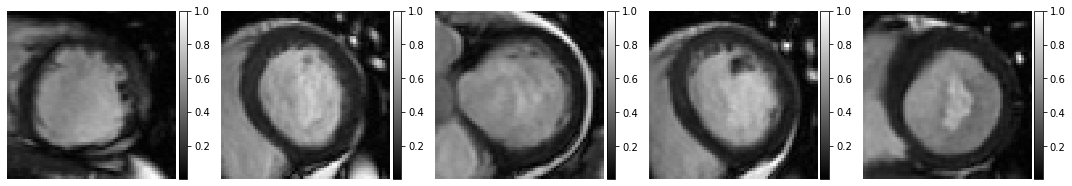

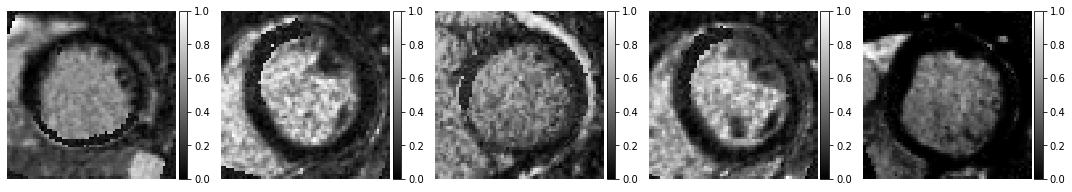

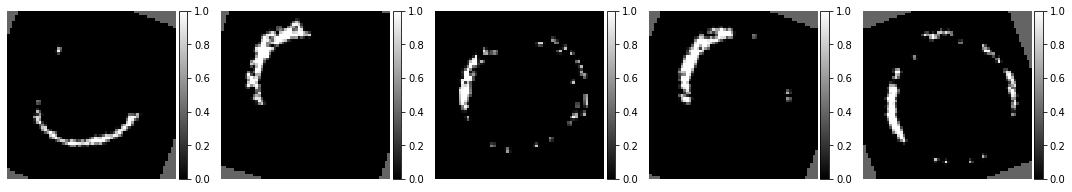

In [ ]:
idx = np.random.randint(0, fixed_train.shape[0], size=5)

# visualize
fixed_examples = [f for f in fixed_train[idx, ...]]
moving_examples = [f for f in moving_train[idx, ...]]
masks_examples = [f for f in masks[idx, ...]]

ne.plot.slices(fixed_examples, cmaps=['gray'], do_colorbars=True);
ne.plot.slices(moving_examples, cmaps=['gray'], do_colorbars=True);
ne.plot.slices(masks_examples, cmaps=['gray'], do_colorbars=True);

---

# CNN Model

In [25]:
def vxm_data_generator(fixed_data, moving_data, batch_size=32, indx=[]):
    """
    Generator that takes in data of size [N, H, W], and yields data for
    our custom vxm model. Note that we need to provide numpy data for each
    input, and each output.

    inputs:  moving [bs, H, W, 1], fixed image [bs, H, W, 1]
    outputs: moved image [bs, H, W, 1], zero-gradient [bs, H, W, 2]
    """

    # preliminary sizing
    vol_shape = fixed_data.shape[1:] # extract data shape
    ndims = len(vol_shape)
    
    # prepare a zero array the size of the deformation
    # we'll explain this below
    zero_phi = np.zeros([batch_size, *vol_shape, ndims])
    
    while True:
        # prepare inputs:
        # images need to be of the size [batch_size, H, W, 1]
        idx = np.random.randint(0, fixed_data.shape[0], size=batch_size)
        if len(indx) > 0:
          idx = indx
        moving_images = moving_data[idx, ..., np.newaxis]
        fixed_images = fixed_data[idx, ..., np.newaxis]
        inputs = [moving_images, fixed_images]
        
        # prepare outputs (the 'true' moved image):
        # of course, we don't have this, but we know we want to compare 
        # the resulting moved image with the fixed image. 
        # we also wish to penalize the deformation field. 
        outputs = [fixed_images, zero_phi]
        
        yield (inputs, outputs)

In [26]:
import matplotlib.pyplot as plt

def plot_history(hist, loss_name='loss'):
    # Simple function to plot training history.
    plt.figure()
    plt.plot(hist.epoch, hist.history[loss_name], '.-')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

In [27]:
def get_model(nb_features, lambda_param, adam_rate, batch_size, epochs, steps_per_epoch):
    inshape = fixed_train.shape[1:]
    vxm_model = vxm.networks.VxmDense(inshape, nb_features, int_steps=0)
    losses = [vxm.losses.NCC().loss, vxm.losses.Grad('l2').loss]
    vxm_model.compile(optimizer=tf.keras.optimizers.Adam(lr=adam_rate), loss=losses, loss_weights=[1, lambda_param])
    train_generator = vxm_data_generator(fixed_train, moving_train, batch_size=batch_size)
    hist = vxm_model.fit_generator(train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch, verbose=2);
    return vxm_model, hist

# Train Models

In [28]:
nb_features = [
    [32, 64, 64, 128, 128],         # encoder features
    [128, 64, 64, 64, 64, 32, 32, 32]  # decoder features
]

In [ ]:
vxm_models = []
hists = []
lams = [0.01, 0.1, 1.0]
for i, lam in enumerate(lams):
    print()
    print("model number", i, " with lambda = ", lam, ":")
    vxm_model, hist = get_model(nb_features, lambda_param=lam, adam_rate=1e-3, batch_size=4, epochs=200, steps_per_epoch=200)
    vxm_models.append(vxm_model)
    hists.append(hist)


model number 0  with lambda =  0.01 :


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/200
200/200 - 11s - loss: -4.0528e-01 - vxm_dense_transformer_loss: -4.0677e-01 - vxm_dense_flow_loss: 0.1484 - 11s/epoch - 54ms/step
Epoch 2/200
200/200 - 7s - loss: -5.4081e-01 - vxm_dense_transformer_loss: -5.4569e-01 - vxm_dense_flow_loss: 0.4873 - 7s/epoch - 35ms/step
Epoch 3/200
200/200 - 7s - loss: -5.8426e-01 - vxm_dense_transformer_loss: -5.9028e-01 - vxm_dense_flow_loss: 0.6018 - 7s/epoch - 34ms/step
Epoch 4/200
200/200 - 7s - loss: -6.1042e-01 - vxm_dense_transformer_loss: -6.1692e-01 - vxm_dense_flow_loss: 0.6496 - 7s/epoch - 34ms/step
Epoch 5/200
200/200 - 7s - loss: -6.2309e-01 - vxm_dense_transformer_loss: -6.3028e-01 - vxm_dense_flow_loss: 0.7185 - 7s/epoch - 34ms/step
Epoch 6/200
200/200 - 7s - loss: -6.4279e-01 - vxm_dense_transformer_loss: -6.5022e-01 - vxm_dense_flow_loss: 0.7432 - 7s/epoch - 34ms/step
Epoch 7/200
200/200 - 7s - loss: -6.5667e-01 - vxm_dense_transformer_loss: -6.6432e-01 - vxm_dense_flow_loss: 0.7647 - 7s/epoch - 34ms/step
Epoch 8/200
200/20

# Show Results

In [ ]:
def show(vxm_model, moving_img, fixed_img, indx):
    for i in indx:
        # get some data
        val_generator = vxm_data_generator(fixed_train, moving_train, batch_size=1, indx=[i])
        val_input, _ = next(val_generator)
        val_pred = vxm_model.predict(val_input)
        mask_before = masks[[i], ..., np.newaxis]
        mask_after = vxm.layers.SpatialTransformer(interp_method='linear', indexing='ij', name='%s_transformer' % 'vxm_dense')([mask_before, val_pred[1]]).numpy()

        # visualize
        images = [img[0, :, :, 0] for img in val_input + [val_pred[0]] + [mask_before, mask_after]] 
        titles = ['moving', 'fixed', 'moved', 'mask_before', 'mask_after']
        ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

model number 0  with lam =  0.01 : 


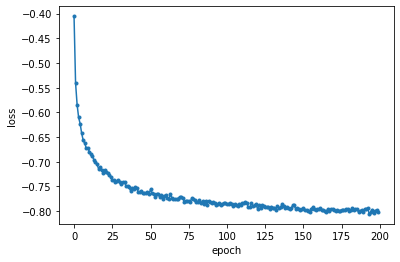

-0.8009613156318665


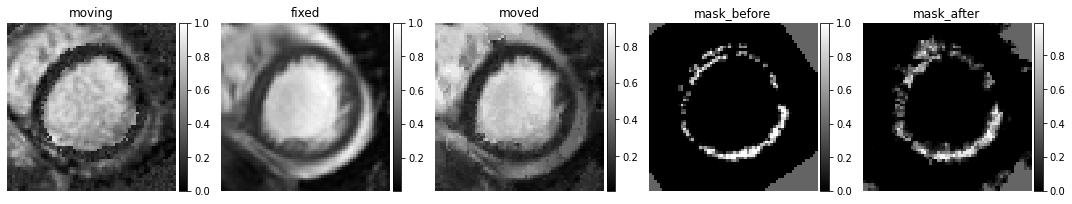

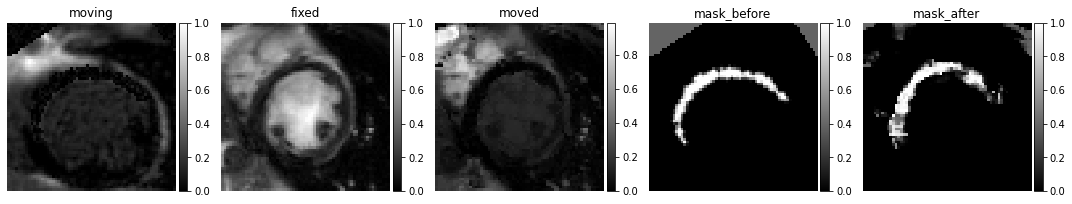

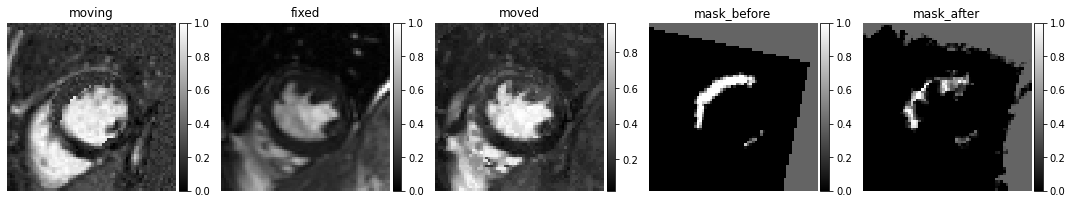

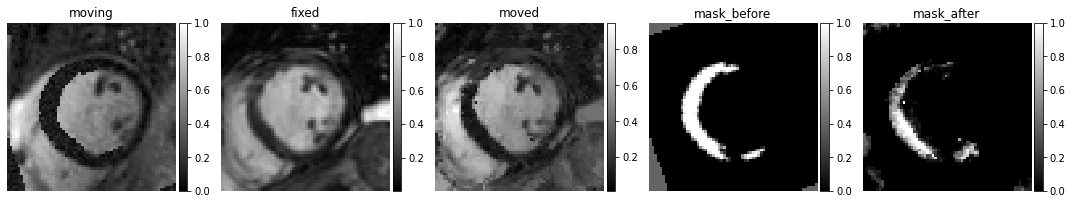

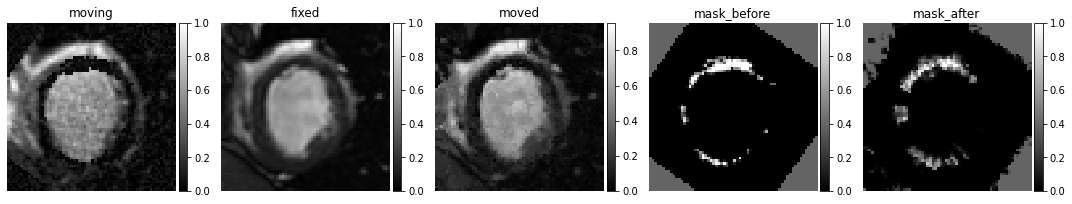

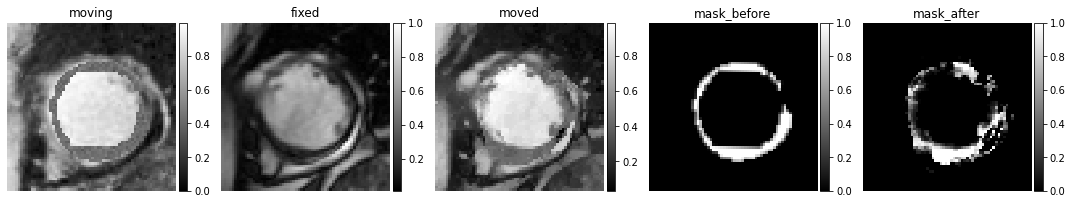

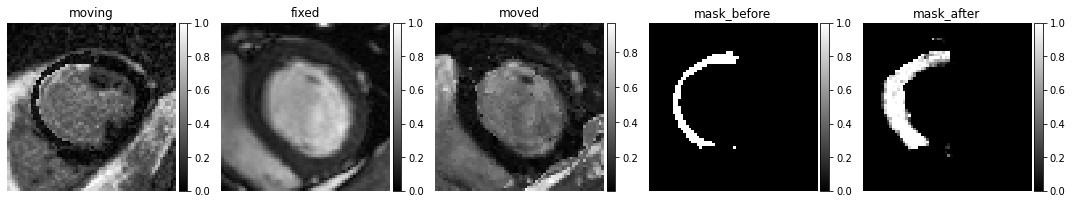

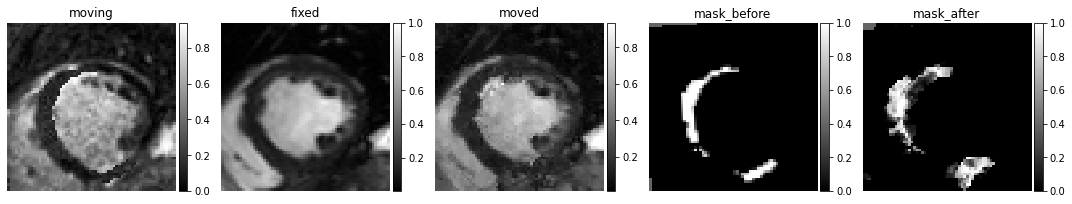

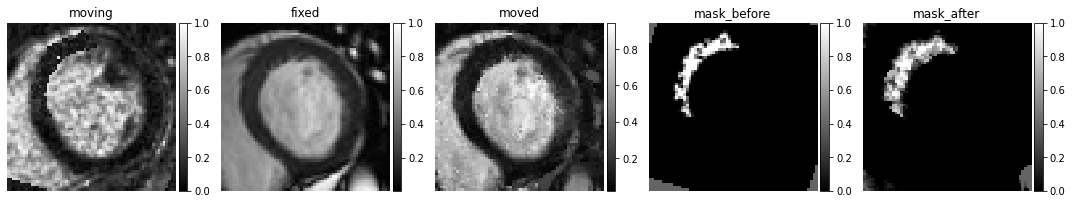

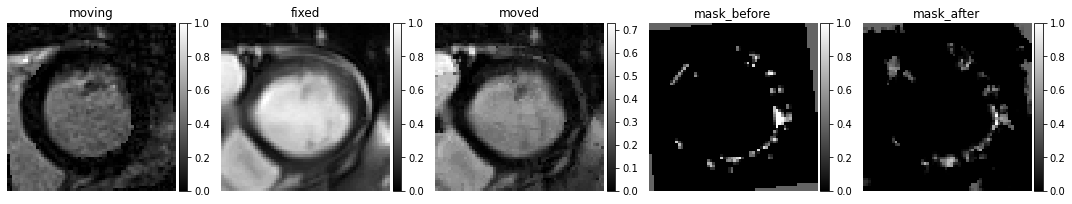

----------------------------------------------------------------------

model number 1  with lam =  0.1 : 


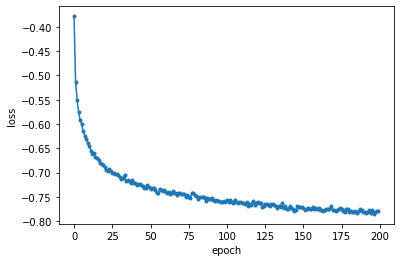

-0.7794647812843323


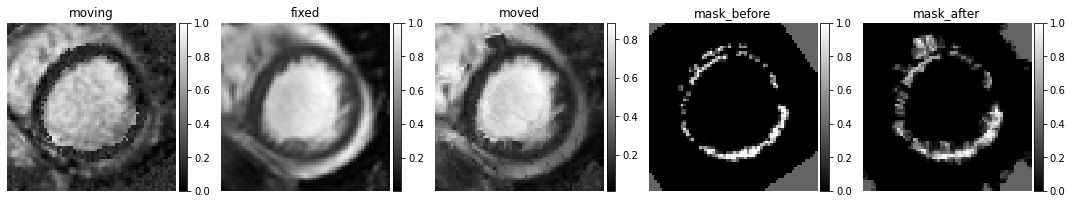

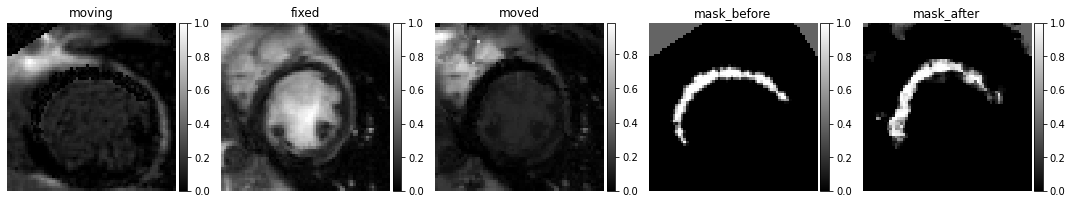

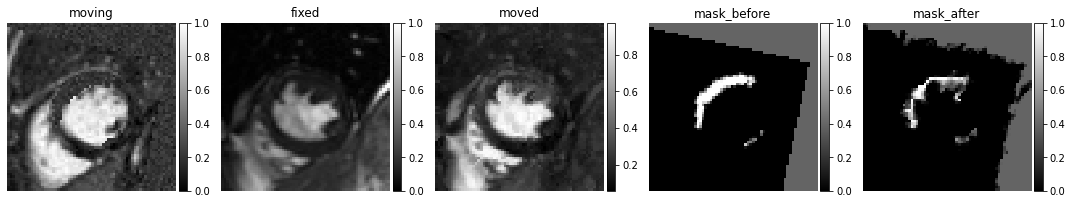

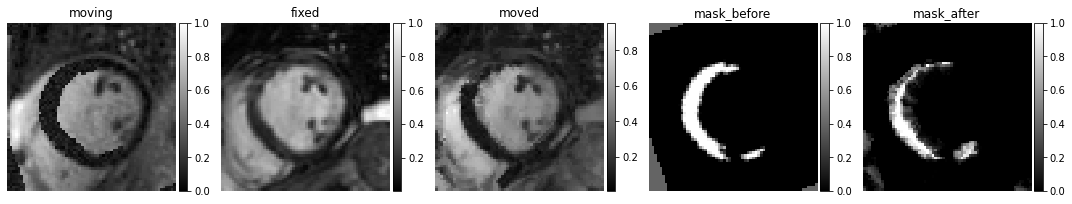

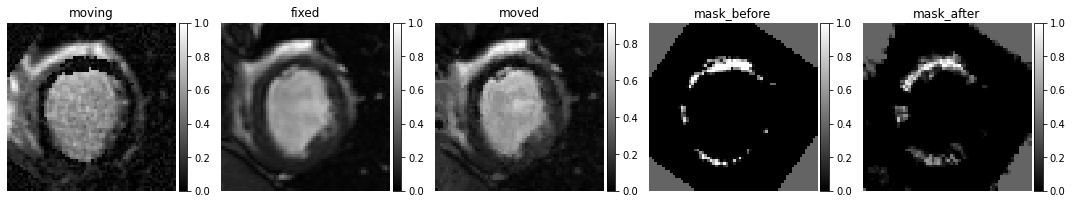

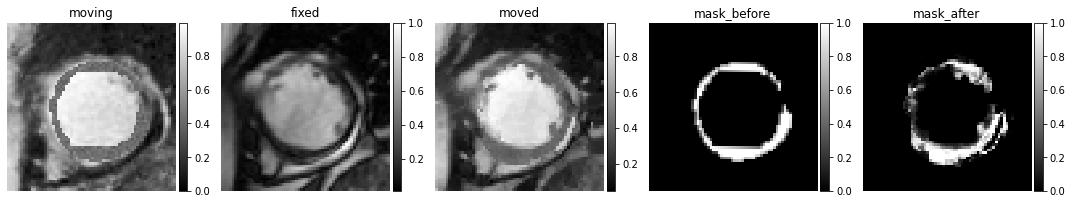

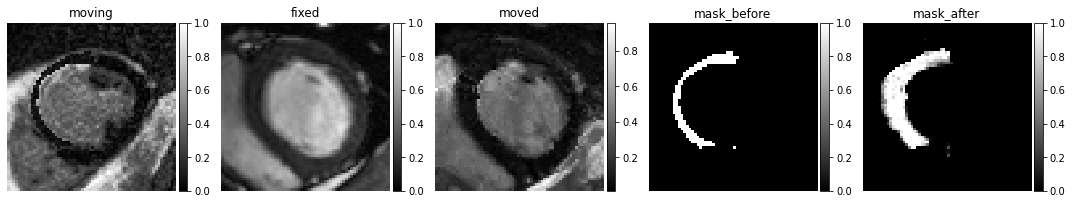

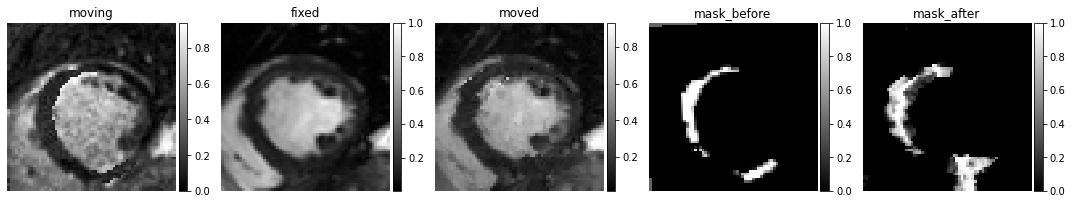

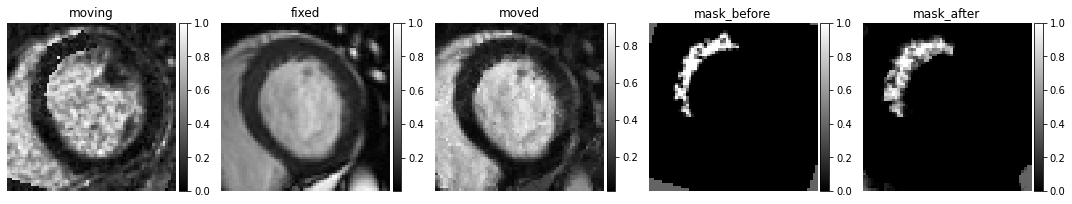

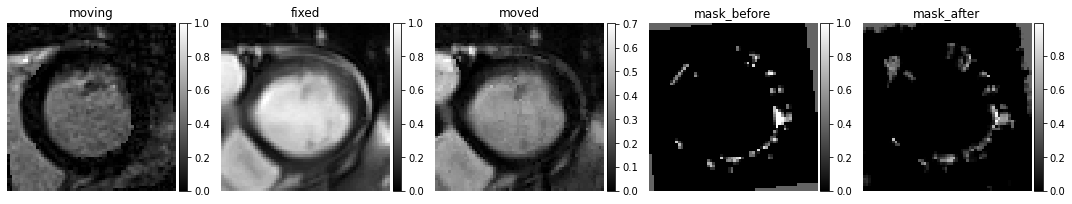

----------------------------------------------------------------------

model number 2  with lam =  1.0 : 


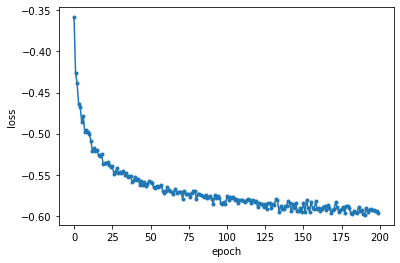

-0.5967090129852295


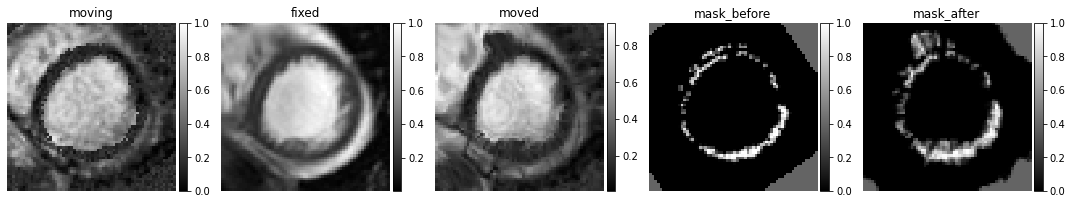

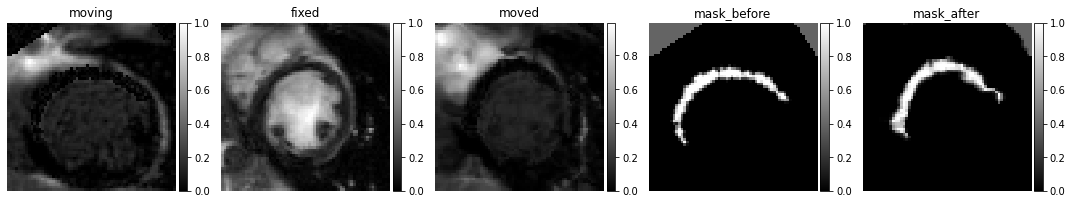

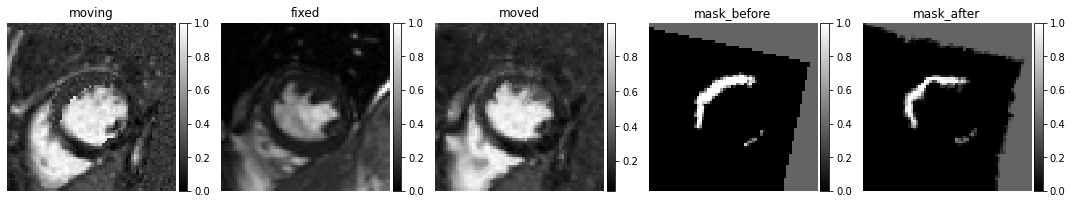

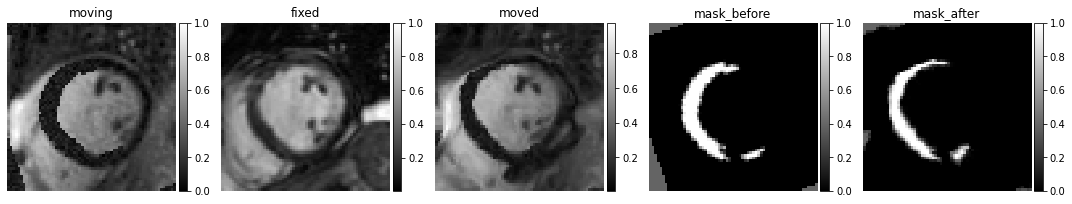

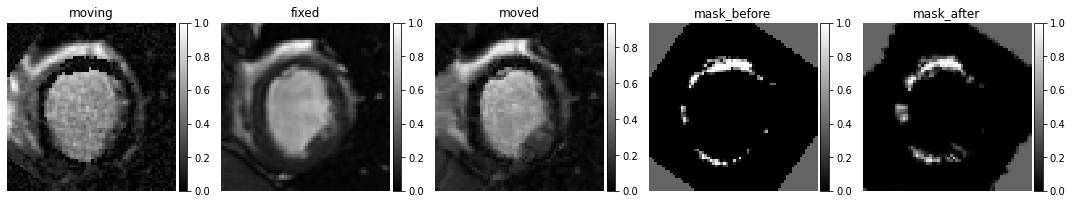

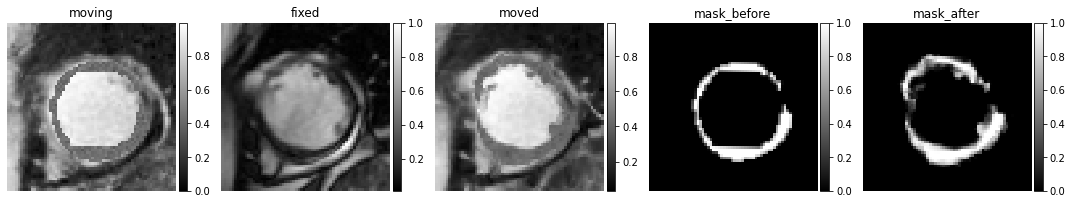

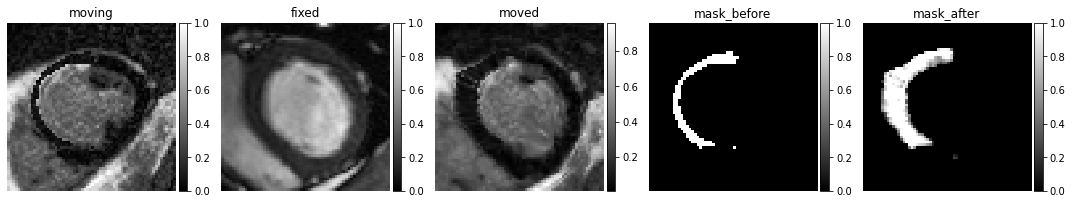

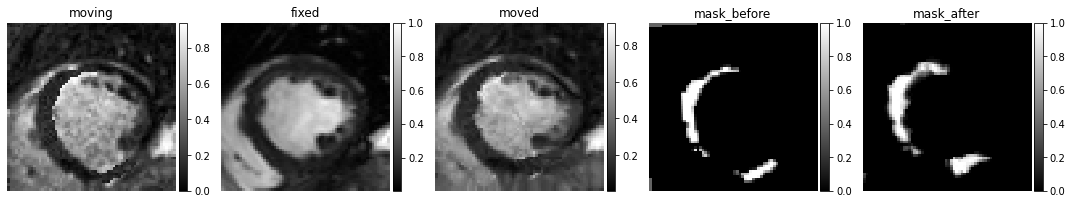

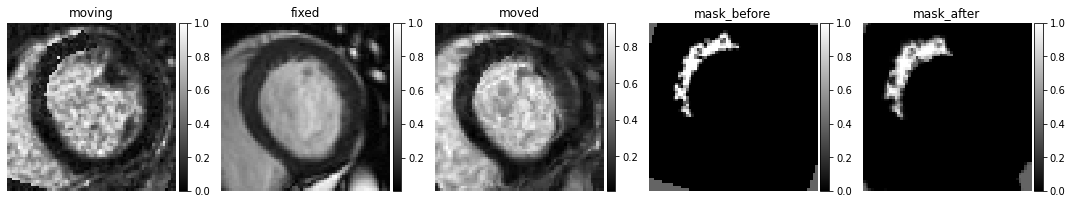

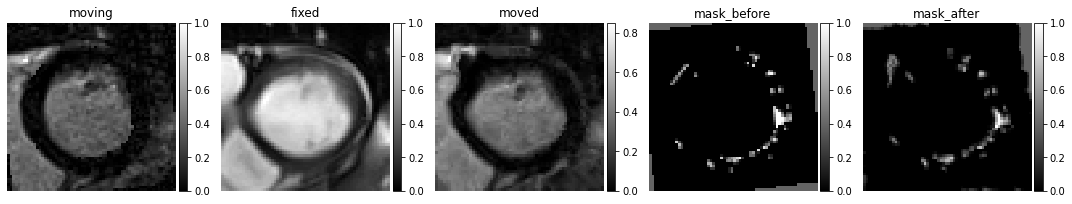

----------------------------------------------------------------------



In [ ]:
# indx = np.random.randint(0, fixed_train.shape[0], size=1)
indx = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for i, vxm_model in enumerate(vxm_models):
    print("model number", i, " with lam = ", lams[i], ": ")
    plot_history(hists[i])
    print(hists[i].history['loss'][-1])
    show(vxm_model=vxm_model, moving_img=moving_train, fixed_img=fixed_train, indx=indx)
    print("----------------------------------------------------------------------")
    print()

# Save & Load

## save models

In [ ]:
vxm_models[0].save_weights('./saved_models/L0_01/my_model')
vxm_models[1].save_weights('./saved_models/L0_1/my_model')
vxm_models[2].save_weights('./saved_models/L1_0/my_model')

## load and verify

In [34]:
vxm_model = vxm.networks.VxmDense(fixed_train.shape[1:], nb_features, int_steps=0)
vxm_model.load_weights('./saved_models/L1_0/my_model')

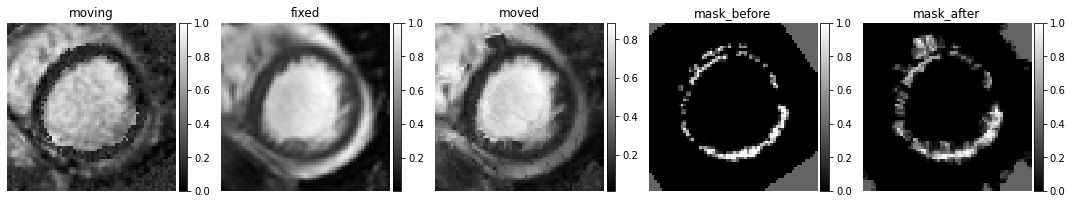

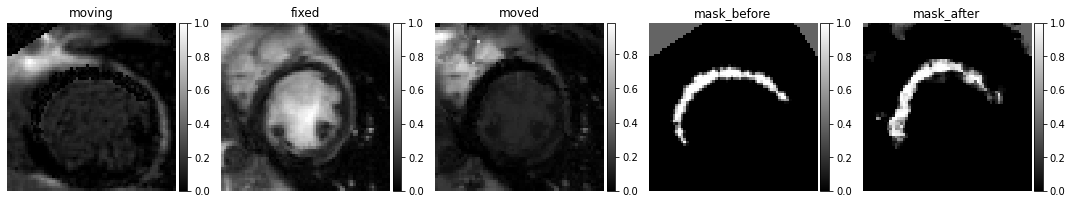

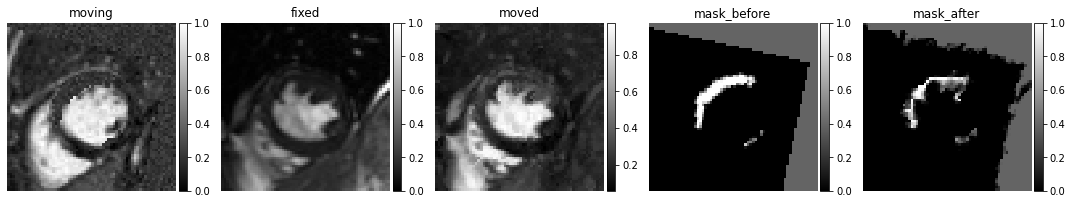

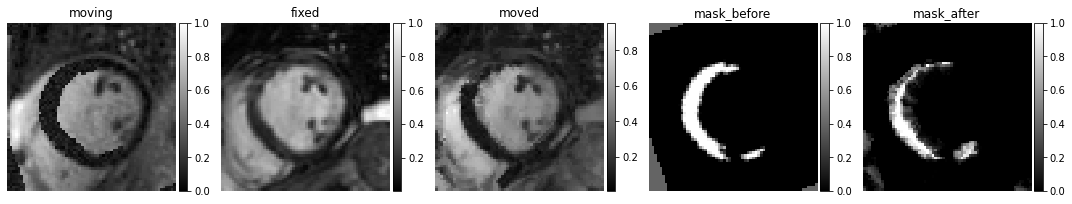

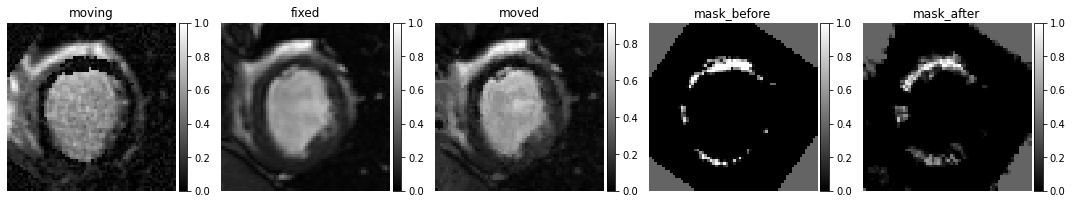

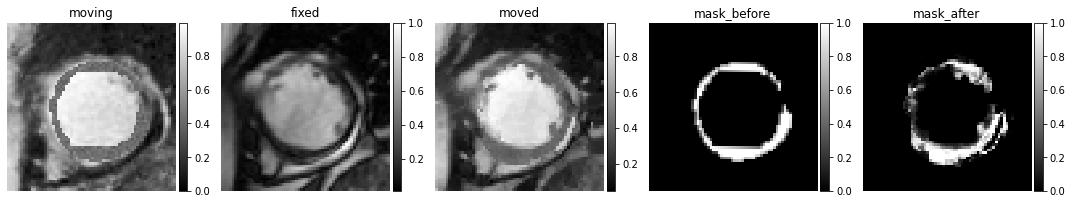

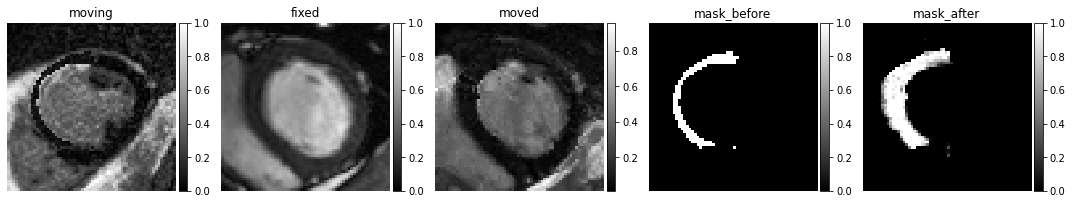

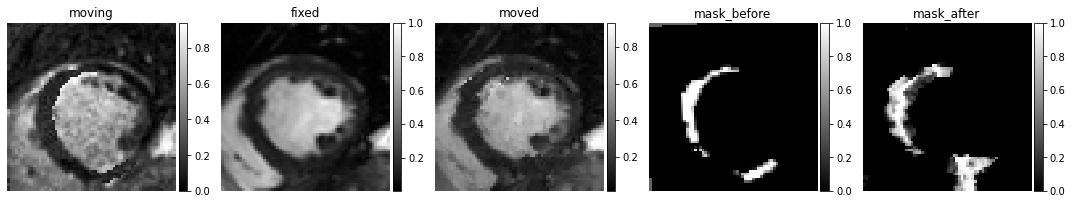

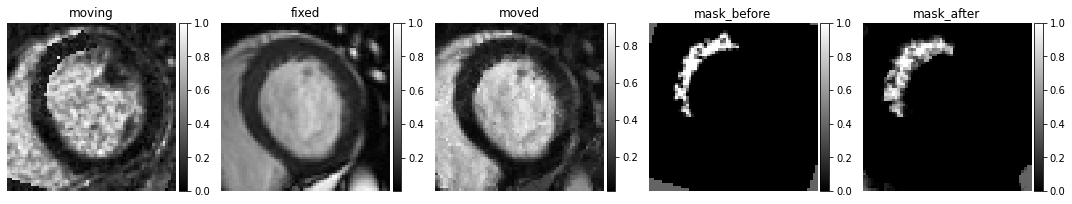

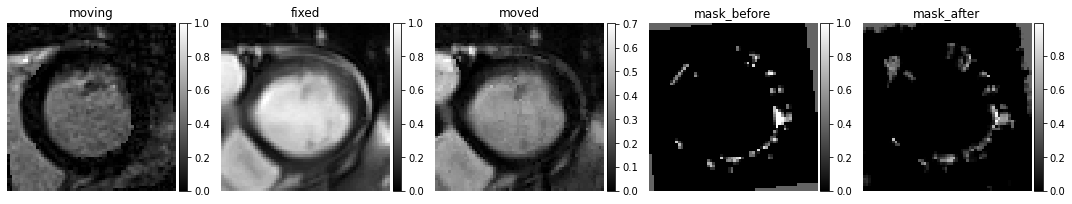

In [ ]:
show(vxm_model=new_model, moving_img=moving_train, fixed_img=fixed_train, indx=indx)

285

# Save Results

In [93]:
des_root = "/content/gdrive/My Drive/Cardiac Project/Network_phase/dataset/"

def save_results(vxm_model, moving_img, fixed_img, masks, masks_path, rigid_lge, rigid_lge_path, vis=False, save=False):
    for i in range(len(fixed_img)):
        # get some data
        val_generator = vxm_data_generator(fixed_img, moving_img, batch_size=1, indx=[i])
        val_input, _ = next(val_generator)
        val_pred = vxm_model.predict(val_input)
        mask_before = masks[[i], ..., np.newaxis]
        mask_after = vxm.layers.SpatialTransformer(interp_method='linear', indexing='ij', name='%s_transformer' % 'vxm_dense')([mask_before, val_pred[1]]).numpy()
        rigid_lge_before = rigid_lge[[i], ..., np.newaxis]
        rigid_lge_after = vxm.layers.SpatialTransformer(interp_method='linear', indexing='ij', name='%s_transformer' % 'vxm_dense')([rigid_lge_before, val_pred[1]]).numpy()

        # visualize
        if vis:
            images = [img[0, :, :, 0] for img in val_input + [val_pred[0]] + [mask_before, mask_after, rigid_lge_after]] 
            titles = ['moving', 'fixed', 'moved', 'mask_before', 'mask_after', 'rigid_lge_after']
            ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);
        
        # save              
        cv2.imwrite(des_root + masks_path[i] + '/mask.png', mask_after[0, :, :, 0]*255)
        cv2.imwrite(des_root + rigid_lge_path[i] + '/moved.png', rigid_lge_after[0, :, :, 0]*255)        

In [94]:
save_results(vxm_model, moving_train, fixed_train, masks, masks_path, rigid_lge, rigid_lge_path, vis=True, save=True)

Output hidden; open in https://colab.research.google.com to view.